# 1. Bagian A

# 2. Bagian B

## 2.0. Persiapan 🚀

### 2.0.1. Instalasi Library 🛠️

### 2.0.2. EDA (Exploratory Data Analysis) 🔎

#### Mengimpor Pustaka yang Diperlukan 📚

Pada tahap ini, kita mengimpor berbagai pustaka yang akan digunakan dalam analisis data dan visualisasi:

- **pandas**: Digunakan untuk manipulasi dan analisis data dalam format tabel (DataFrame).
- **numpy**: Digunakan untuk operasi numerik yang efisien dan mendukung berbagai operasi matematika.
- **seaborn**: Pustaka visualisasi berbasis `matplotlib` yang menyediakan tampilan grafik yang lebih estetis dan informatif.
- **matplotlib.pyplot**: Pustaka dasar untuk membuat visualisasi, digunakan bersama `seaborn` untuk kustomisasi lebih lanjut.
- **missingno**: Alat untuk visualisasi data yang hilang, membantu mengidentifikasi pola missing values dalam dataset.
- **mosaic (dari statsmodels)**: Fungsi untuk membuat mosaic plot, cocok untuk memvisualisasikan hubungan antar variabel kategori.

Setelah mengimpor pustaka-pustaka ini, kita siap untuk melakukan eksplorasi dan analisis data dengan berbagai metode visualisasi dan manipulasi data. 📊

In [2]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data dalam format DataFrame
import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik dan array
import seaborn as sns  # Mengimpor seaborn untuk membuat visualisasi yang menarik
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk membuat visualisasi dasar
import missingno as msno  # Mengimpor missingno untuk visualisasi data yang hilang dalam dataset
from statsmodels.graphics.mosaicplot import mosaic  # Mengimpor mosaic plot dari statsmodels untuk visualisasi kategori


In [3]:
# Mengatur tema dasar menggunakan Seaborn
sns.set_theme(style="whitegrid")

# Kustomisasi parameter Matplotlib untuk tampilan yang unik
plt.rcParams.update({
    'axes.facecolor': '#f7f7f7',      # Latar belakang abu-abu terang untuk meningkatkan keterbacaan
    'axes.edgecolor': '#333333',      # Batas gelap di sekitar plot
    'axes.grid': True,                # Mengaktifkan garis grid
    'grid.color': '#e3e3e3',          # Warna garis grid yang terang
    'grid.alpha': 0.5,                # Transparansi semi untuk garis grid
    'axes.labelcolor': '#333333',     # Label sumbu berwarna gelap untuk kontras yang lebih baik
    'xtick.color': '#333333',         # Warna gelap untuk tanda pada sumbu x
    'ytick.color': '#333333',         # Warna gelap untuk tanda pada sumbu y
    'figure.facecolor': 'white',      # Latar belakang putih untuk figure
    'font.size': 12,                  # Ukuran font umum
    'axes.titlesize': 14,             # Ukuran font untuk judul
    'axes.titleweight': 'bold',       # Judul dengan teks tebal
    'axes.labelsize': 12,             # Ukuran font untuk label sumbu
    'axes.labelweight': 'bold',       # Label sumbu dengan teks tebal
    'legend.fontsize': 10,            # Ukuran font untuk legenda
    'legend.title_fontsize': 12,      # Ukuran font untuk judul legenda
    'legend.frameon': True,           # Bingkai di sekitar legenda
    'legend.framealpha': 0.9,         # Transparansi bingkai legenda sedikit
    'legend.facecolor': '#f0f0f0',    # Latar belakang terang untuk legenda
    'legend.edgecolor': '#d1d1d1',    # Warna batas untuk legenda
    'axes.prop_cycle': plt.cycler(color=[
        '#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd'
    ])  # Siklus warna khusus untuk palet yang harmonis
})


#### Pembersihan Data untuk Dataset Deteksi Penipuan 🧹

Pada cell ini, kita akan melakukan serangkaian langkah pembersihan data untuk mempersiapkan dataset transaksi penipuan sebelum proses analisis lebih lanjut. Langkah-langkah pembersihan data meliputi:

1. **Pemeriksaan dan Penghapusan Duplikat**: Memeriksa jumlah duplikat dan menghapusnya berdasarkan kolom `trans_num` untuk memastikan setiap transaksi unik.
2. **Konversi Tipe Data**: Mengonversi beberapa kolom ke tipe data yang sesuai, seperti kategori untuk kolom dengan nilai berulang, dan `datetime` untuk kolom yang berisi data tanggal.
3. **Pembersihan Kolom 'is_fraud'**: Membersihkan nilai kolom `is_fraud` dari data yang tidak relevan, memastikan kolom ini hanya mengandung nilai 1 atau 0 untuk penipuan dan bukan penipuan.
4. **Penghilangan Tanda Kutip pada Kolom Teks**: Menghilangkan tanda kutip dari kolom `merchant` dan `job` yang mengandung teks.
5. **Validasi Struktur Data**: Menampilkan informasi ringkas tentang tipe data setiap kolom untuk memastikan pembersihan sudah dilakukan dengan benar.

Dengan pembersihan data ini, kita akan mendapatkan dataset yang lebih siap untuk analisis atau pemodelan lebih lanjut. 🛠️


In [4]:
# Membaca data dari file Excel
data = pd.read_excel('data/fraud.xlsx')

# Mengecek jumlah data duplikat berdasarkan keseluruhan kolom
print(f'Terdapat data duplikat sebanyak {data.duplicated().sum()} data \n\n')

# Menghapus data duplikat berdasarkan kolom 'trans_num' dan menyimpan yang pertama
data = data.drop_duplicates(subset='trans_num', keep='first')
print(f'Sebanyak {data.duplicated().sum()} data duplikat telah dihapus \n\n')

# Mengubah tipe data kolom 'trans_num' menjadi kategori
data['trans_num'] = data['trans_num'].astype('category')

# Mengonversi kolom 'trans_date_trans_time' ke tipe datetime, dan menangani error dengan NaT
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')

# Mengurutkan data berdasarkan waktu transaksi
data = data.sort_values(by='trans_date_trans_time')

# Mengonversi kolom 'dob' ke tipe datetime untuk tanggal lahir
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')

# Mengatasi kesalahan data pada kolom 'is_fraud' dan mengonversinya menjadi kategori
# Mengganti nilai yang mengandung tanggal dengan nilai biner yang benar (1 untuk fraud, 0 untuk bukan fraud)
data['is_fraud'] = data['is_fraud'] \
    .astype(str) \
    .str.replace('1"2020-12-24 16:56:24"', '1') \
    .replace('0"2019-01-01 00:00:44"', '0') \
    .astype(int) \
    .astype('category')

# Menghilangkan tanda kutip di sekitar teks pada kolom 'merchant' dan mengonversinya ke kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Menghilangkan tanda kutip di sekitar teks pada kolom 'job' dan mengonversinya ke kategori
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi kolom 'category', 'city', dan 'state' menjadi kategori
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')

# Menampilkan informasi tentang tipe data pada setiap kolom
data.info()

Terdapat data duplikat sebanyak 63 data 


Sebanyak 0 data duplikat telah dihapus 


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null

C:\Users\axio\AppData\Local\Temp\ipykernel_17088\234817236.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['dob'] = pd.to_datetime(data['dob'], errors='coerce')


#### Analisis Umum 🔍

##### Gambaran Umum Dataset: Deteksi Penipuan 🛡️

Dataset ini terdiri dari 15 variabel dengan berbagai tipe data, dirancang untuk analisis deteksi penipuan dalam transaksi kartu kredit. Berikut adalah detail variabel yang ada:

###### 1. Variabel Kategori (7 variabel)
- **trans_num**: Unique identifier untuk transaksi.
- **is_fraud**: Target klasifikasi yang menunjukkan apakah transaksi adalah penipuan (1) atau bukan (0).
- **merchant**: Merchant atau penjual yang terlibat dalam transaksi.
- **category**: Kategori barang yang dijual.
- **city**: Kota dari pemegang kartu kredit.
- **state**: Negara bagian pemegang kartu kredit.
- **job**: Pekerjaan pemegang kartu kredit.

###### 2. Variabel Float (5 variabel)
- **amt**: Jumlah atau nilai transaksi (target regresi).
- **lat**: Koordinat geografis pengguna (latitude), sebaiknya diperlakukan sebagai variabel spasial.
- **long**: Koordinat geografis pengguna (longitude), sebaiknya diperlakukan sebagai variabel spasial.
- **merch_lat**: Koordinat geografis merchant (latitude), sebaiknya diperlakukan sebagai variabel spasial.
- **merch_long**: Koordinat geografis merchant (longitude), sebaiknya diperlakukan sebagai variabel spasial.

###### 3. Variabel Datetime (2 variabel)
- **trans_date_trans_time**: Waktu dan tanggal transaksi.
- **dob**: Tanggal lahir pengguna.

###### 4. Variabel Integer (1 variabel)
- **city_pop**: Populasi kota tempat pengguna tinggal.

Dataset ini mencakup informasi lengkap dari transaksi, seperti lokasi pengguna dan merchant, kategori produk, serta informasi demografis yang bisa digunakan untuk mendeteksi pola yang mencurigakan. Struktur ini siap untuk pembersihan dan analisis lebih lanjut. 🕵️‍♂️


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Missing Value 🤔

###### Dendrogram Missing Values 🌳

Dendrogram ini digunakan untuk memvisualisasikan pola missing values pada dataset. Berdasarkan dendrogram ini, kita dapat mengidentifikasi apakah terdapat missing values yang saling berhubungan antar kolom. 

Interpretasi dari hasil dendrogram:
- Dendrogram menunjukkan bahwa tidak ada missing values yang signifikan atau pola missing values bersamaan di antara kolom-kolom dalam dataset ini.
- Karena garis di sepanjang dendrogram tidak memiliki cabang atau jarak antar kolom, ini menunjukkan tidak ada missing values yang dapat dikelompokkan secara hierarkis.

Dengan hasil ini, kita dapat menyimpulkan bahwa tidak ada masalah missing values yang perlu ditangani dalam dataset ini. ✔️




c:\ProgramData\anaconda3\envs\gelar_rasa\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


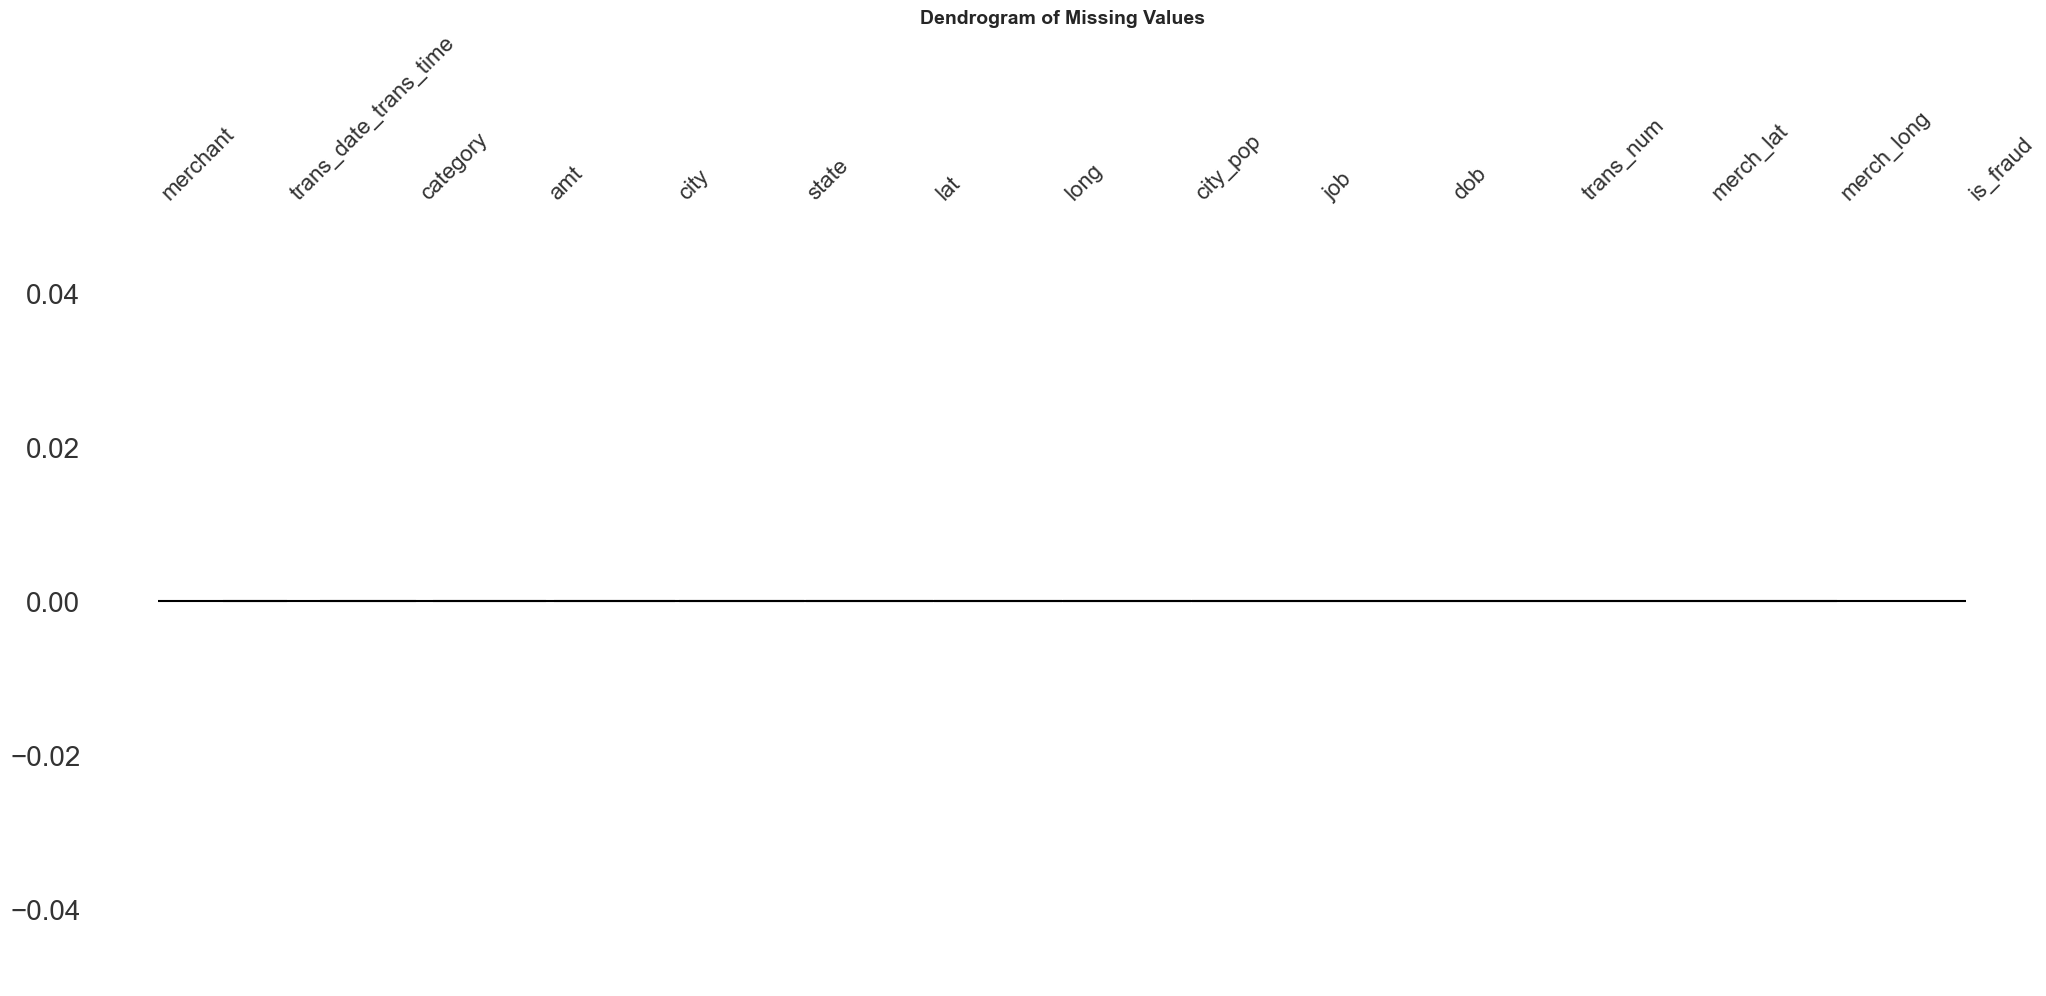

In [ ]:
# Membuat dendrogram untuk memvisualisasikan pola missing values pada kolom-kolom dataset
msno.dendrogram(data)
plt.title('Dendrogram of Missing Values')
plt.show()

##### Kelas yang Tidak Seimbang ⚖️

###### Analisis Ketidakseimbangan Kelas pada Variabel `is_fraud`

Grafik ini menunjukkan distribusi kelas pada variabel target `is_fraud`, yang mengidentifikasi transaksi sebagai penipuan (fraud) atau bukan penipuan (non-fraud). Dari hasil plot, kita dapat melihat bahwa dataset ini memiliki ketidakseimbangan kelas yang signifikan:

- **Non-Fraud (0)**: Sebagian besar data transaksi, yaitu sekitar 88%, tidak teridentifikasi sebagai penipuan.
- **Fraud (1)**: Hanya sekitar 12% dari total data yang teridentifikasi sebagai penipuan.

Ketidakseimbangan kelas ini harus diperhatikan dalam proses pemodelan, karena model mungkin cenderung mengabaikan kelas minoritas (fraud) jika tidak dilakukan penyesuaian khusus. Beberapa strategi yang dapat dipertimbangkan termasuk oversampling atau undersampling, serta pemilihan metrik evaluasi yang sesuai untuk mengukur performa model pada kelas yang lebih kecil. 📊


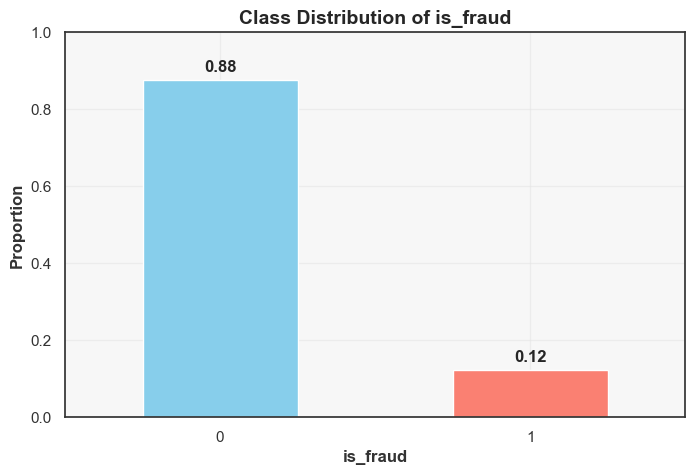

In [ ]:
# Menghitung proporsi setiap kelas pada kolom 'is_fraud' untuk mengetahui distribusi data fraud dan non-fraud
class_counts = data['is_fraud'].value_counts(normalize=True)

# Membuat plot bar untuk menampilkan distribusi kelas 'is_fraud'
plt.figure(figsize=(8, 5))  # Mengatur ukuran figure
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])  # Membuat plot dengan warna berbeda untuk setiap kelas
plt.title('Class Distribution of is_fraud')  # Menambahkan judul pada plot
plt.xlabel('is_fraud')  # Menambahkan label pada sumbu x
plt.ylabel('Proportion')  # Menambahkan label pada sumbu y
plt.xticks(rotation=0)  # Mengatur rotasi label pada sumbu x agar mudah dibaca
plt.ylim(0, 1)  # Mengatur batas atas sumbu y untuk proporsi (0 hingga 1)

# Menambahkan label nilai proporsi di atas setiap batang pada plot
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=12, weight='bold')

# Menampilkan plot
plt.show()

#### Analisis Univariat 📈

##### Analisis Univariat Variabel Kategorikal

Pada bagian ini, kita melakukan *univariate analysis* untuk memahami distribusi dari variabel-variabel kategori utama dalam dataset deteksi penipuan:

1. **Top 10 Merchants**: Menunjukkan merchant-merchant teratas yang paling sering digunakan dalam transaksi. Ini dapat membantu kita mengenali merchant populer dalam data.
2. **Transaction Category Distribution**: Menampilkan frekuensi transaksi berdasarkan kategori barang. Ini memberikan informasi tentang jenis transaksi yang paling umum dilakukan.
3. **Top 10 Cities**: Menunjukkan kota-kota dengan frekuensi transaksi tertinggi. Hal ini bermanfaat untuk melihat lokasi geografis dengan volume transaksi terbesar.
4. **Top 10 Jobs**: Menampilkan pekerjaan pengguna yang paling sering melakukan transaksi. Ini dapat memberikan wawasan tentang kelompok pekerjaan yang aktif dalam bertransaksi.

Analisis ini memberi kita gambaran awal tentang karakteristik dasar dataset, yang dapat berguna dalam memahami konteks data dan potensi pola yang terkait dengan penipuan. 🧐


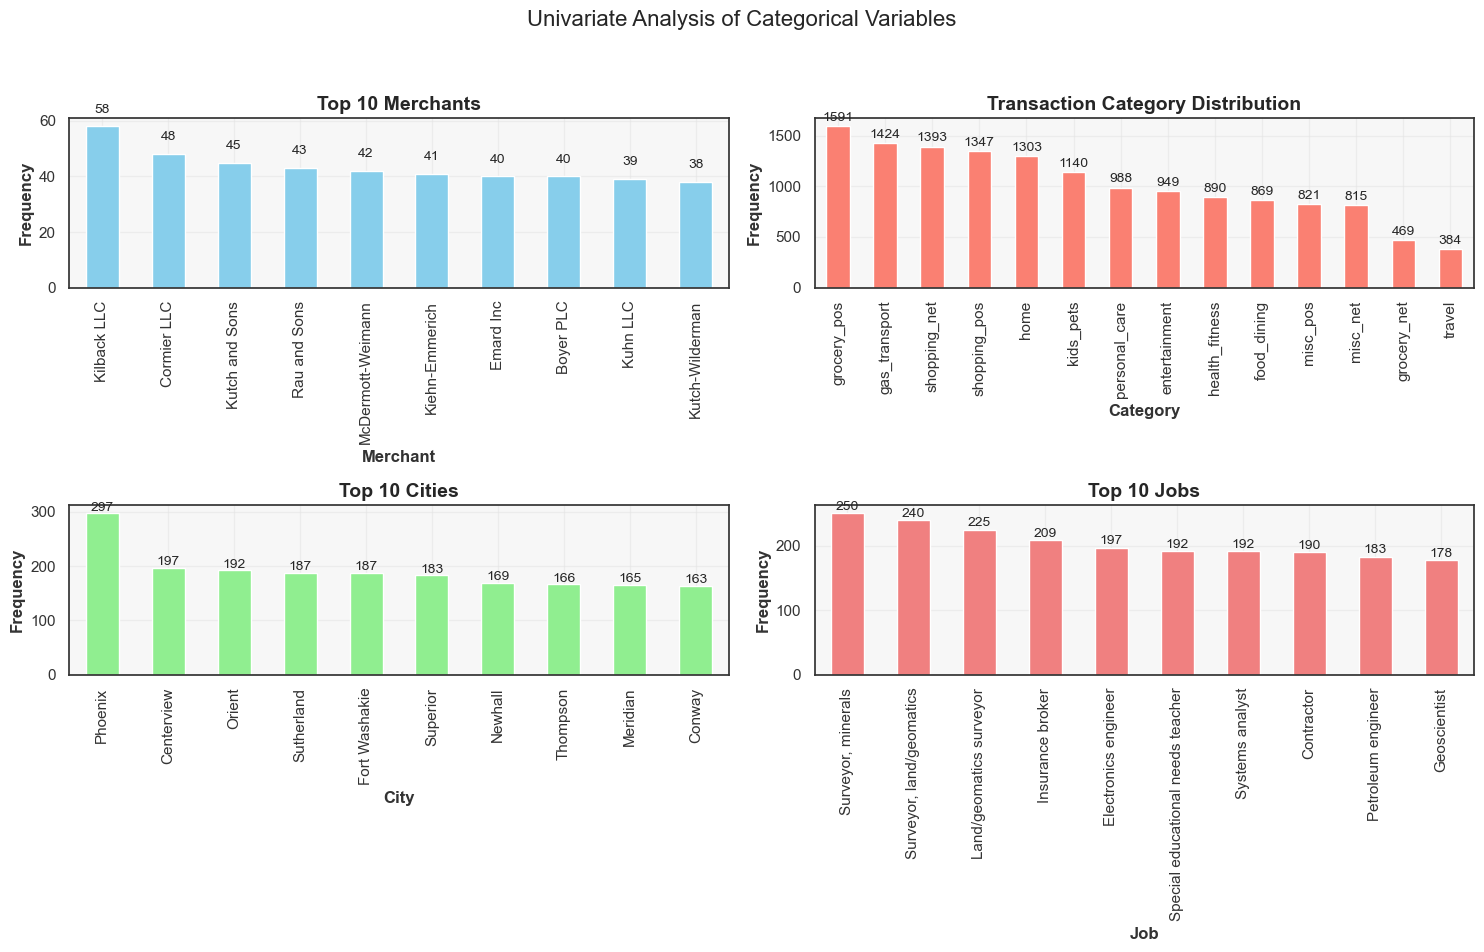

In [ ]:
# Menambahkan nilai label di atas setiap batang pada bar chart untuk variabel kategori

# Mengatur subplots untuk menampilkan beberapa variabel kategori
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis of Categorical Variables', fontsize=16)

# Plot untuk variabel 'merchant'
merchant_counts = data['merchant'].value_counts().head(10)
merchant_counts.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Top 10 Merchants')  # Judul plot untuk 10 merchant teratas
axs[0, 0].set_xlabel('Merchant')  # Label sumbu x
axs[0, 0].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(merchant_counts):
    axs[0, 0].text(i, value + 5, f"{value}", ha='center', fontsize=10)

# Plot untuk variabel 'category'
category_counts = data['category'].value_counts()
category_counts.plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Transaction Category Distribution')  # Judul plot untuk distribusi kategori transaksi
axs[0, 1].set_xlabel('Category')  # Label sumbu x
axs[0, 1].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(category_counts):
    axs[0, 1].text(i, value + 50, f"{value}", ha='center', fontsize=10)

# Plot untuk variabel 'city'
city_counts = data['city'].value_counts().head(10)
city_counts.plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Top 10 Cities')  # Judul plot untuk 10 kota teratas
axs[1, 0].set_xlabel('City')  # Label sumbu x
axs[1, 0].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(city_counts):
    axs[1, 0].text(i, value + 5, f"{value}", ha='center', fontsize=10)

# Plot untuk variabel 'job'
job_counts = data['job'].value_counts().head(10)
job_counts.plot(kind='bar', ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Top 10 Jobs')  # Judul plot untuk 10 pekerjaan teratas
axs[1, 1].set_xlabel('Job')  # Label sumbu x
axs[1, 1].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(job_counts):
    axs[1, 1].text(i, value + 5, f"{value}", ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Mengatur layout plot agar lebih rapi
plt.show()  # Menampilkan plot


###### Analisis Nilai Unik dan Frekuensi pada Variabel Kategori

Untuk memahami lebih lanjut distribusi data pada variabel-variabel kategori, berikut ini adalah analisis jumlah nilai unik dan frekuensi kemunculannya dalam dataset. Tabel berikut merangkum:

- **Jumlah Nilai Unik**: Menunjukkan berapa banyak nilai unik yang terdapat dalam setiap variabel kategori, seperti `merchant`, `category`, `city`, `state`, dan `job`.
- **Top Nilai dan Frekuensinya**: Menampilkan lima nilai teratas beserta frekuensinya untuk setiap variabel kategori. Ini memberikan gambaran mengenai nilai-nilai yang paling sering muncul dalam dataset.

Informasi ini berguna untuk mengidentifikasi apakah ada konsentrasi nilai tertentu dalam kategori, yang mungkin menjadi indikasi pola tertentu dalam data. 🔎


In [ ]:
# Menghitung jumlah nilai unik dan frekuensi kemunculannya untuk setiap variabel kategori
unique_values_counts = {}

# Looping pada setiap kolom kategori untuk menghitung nilai unik dan frekuensinya
for col in ['merchant', 'category', 'city', 'state', 'job']:
    unique_counts = data[col].value_counts()
    unique_values_counts[col] = {
        'Jumlah Nilai Unik': unique_counts.nunique(),
        'Frekuensi Nilai': unique_counts.to_dict()
    }

# Menampilkan hasil dalam bentuk DataFrame untuk memudahkan visualisasi
unique_values_summary = pd.DataFrame({
    'Jumlah Nilai Unik': {col: unique_values_counts[col]['Jumlah Nilai Unik'] for col in unique_values_counts},
    'Top Nilai dan Frekuensinya': {col: list(unique_values_counts[col]['Frekuensi Nilai'].items())[:5] for col in unique_values_counts}  # Menampilkan hanya 5 teratas
})


unique_values_summary


,Jumlah Nilai Unik,Top Nilai dan Frekuensinya
merchant,44,"[(Kilback LLC, 58), (Cormier LLC, 48), (Kutch ..."
category,14,"[(grocery_pos, 1591), (gas_transport, 1424), (..."
city,106,"[(Phoenix, 297), (Centerview, 197), (Orient, 1..."
state,13,"[(CA, 3366), (MO, 2324), (NE, 1438), (OR, 1211..."
job,105,"[(Surveyor, minerals, 250), (Surveyor, land/ge..."


##### Analisis Univariat untuk Variabel Numerik  🔢

Bagian ini menampilkan analisis univariat untuk variabel numerik utama dalam dataset, dengan fokus pada variabel `amt` (jumlah transaksi) dan `city_pop` (populasi kota):

1. **Distribusi Jumlah Transaksi (`amt`)**: Sebagian besar transaksi berada pada rentang jumlah yang rendah, dengan distribusi yang skew ke kanan. Beberapa transaksi dengan jumlah sangat tinggi dapat menjadi outliers dan mungkin menarik untuk dianalisis lebih lanjut sebagai potensi penipuan.

2. **Distribusi Populasi Kota (`city_pop`)**: Distribusi populasi kota menunjukkan bahwa sebagian besar pengguna berasal dari kota-kota berpopulasi kecil, dengan distribusi yang sangat skew ke kanan. Hal ini bisa memberikan gambaran tentang karakteristik geografis dari pengguna kartu kredit dalam dataset ini.

Analisis distribusi ini membantu kita memahami pola dasar dalam variabel numerik dan mengidentifikasi potensi outliers atau pola khusus yang relevan dalam konteks deteksi penipuan. 📊


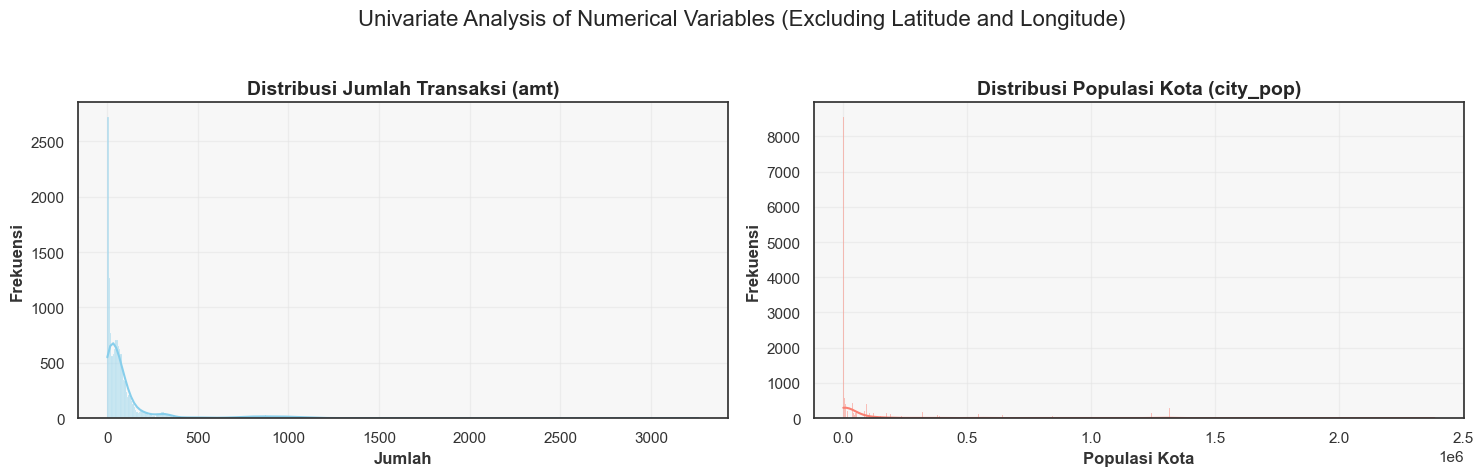

In [ ]:
# Analisis univariat untuk variabel numerik (tanpa variabel Latitude dan Longitude)
# Fokus pada variabel 'amt' (jumlah transaksi) dan 'city_pop' (populasi kota)

# Mengatur subplots untuk variabel numerik terpilih
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate Analysis of Numerical Variables (Excluding Latitude and Longitude)', fontsize=16)

# Plot distribusi untuk 'amt' (jumlah transaksi)
sns.histplot(data['amt'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribusi Jumlah Transaksi (amt)')  # Judul plot untuk jumlah transaksi
axs[0].set_xlabel('Jumlah')  # Label sumbu x
axs[0].set_ylabel('Frekuensi')  # Label sumbu y

# Plot distribusi untuk 'city_pop' (populasi kota)
sns.histplot(data['city_pop'], kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribusi Populasi Kota (city_pop)')  # Judul plot untuk populasi kota
axs[1].set_xlabel('Populasi Kota')  # Label sumbu x
axs[1].set_ylabel('Frekuensi')  # Label sumbu y

# Mengatur layout plot agar lebih rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan plot
plt.show()


##### Analisis Variabel Temporal: Distribusi Waktu Transaksi dan Usia Pengguna ⏰

Pada bagian ini, dilakukan analisis untuk memahami pola waktu dan karakteristik demografis pengguna berdasarkan variabel waktu dalam dataset:

1. **Distribusi Transaksi Berdasarkan Hari dalam Seminggu**: Plot ini menunjukkan frekuensi transaksi untuk masing-masing hari dalam seminggu, membantu kita mengenali apakah ada hari tertentu yang lebih sibuk dalam hal volume transaksi. Hal ini dapat memberikan wawasan mengenai tren mingguan dari aktivitas transaksi.

2. **Distribusi Transaksi Berdasarkan Jam dalam Sehari**: Plot ini menampilkan pola transaksi berdasarkan jam dalam sehari. Dari plot ini, kita bisa melihat waktu-waktu puncak transaksi dalam sehari, seperti adanya kenaikan transaksi pada jam-jam tertentu yang mungkin berkaitan dengan kebiasaan pengguna.

3. **Distribusi Usia Pengguna**: Plot ini menunjukkan distribusi usia pengguna berdasarkan tanggal lahir (dob). Dengan menghitung usia, kita bisa melihat kelompok usia mana yang paling sering melakukan transaksi, yang dapat menjadi informasi penting dalam memahami profil demografis pengguna kartu.

Analisis ini membantu dalam mengidentifikasi pola temporal dan demografis yang mungkin relevan dalam konteks deteksi penipuan. 📅


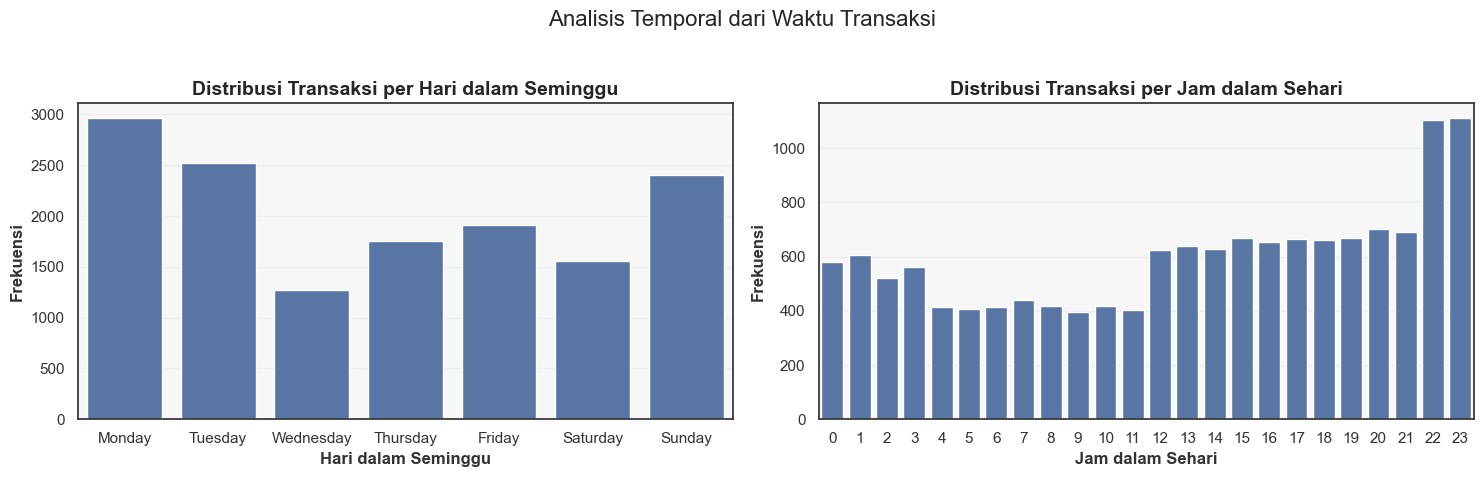

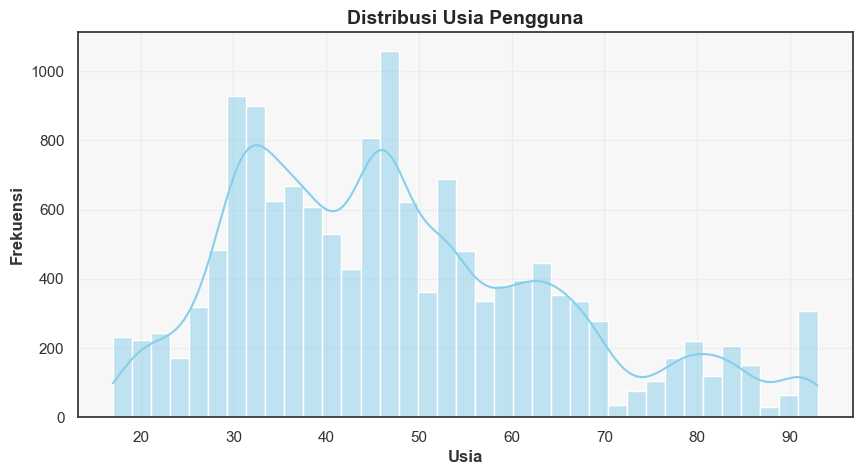

In [ ]:
# EDA untuk Variabel Temporal: Analisis 'trans_date_trans_time' dan 'dob'

# Mengonversi kolom 'trans_date_trans_time' ke tipe datetime jika belum, kemudian mengekstrak hari dalam seminggu dan jam transaksi
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()  # Mendapatkan nama hari
data['hour'] = data['trans_date_trans_time'].dt.hour  # Mendapatkan jam transaksi

# Membuat plot distribusi transaksi berdasarkan hari dalam seminggu dan jam dalam sehari
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analisis Temporal dari Waktu Transaksi', fontsize=16)

# Plot distribusi transaksi berdasarkan hari dalam seminggu
sns.countplot(data=data, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axs[0])
axs[0].set_title('Distribusi Transaksi per Hari dalam Seminggu')
axs[0].set_xlabel('Hari dalam Seminggu')  # Menambahkan label pada sumbu x
axs[0].set_ylabel('Frekuensi')  # Menambahkan label pada sumbu y

# Plot distribusi transaksi berdasarkan jam dalam sehari
sns.countplot(data=data, x='hour', ax=axs[1])
axs[1].set_title('Distribusi Transaksi per Jam dalam Sehari')
axs[1].set_xlabel('Jam dalam Sehari')  # Menambahkan label pada sumbu x
axs[1].set_ylabel('Frekuensi')  # Menambahkan label pada sumbu y

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Mengatur layout plot agar rapi
plt.show()  # Menampilkan plot

# Menghitung usia berdasarkan 'dob' dan membuat plot distribusi usia
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365  # Menghitung usia dalam tahun

# Membuat plot distribusi usia pengguna
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


#### Analisis Bivariat 🔗

##### Informasi dari Visualisasi Bivariat

1. **Distribusi Jumlah Transaksi Berdasarkan `is_fraud` (Violin Plot)**:
   - Plot ini menunjukkan bahwa transaksi yang ditandai sebagai penipuan (`is_fraud = 1`) memiliki distribusi jumlah transaksi yang lebih tersebar dibandingkan dengan transaksi normal (`is_fraud = 0`).
   - Mayoritas transaksi penipuan cenderung memiliki jumlah transaksi yang lebih tinggi dibandingkan dengan transaksi yang tidak ditandai sebagai penipuan, yang sebagian besar terkonsentrasi pada nilai yang lebih rendah.

2. **Mosaic Plot of Category vs is_fraud**:
   - Kategori tertentu seperti `grocery_pos`, `shopping_net` dan `misc_net` memiliki proporsi penipuan yang lebih tinggi dibandingkan dengan kategori lainnya, terlihat dari kotak `is_fraud = 1` yang lebih besar di kategori tersebut.

3. **Mosaic Plot of Day of Week vs is_fraud**:
   - Plot ini menunjukkan bahwa penipuan cenderung lebih banyak terjadi pada hari kerja, terutama pada **Senin** dan **Selasa**.
   - Hari-hari seperti Sabtu dan Minggu memiliki jumlah penipuan yang lebih sedikit, yang mungkin mencerminkan aktivitas penipuan yang lebih tinggi selama hari kerja dibandingkan dengan akhir pekan.

Informasi dari visualisasi ini dapat membantu mengidentifikasi pola pada transaksi penipuan berdasarkan jumlah transaksi, kategori barang, dan waktu transaksi dalam seminggu. 🕵️‍♀️

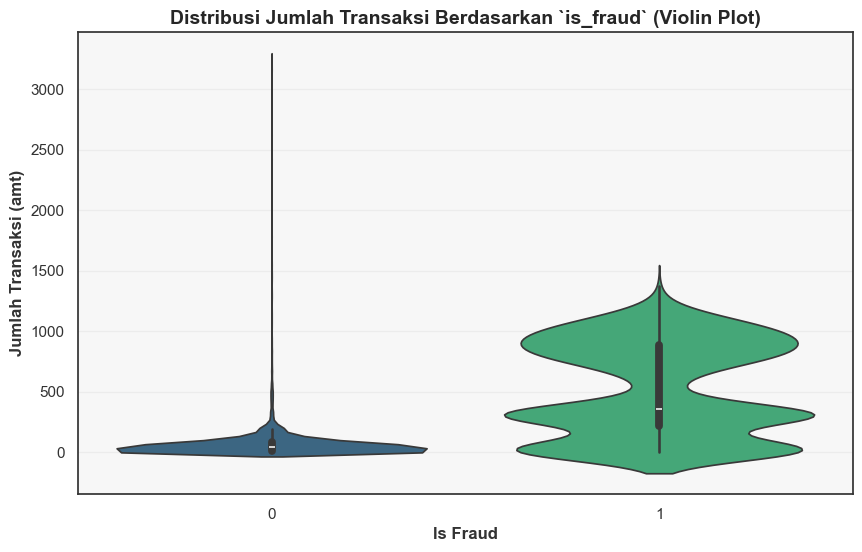

<Figure size 1800x1000 with 0 Axes>

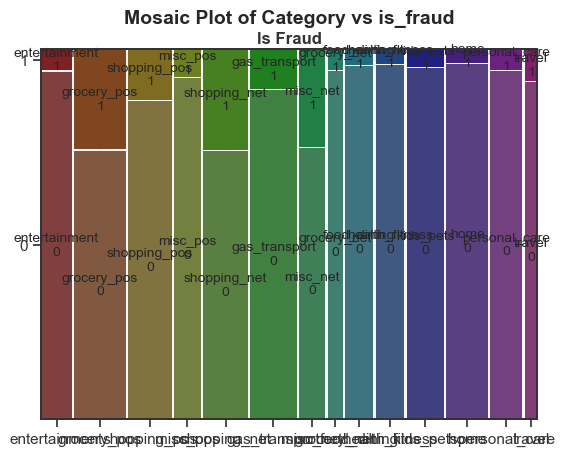

<Figure size 1600x800 with 0 Axes>

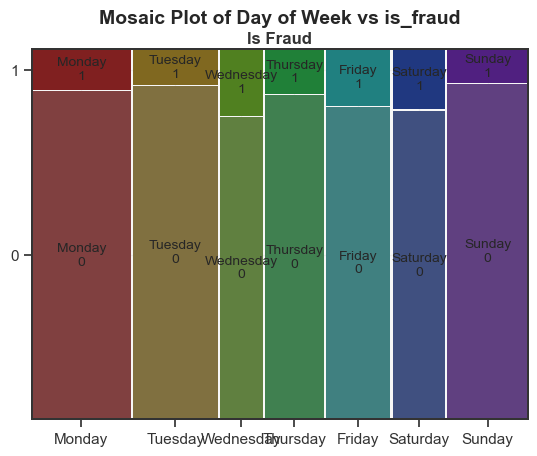

In [ ]:
# Plot violin untuk melihat distribusi jumlah transaksi (`amt`) berdasarkan status penipuan (`is_fraud`)
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='is_fraud', y='amt', hue='is_fraud', dodge=False, palette='viridis', legend=False)
plt.title('Distribusi Jumlah Transaksi Berdasarkan `is_fraud` (Violin Plot)')
plt.xlabel('Is Fraud')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

# Mengatur urutan `day_of_week` dari Senin hingga Minggu agar lebih rapi dan sesuai kronologi
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=day_order, ordered=True)

# Plot mosaic untuk melihat hubungan antara `category` dan `is_fraud` dengan tampilan lebih besar dan label miring
plt.figure(figsize=(18, 10))
mosaic(data, ['category', 'is_fraud'], title='Mosaic Plot of Category vs is_fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Category')
plt.xticks(rotation=90, fontsize=10, style='italic')  # Label sumbu x diputar 90 derajat dan dimiringkan
plt.yticks(fontsize=10, style='italic')  # Label sumbu y dimiringkan
plt.show()

# Plot mosaic untuk melihat hubungan antara `day_of_week` dan `is_fraud` dengan urutan hari yang benar
plt.figure(figsize=(16, 8))
mosaic(data.sort_values('day_of_week'), ['day_of_week', 'is_fraud'], title='Mosaic Plot of Day of Week vs is_fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Day of Week')
plt.xticks(rotation=45, fontsize=10, style='italic')  # Label sumbu x diputar 45 derajat dan dimiringkan
plt.yticks(fontsize=10, style='italic')  # Label sumbu y dimiringkan
plt.show()

##### Analisis Visualisasi Hubungan antara Jarak, Populasi Kota, Usia, dan Jumlah Transaksi (amt) terhadap Status Penipuan (`is_fraud`)

Berdasarkan visualisasi berikut, kita dapat menarik beberapa kesimpulan awal mengenai variabel-variabel yang mungkin berpengaruh terhadap status penipuan (`is_fraud`):

1. **Distribusi Jarak antara Pengguna dan Merchant Berdasarkan Status Penipuan**:
   - Histogram ini menunjukkan distribusi jarak antara pengguna dan merchant dalam transaksi. 
   - Tidak ada pola yang jelas yang menunjukkan bahwa jarak antara pengguna dan merchant secara signifikan memengaruhi status penipuan. Penipuan terjadi pada berbagai jarak yang cukup merata.

2. **Hubungan antara Jarak dan Jumlah Transaksi Berdasarkan Status Penipuan**:
   - Scatter plot ini memperlihatkan bahwa meskipun ada beberapa transaksi penipuan pada berbagai jarak, jumlah transaksi (`amt`) tampaknya lebih bervariasi dan menunjukkan pola tertentu.
   - Transaksi dengan jumlah yang lebih besar tampak lebih rentan terhadap penipuan, meskipun jaraknya bervariasi.

3. **Hubungan antara Populasi Kota dan Jumlah Transaksi Berdasarkan Status Penipuan**:
   - Scatter plot ini menunjukkan bahwa populasi kota (`city_pop`) pengguna tidak memiliki korelasi yang jelas dengan status penipuan.
   - Penipuan terjadi baik di kota berpopulasi kecil maupun besar, sehingga populasi kota tampaknya tidak berpengaruh secara signifikan terhadap penipuan.

4. **Hubungan antara Usia dan Jumlah Transaksi Berdasarkan Status Penipuan**:
   - Scatter plot ini memperlihatkan bahwa usia pengguna tidak memiliki hubungan yang jelas dengan status penipuan.
   - Penipuan terjadi pada berbagai kelompok usia dan tidak menunjukkan pola khusus.

Dari keempat visualisasi di atas, **jumlah transaksi (`amt`) tampaknya menjadi variabel yang paling berpengaruh terhadap status penipuan** (`is_fraud`). Transaksi dengan jumlah yang lebih besar tampaknya lebih sering dikaitkan dengan penipuan, meskipun jarak, populasi kota, dan usia tidak menunjukkan pengaruh yang signifikan. Analisis ini menunjukkan pentingnya `amt` sebagai variabel yang potensial dalam mendeteksi penipuan. 💡


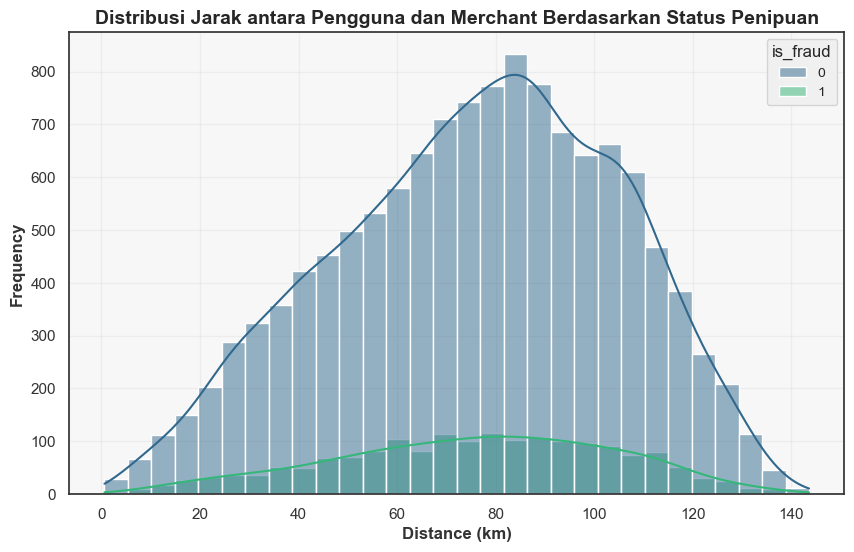

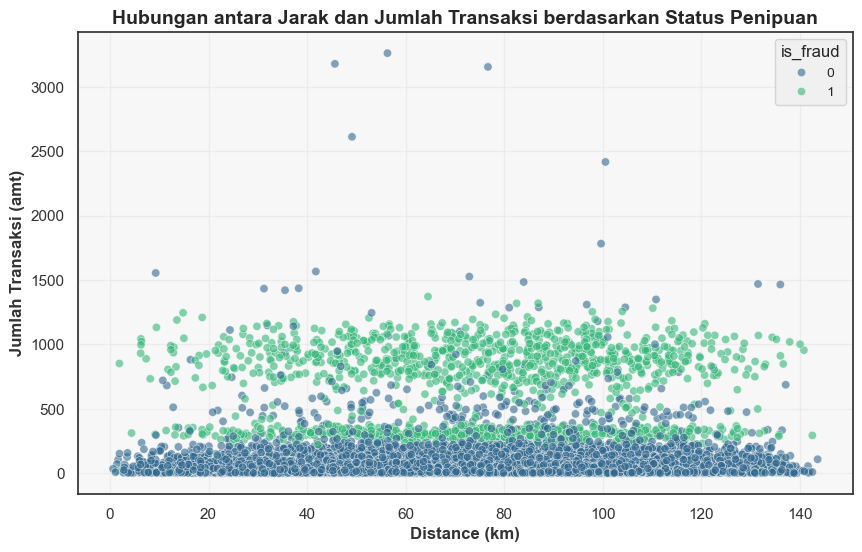

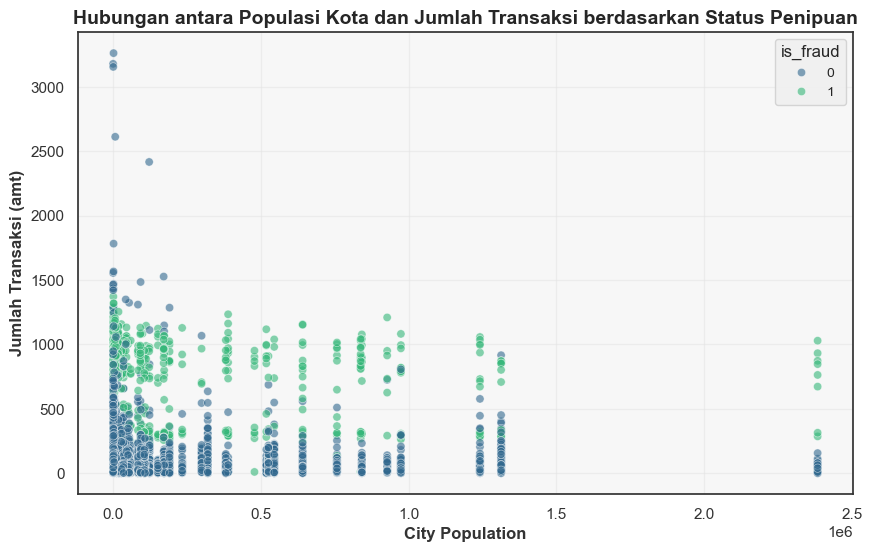

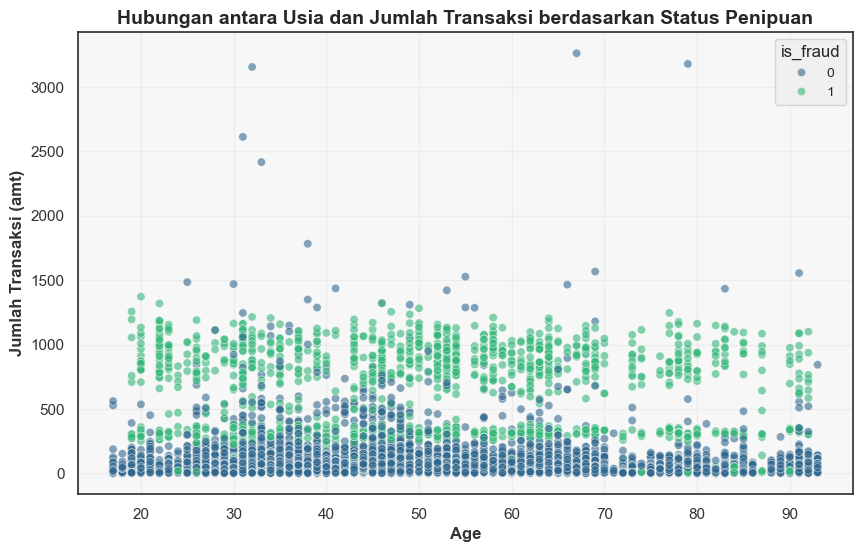

In [ ]:
# Fungsi untuk menghitung jarak antara pengguna dan merchant menggunakan formula Haversine
# Formula ini menghitung jarak berdasarkan koordinat latitude dan longitude
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam kilometer
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Mengembalikan jarak dalam kilometer

# Menghitung jarak antara pengguna dan merchant untuk setiap transaksi, dan menambahkannya sebagai kolom baru
data['distance_km'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])

# Visualisasi distribusi jarak antara pengguna dan merchant, dikelompokkan berdasarkan status penipuan
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='distance_km', hue='is_fraud', bins=30, kde=True, palette='viridis')
plt.title('Distribusi Jarak antara Pengguna dan Merchant Berdasarkan Status Penipuan')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot untuk melihat hubungan antara jarak dan jumlah transaksi, serta status penipuan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance_km', y='amt', hue='is_fraud', palette='viridis', alpha=0.6)
plt.title('Hubungan antara Jarak dan Jumlah Transaksi berdasarkan Status Penipuan')
plt.xlabel('Distance (km)')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

# Scatter plot untuk melihat hubungan antara populasi kota pengguna dan jumlah transaksi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='city_pop', y='amt', hue='is_fraud', palette='viridis', alpha=0.6)
plt.title('Hubungan antara Populasi Kota dan Jumlah Transaksi berdasarkan Status Penipuan')
plt.xlabel('City Population')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

# Scatter plot untuk melihat hubungan antara usia pengguna dan jumlah transaksi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='amt', hue='is_fraud', palette='viridis', alpha=0.6)
plt.title('Hubungan antara Usia dan Jumlah Transaksi berdasarkan Status Penipuan')
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

## 2.1. Task 1: Regresi `amt` 📊

### Import Library dan Data 📥

#### Ringkasan Library yang Digunakan 📚
- **Pandas**: Digunakan untuk manipulasi dan analisis data struktural.
- **NumPy**: Digunakan untuk operasi numerik seperti array dan perhitungan matematika.
- **Matplotlib**: Digunakan untuk visualisasi data, termasuk pembuatan plot dan grafik.
- **Scikit-learn**: Digunakan untuk membagi dataset menjadi data latih dan data uji, serta menyediakan metrik evaluasi seperti Mean Absolute Percentage Error (MAPE) dan algoritma KMeans untuk clustering data.
- **XGBoost**: Digunakan untuk membangun model machine learning berbasis boosting.
- **SHAP**: Digunakan untuk interpretasi model dan analisis pentingnya fitur menggunakan nilai SHAP.
- **Optuna**: Digunakan untuk optimasi hyperparameter dengan pencarian otomatis.


In [ ]:
# Mengimpor library yang dibutuhkan untuk analisis data, pemodelan machine learning, dan interpretasi model

import pandas as pd  # Library untuk manipulasi data dan analisis data struktural
import numpy as np  # Library untuk operasi numerik, seperti array dan operasi matematika
import matplotlib.pyplot as plt  # Library untuk visualisasi data, seperti plot dan grafik

from sklearn.model_selection import train_test_split  # Membagi dataset menjadi data latih dan data uji
import xgboost as xgb  # Library XGBoost untuk pemodelan machine learning berbasis boosting
import shap  # Library untuk interpretasi model dan analisis pentingnya fitur menggunakan SHAP values
from sklearn.cluster import KMeans  # Library untuk clustering data dengan KMeans

import optuna  # Library untuk optimasi hyperparameter menggunakan pencarian otomatis
from sklearn.metrics import mean_absolute_percentage_error  # Metrik untuk mengukur persentase kesalahan rata-rata absolut

In [ ]:
RANDOM_STATE = 42
FRAUD_DATA_PATH = 'https://github.com/evanhfw/competition/raw/refs/heads/main/gelarrasa2024/fraud.xlsx'

### Pembersihan dan Pemrosesan Data 🧹

#### Penjelasan Kode: Pemrosesan Data untuk Analisis Deteksi Fraud

Kode di bawah ini bertujuan untuk memuat, membersihkan, dan memformat data transaksi dalam rangka mendukung analisis deteksi fraud. Tahapan-tahapan pemrosesan yang dilakukan meliputi:

1. **Membaca Data dan Menghapus Duplikat**  
   Data transaksi dibaca dari file di path `FRAUD_DATA_PATH`. Kemudian, baris-baris duplikat berdasarkan kolom `trans_num` dihapus untuk memastikan setiap transaksi bersifat unik.

2. **Mengonversi Kolom Waktu ke Format `datetime`**  
   Kolom `trans_date_trans_time` dan `dob` diubah ke tipe `datetime`. Proses ini membantu dalam analisis berbasis waktu dan juga mempermudah dalam ekstraksi informasi temporal seperti bulan, hari dalam minggu, dan hari dalam tahun.

3. **Membersihkan Kolom `is_fraud` dan Mengonversi ke Tipe Kategori**  
   Nilai-nilai dalam kolom `is_fraud` dibersihkan untuk menghilangkan ketidaksesuaian data, seperti entri yang memiliki tambahan tanggal dan waktu, kemudian dikonversi menjadi tipe kategori. Hal ini menghemat penggunaan memori dan membantu dalam analisis kategorikal.

4. **Membersihkan dan Mengonversi Kolom Kategorikal Lainnya**  
   Kolom `merchant` dan `job` dibersihkan dari tanda kutip, lalu dikonversi menjadi tipe kategori, bersama dengan kolom lainnya seperti `category`, `city`, `state`, dan `trans_num`. Konversi ini membantu mengoptimalkan penggunaan memori.

5. **Mengekstraksi Informasi Temporal**  
   Dari kolom `trans_date_trans_time`, dibuat beberapa kolom baru untuk analisis berbasis waktu, yaitu:
   - `trans_month` (bulan transaksi),
   - `trans_dayofweek` (hari dalam minggu),
   - `trans_dayofyear` (hari dalam tahun).
   
   Semua kolom temporal ini dikonversi menjadi kategori untuk efisiensi memori.

6. **Menampilkan Informasi Dataset**  
   Setelah semua pemrosesan data selesai, fungsi `data.info()` digunakan untuk menampilkan ringkasan tipe data, jumlah entri, dan kolom-kolom yang telah dikonversi. 

Langkah-langkah ini memastikan dataset siap untuk dianalisis lebih lanjut dalam deteksi fraud atau dalam proses pembelajaran mesin. 🚀


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')           # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menampilkan informasi dataset setelah semua pemrosesan tipe data selesai
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

### Eksperimen Pemodelan 🧪

#### Eksperimen 1: Model XGBoost Menggunakan Fitur Terbatas 🎯

##### Tujuan Eksperimen
Eksperimen ini bertujuan untuk melatih model XGBoost dengan subset fitur terbatas untuk mengevaluasi performa model dalam memprediksi nilai target (`amt`). Pemilihan fitur yang lebih sedikit diharapkan dapat meningkatkan efisiensi komputasi tanpa mengorbankan akurasi secara signifikan.

##### Fitur yang Digunakan
Model XGBoost pada eksperimen ini hanya menggunakan fitur berikut:
- `merchant`
- `category`
- `city`
- `state`
- `city_pop`
- `job`

##### Parameter Model
Parameter model yang digunakan dalam pelatihan ini adalah sebagai berikut:
- **Objective**: `reg:absoluteerror` untuk meminimalkan kesalahan absolut.
- **Learning Rate**: 0.01, mengontrol kecepatan pembelajaran model.
- **Random State**: Ditetapkan untuk memastikan konsistensi hasil.

##### Pelatihan dan Evaluasi Model
Proses pelatihan menggunakan 10,000 iterasi maksimum, dengan `early_stopping_rounds=10` untuk menghentikan pelatihan jika performa tidak membaik dalam 10 iterasi berturut-turut. Model juga menggunakan MAPE sebagai metrik kustom untuk mengukur akurasi prediksi.

##### Hasil Pelatihan
Pada iterasi ke-93, model mencapai hasil berikut:
- **Data Latih**:
  - MAE: 91.17754
  - MAPE: 249.44770
- **Data Uji**:
  - MAE: 100.15405
  - MAPE: 305.43237

##### Kesimpulan
Eksperimen ini menunjukkan bahwa penggunaan subset fitur dapat memberikan hasil prediksi yang cukup akurat dengan efisiensi komputasi yang lebih baik. Namun, MAPE pada data uji menunjukkan adanya potensi kesalahan yang perlu diperbaiki, baik melalui tuning parameter lebih lanjut atau dengan mempertimbangkan fitur tambahan untuk meningkatkan akurasi. 🎯


##### Definisi Fungsi Custom Evaluation Metric: Mean Absolute Percentage Error (MAPE) 📐

Fungsi `feval_mape` ini dirancang sebagai metrik evaluasi kustom untuk model XGBoost, yaitu Mean Absolute Percentage Error (MAPE). MAPE mengukur akurasi prediksi dengan menghitung rata-rata kesalahan persentase absolut antara nilai aktual dan prediksi. Metrik ini cocok untuk data di mana kesalahan relatif antara prediksi dan nilai aktual lebih penting daripada kesalahan absolut.

###### Parameter:
- `preds` : Array-like  
  Berisi nilai prediksi yang dihasilkan oleh model.

- `dtrain` : xgboost.DMatrix  
  Data pelatihan yang berisi label atau nilai aktual.

###### Return:
- Mengembalikan tuple dengan dua elemen:
  - **name (str)**: Nama metrik evaluasi ('mape').
  - **value (float)**: Nilai MAPE yang dihitung.

###### Penjelasan Tambahan:
Fungsi ini akan menghitung nilai MAPE dengan cara berikut:
- Mengambil nilai label aktual dari data pelatihan.
- Menghitung persentase kesalahan absolut untuk setiap prediksi.
- Mengembalikan rata-rata kesalahan persentase tersebut sebagai hasil MAPE.

Fungsi ini dapat diintegrasikan dalam proses pelatihan XGBoost sebagai metrik kustom untuk memantau kinerja model.


In [ ]:
def feval_mape(preds, dtrain):
    """
    Custom evaluation metric for XGBoost: Mean Absolute Percentage Error (MAPE).

    Parameters
    ----------
    preds : array-like
        Predicted values generated by the model.
    dtrain : xgboost.DMatrix
        The training data that contains the true labels.

    Returns
    -------
    tuple
        A tuple containing:
        - name (str): The name of the evaluation metric ('mape').
        - value (float): The computed MAPE value.
    """
    # Retrieve true labels from the training data
    labels = dtrain.get_label()
    
    # Calculate the Mean Absolute Percentage Error (MAPE)
    # MAPE = mean of the absolute percentage error between predictions and labels
    mape = np.mean(np.abs((labels - preds) / labels)) * 100
    
    return 'mape', mape


##### Pemrosesan Data: Pembersihan, Konversi Tipe, dan Ekstraksi Fitur Temporal

Kode berikut digunakan untuk memuat dan memproses data transaksi untuk keperluan analisis. Langkah-langkah utama meliputi:

1. **Membaca Data dan Menghapus Duplikat**  
   Membaca data dari `FRAUD_DATA_PATH` dan menghapus entri duplikat berdasarkan kolom `trans_num` agar setiap transaksi memiliki nomor unik.

2. **Mengonversi Kolom Waktu ke Format `datetime`**  
   Kolom `trans_date_trans_time` dan `dob` dikonversi ke tipe `datetime`, mempermudah analisis yang melibatkan waktu dan memungkinkan ekstraksi fitur temporal.

3. **Membersihkan Kolom `is_fraud` dan Mengonversi ke Tipe Kategori**  
   Nilai-nilai dalam kolom `is_fraud` dibersihkan dari entri yang tidak sesuai dan dikonversi menjadi kategori untuk menghemat memori serta mendukung analisis kategorikal.

4. **Pembersihan dan Konversi Kolom Kategorikal Lainnya**  
   Kolom `merchant` dan `job` dibersihkan dari karakter tanda kutip dan dikonversi ke tipe kategori, bersama kolom lainnya seperti `category`, `city`, `state`, dan `trans_num`.

5. **Ekstraksi Fitur Temporal**  
   Dari kolom `trans_date_trans_time`, fitur temporal tambahan dibuat, yaitu:
   - `trans_month` (bulan transaksi),
   - `trans_dayofweek` (hari dalam minggu),
   - `trans_dayofyear` (hari dalam tahun).
   
   Semua kolom ini dikonversi ke tipe kategori untuk optimasi memori.

6. **Menampilkan Informasi Dataset**  
   Kode mengakhiri proses dengan menampilkan informasi ringkas mengenai tipe data, jumlah entri, dan kolom yang telah dikonversi menggunakan `data.info()`.

Pemrosesan ini mempersiapkan dataset untuk analisis lanjutan dalam mendeteksi aktivitas fraud dan pembelajaran mesin.


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')           # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menampilkan informasi dataset setelah pemrosesan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Pemilihan Fitur dan Pembagian Data untuk Model Pembelajaran Mesin

Kode berikut digunakan untuk menentukan fitur-fitur yang akan digunakan dalam model pembelajaran mesin, serta memisahkan dataset menjadi data latih dan data uji:

1. **Menentukan Fitur yang Digunakan**  
   Variabel `feature_used` berisi daftar fitur yang akan digunakan sebagai variabel independen dalam model. Fitur-fitur ini dipilih dari data awal dan dimasukkan ke dalam variabel `X`, sementara `y` diatur sebagai variabel target (`amt`).

2. **Pembagian Data Latih dan Uji**  
   Dataset dibagi menjadi dua bagian:
   - **Data latih** (80%) untuk melatih model,
   - **Data uji** (20%) untuk mengevaluasi kinerja model setelah pelatihan.
   
   `RANDOM_STATE` digunakan untuk memastikan hasil pembagian yang konsisten pada setiap pengulangan.

3. **Menampilkan Informasi `X_train`**  
   Kode ini mengakhiri proses dengan menampilkan informasi ringkas mengenai `X_train`, termasuk tipe data dan jumlah entri pada setiap kolom. Hal ini memastikan data siap untuk tahap pelatihan model.

Tahapan ini memastikan bahwa model memiliki data latih dan uji yang terstruktur dengan baik dan menggunakan fitur yang relevan.


In [ ]:
# Menentukan fitur-fitur yang akan digunakan dalam model
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job']

# Memisahkan data berdasarkan fitur yang dipilih untuk variabel independen (X)
# dan variabel dependen (y), di mana 'amt' merupakan variabel target.
X = data[feature_used]
y = data['amt']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# RANDOM_STATE digunakan untuk memastikan pembagian data yang konsisten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Menampilkan informasi terkait X_train, seperti tipe data dan jumlah data pada setiap kolom
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   merchant  11506 non-null  category
 1   category  11506 non-null  category
 2   city      11506 non-null  category
 3   state     11506 non-null  category
 4   city_pop  11506 non-null  int64   
 5   job       11506 non-null  category
dtypes: category(5), int64(1)
memory usage: 303.3 KB


##### Pelatihan Model XGBoost dengan Parameter yang Ditentukan

Kode berikut digunakan untuk melatih model XGBoost dengan parameter yang telah ditetapkan sebelumnya dan menggunakan subset fitur untuk meningkatkan efisiensi pelatihan. Fitur yang digunakan dalam pemodelan ini adalah:
- `merchant`
- `category`
- `city`
- `state`
- `city_pop`
- `job`

Tahapan utamanya adalah:

1. **Menetapkan Parameter Model**  
   Parameter disimpan dalam `params`, termasuk:
   - `objective`: Menggunakan `reg:absoluteerror` untuk regresi dengan fungsi error absolut.
   - `learning_rate`: Ditetapkan sebesar 0.01 untuk mengontrol kecepatan pembelajaran.
   - `random_state`: Menetapkan nilai random untuk konsistensi hasil model.

2. **Membuat DMatrix untuk Data Latih dan Uji**  
   Data latih (`X_train` dan `y_train`) dan data uji (`X_test` dan `y_test`) diubah menjadi objek `DMatrix`, yang merupakan format khusus XGBoost yang mendukung data kategorikal melalui `enable_categorical=True`.

3. **Pelatihan Model XGBoost**  
   Model dilatih menggunakan parameter dan data yang telah disiapkan. Parameter tambahan pada pelatihan ini meliputi:
   - `num_boost_round=10000`: Menetapkan jumlah maksimum iterasi boosting.
   - `evals`: Menyertakan data latih (`train`) dan data uji (`test`) untuk memantau kinerja model selama pelatihan.
   - `early_stopping_rounds=10`: Menghentikan pelatihan lebih awal jika MAPE tidak meningkat dalam 10 iterasi berturut-turut.
   - `custom_metric=feval_mape`: Menggunakan MAPE sebagai metrik evaluasi khusus.
   - `maximize=False`: Menetapkan optimisasi untuk meminimalkan nilai MAPE.
   - `verbose_eval=100`: Menampilkan hasil evaluasi setiap 100 iterasi.

4. **Hasil Pelatihan Model**  
   Setelah iterasi ke-93, model mencapai hasil sebagai berikut:
   - **Data Latih**:
     - MAE: 91.17754
     - MAPE: 249.44770
   - **Data Uji**:
     - MAE: 100.15405
     - MAPE: 305.43237

Tahapan ini melatih model untuk meminimalkan kesalahan MAPE dan mempersiapkannya untuk prediksi data uji, dengan fokus pada subset fitur yang telah dipilih.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai objective function
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk konsistensi hasil
}

# Mengubah data latih (X_train dan y_train) menjadi DMatrix untuk XGBoost,
# dengan enable_categorical=True untuk mendukung fitur kategorikal.
train_dm = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

# Mengubah data uji (X_test dan y_test) menjadi DMatrix untuk XGBoost,
# juga dengan enable_categorical=True.
test_dm = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan menggunakan parameter yang sudah ditentukan
# - num_boost_round=10000: batas maksimum iterasi boosting
# - evals: daftar evaluasi yang berisi data latih ('train') dan data uji ('test') untuk memantau kinerja model
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)


[0]	train-mae:103.29718	train-mape:345.71016	test-mae:107.21868	test-mape:348.10398
[93]	train-mae:91.17754	train-mape:249.44770	test-mae:100.15405	test-mape:305.43237


#### Eksperimen 2: Peningkatan Performansi Model XGBoost dengan Penambahan Fitur Temporal dan Kategorikal 🚀

##### Deskripsi Eksperimen
Eksperimen 2 ini bertujuan untuk meningkatkan performa model XGBoost dalam memprediksi nilai `amt` (nilai transaksi) dengan menambahkan beberapa fitur temporal dan kategorikal baru ke dalam model. Pada eksperimen sebelumnya (Eksperimen 1), hanya subset fitur sederhana yang digunakan, yaitu fitur dasar seperti `merchant`, `category`, `city`, `state`, `city_pop`, dan `job`. Di Eksperimen 2 ini, kita memperluas `feature_used` dengan beberapa fitur temporal yang diturunkan dari kolom `trans_date_trans_time`, yaitu:
- `trans_month`: Bulan transaksi,
- `trans_dayofweek`: Hari dalam minggu,
- `trans_dayofmonth`: Hari dalam bulan,
- `trans_dayofyear`: Hari dalam tahun.

Dengan penambahan fitur-fitur ini, diharapkan model dapat menangkap pola temporal yang lebih kompleks, seperti frekuensi transaksi berdasarkan hari atau bulan, yang kemungkinan berkontribusi terhadap nilai transaksi. Selain itu, proses pemodelan ini tetap mempertahankan parameter yang digunakan pada Eksperimen 1 dengan sedikit penyesuaian untuk mendukung data tambahan.

##### Hasil dan Kesimpulan
Pada Eksperimen 2 ini, model menunjukkan peningkatan performa yang signifikan dibandingkan dengan Eksperimen 1. Hasil evaluasi pada iterasi ke-142 adalah sebagai berikut:
- **Data Latih**:
  - MAE: 59.93102
  - MAPE: 189.54623
- **Data Uji**:
  - MAE: 70.38117
  - MAPE: 248.71962

**Perbandingan dengan Eksperimen 1:**
- Pada Eksperimen 1, MAE dan MAPE pada data uji adalah 100.15405 dan 305.43237.
- Dengan penambahan fitur temporal, MAE dan MAPE pada data uji Eksperimen 2 turun signifikan menjadi 70.38117 dan 248.71962.

Penurunan ini mengindikasikan bahwa fitur tambahan membantu model mengenali pola yang lebih detail dalam data, terutama yang berhubungan dengan frekuensi transaksi pada hari atau bulan tertentu. Hal ini menunjukkan bahwa penambahan fitur yang relevan dapat meningkatkan akurasi prediksi model dalam mendeteksi pola transaksi yang lebih kompleks.

Secara keseluruhan, Eksperimen 2 membuktikan bahwa peningkatan jumlah fitur, terutama yang relevan secara temporal dan kategorikal, dapat membantu model dalam memprediksi nilai transaksi dengan lebih akurat dan efisien.


##### Pemrosesan dan Pembersihan Data Transaksi

Kode berikut ini bertujuan untuk memuat, membersihkan, dan mengonversi data transaksi guna mempersiapkannya untuk analisis lanjutan. Tahapan yang dilakukan meliputi:

1. **Membaca Data dan Menghapus Duplikat**  
   Data dibaca dari `FRAUD_DATA_PATH`, kemudian entri duplikat pada kolom `trans_num` dihapus untuk memastikan setiap transaksi unik.

2. **Mengonversi Kolom Waktu ke Format `datetime`**  
   Kolom `trans_date_trans_time` dan `dob` dikonversi ke tipe `datetime`, mempermudah analisis waktu serta memungkinkan ekstraksi informasi temporal yang lebih detail.

3. **Membersihkan Kolom `is_fraud` dan Mengonversinya ke Tipe Kategori**  
   Kolom `is_fraud` dibersihkan dari entri yang tidak sesuai (misalnya, penambahan tanggal dan waktu yang tidak diperlukan), lalu diubah menjadi tipe kategori untuk optimasi memori.

4. **Pembersihan dan Konversi Kolom Kategorikal Lainnya**  
   Kolom `merchant` dan `job` dibersihkan dari karakter tanda kutip, kemudian dikonversi ke tipe kategori bersama dengan kolom lainnya seperti `category`, `city`, `state`, dan `trans_num`.

5. **Ekstraksi Fitur Temporal**  
   Dari kolom `trans_date_trans_time`, fitur-fitur temporal baru dibuat, seperti:
   - `trans_month` (bulan transaksi),
   - `trans_dayofweek` (hari dalam minggu),
   - `trans_dayofmonth` (hari dalam bulan),
   - `trans_dayofyear` (hari dalam tahun).
   
   Semua fitur ini dikonversi menjadi tipe kategori untuk efisiensi memori.

6. **Menampilkan Informasi Dataset**  
   Setelah pemrosesan, informasi lengkap tentang dataset ditampilkan menggunakan `data.info()` untuk memastikan data siap digunakan dalam analisis lebih lanjut atau pelatihan model.

Langkah-langkah ini mempersiapkan dataset agar lebih optimal untuk analisis dan pemrosesan selanjutnya.


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')            # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofmonth'] = data['trans_date_trans_time'].dt.day.astype('category')         # Hari dalam bulan
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menampilkan informasi dataset setelah semua pemrosesan tipe data selesai
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Memisahkan Data dan Menentukan Fitur untuk Model Prediksi

Kode berikut ini digunakan untuk memisahkan data dan memilih fitur-fitur yang akan digunakan dalam model prediksi:

1. **Menyiapkan Variabel Independen (`X`) dan Variabel Target (`y`)**  
   - `X`: Variabel independen diperoleh dengan menghapus kolom `amt` dan `is_fraud`, menyisakan fitur-fitur yang relevan untuk prediksi.
   - `y`: Variabel target diatur sebagai kolom `amt`, yang merupakan nilai yang akan diprediksi oleh model.

2. **Menentukan Fitur yang Akan Digunakan dalam Model**  
   Fitur-fitur yang relevan ditentukan dalam variabel `feature_used`. Fitur ini meliputi informasi transaksi, kategori, dan informasi temporal.

3. **Pembagian Data Latih dan Uji**  
   Dataset dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split`. Nilai `RANDOM_STATE` digunakan untuk menjaga konsistensi pembagian data pada setiap pengulangan kode.

4. **Menampilkan Informasi `X_train`**  
   Informasi terkait `X_train` ditampilkan untuk memastikan tipe data, jumlah kolom, dan konsistensi data setelah pembagian.

Tahapan ini memastikan bahwa data terstruktur dengan baik dan menggunakan fitur yang dipilih secara spesifik untuk mempersiapkan model prediksi.


In [ ]:
# Memisahkan data untuk variabel independen (X) dengan menghapus kolom 'amt' dan 'is_fraud',
# sehingga hanya menyisakan fitur yang relevan untuk prediksi.
X = data.drop(columns=['amt', 'is_fraud'])

# Menetapkan variabel target (y) sebagai kolom 'amt' untuk prediksi
y = data['amt']

# Menentukan fitur-fitur yang akan digunakan dalam model
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 
                'trans_month', 'trans_dayofweek', 'trans_dayofmonth', 'trans_dayofyear']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# RANDOM_STATE digunakan untuk menjaga konsistensi hasil pembagian data.
X_train, X_test, y_train, y_test = train_test_split(X[feature_used], y, test_size=0.2, random_state=RANDOM_STATE)

# Menampilkan informasi terkait X_train, seperti tipe data, jumlah kolom, dan data non-null pada setiap kolom.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   merchant          11506 non-null  category
 1   category          11506 non-null  category
 2   city              11506 non-null  category
 3   state             11506 non-null  category
 4   city_pop          11506 non-null  int64   
 5   job               11506 non-null  category
 6   trans_month       11506 non-null  category
 7   trans_dayofweek   11506 non-null  category
 8   trans_dayofmonth  11506 non-null  category
 9   trans_dayofyear   11506 non-null  category
dtypes: category(9), int64(1)
memory usage: 368.0 KB


##### Pelatihan Model XGBoost untuk Prediksi dengan Parameter yang Ditentukan

Kode berikut ini digunakan untuk melatih model XGBoost dengan parameter yang telah ditentukan dan menggunakan fitur tambahan pada variabel `feature_used`. Tahapan utamanya meliputi:

1. **Menetapkan Parameter Model**  
   Parameter disimpan dalam `params`, termasuk:
   - `objective`: `reg:absoluteerror` digunakan sebagai fungsi objektif untuk regresi dengan error absolut.
   - `learning_rate`: Ditentukan sebesar 0.01 untuk mengontrol kecepatan pembelajaran.
   - `random_state`: Ditetapkan untuk memastikan hasil yang konsisten di setiap pengulangan.

2. **Membuat DMatrix untuk Data Latih dan Data Uji**  
   Data latih (`X_train` dan `y_train`) dan data uji (`X_test` dan `y_test`) dikonversi menjadi objek `DMatrix` khusus XGBoost, dengan `enable_categorical=True` untuk mendukung fitur-fitur kategorikal.

3. **Pelatihan Model XGBoost**  
   Model dilatih dengan parameter yang ditetapkan:
   - `num_boost_round=10000`: Jumlah maksimum iterasi boosting.
   - `evals`: Data latih (`train`) dan data uji (`test`) digunakan untuk mengevaluasi kinerja model pada setiap iterasi.
   - `early_stopping_rounds=10`: Pelatihan akan berhenti lebih awal jika MAPE tidak meningkat dalam 10 iterasi berturut-turut.
   - `custom_metric=feval_mape`: MAPE digunakan sebagai metrik evaluasi khusus.
   - `maximize=False`: Menetapkan optimisasi untuk meminimalkan MAPE.
   - `verbose_eval=100`: Hasil evaluasi ditampilkan setiap 100 iterasi untuk memantau kinerja model.

Tahapan ini melatih model untuk mencapai performa terbaik dalam prediksi nilai target dengan meminimalkan MAPE.

###### Fitur yang Digunakan:
Pada eksperimen ini, fitur yang digunakan telah diperluas untuk meningkatkan performa model, yaitu:
- `merchant`
- `category`
- `city`
- `state`
- `city_pop`
- `job`
- `trans_month`
- `trans_dayofweek`
- `trans_dayofmonth`
- `trans_dayofyear`

###### Hasil Pelatihan Model
Pada iterasi ke-142, model mencapai hasil sebagai berikut:
- **Data Latih**:
  - MAE: 59.93102
  - MAPE: 189.54623
- **Data Uji**:
  - MAE: 70.38117
  - MAPE: 248.71962

###### Kesimpulan Hasil Pemodelan
Penambahan fitur temporal dan kategori lainnya berhasil menurunkan nilai MAE dan MAPE baik pada data latih maupun data uji jika dibandingkan dengan **Eksperimen 1** yang hanya menggunakan subset fitur lebih sederhana:
- Pada **Eksperimen 1**, model mencapai MAE 100.15405 dan MAPE 305.43237 pada data uji.
- Pada eksperimen ini, MAE dan MAPE data uji turun signifikan menjadi 70.38117 dan 248.71962, menunjukkan bahwa penambahan fitur membantu model memahami pola data dengan lebih baik.

Secara keseluruhan, eksperimen ini membuktikan bahwa peningkatan jumlah fitur yang relevan dapat membantu mengurangi kesalahan prediksi, sehingga model dapat mencapai performa yang lebih baik dalam mendeteksi pola yang kompleks.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai fungsi objektif
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk memastikan hasil yang konsisten
}

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost,
# dengan enable_categorical=True agar mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[feature_used], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[feature_used], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan parameter yang sudah ditentukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menyertakan data latih ('train') dan data uji ('test') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)


[0]	train-mae:102.86279	train-mape:345.44342	test-mae:106.73389	test-mape:347.39204
[100]	train-mae:69.75505	train-mape:220.44840	test-mae:78.26683	test-mape:264.64364
[142]	train-mae:59.93102	train-mape:189.54623	test-mae:70.38117	test-mape:248.71962


#### Eksperimen 3: Pelatihan Model XGBoost dengan Penambahan Fitur Cluster Geografis

##### Deskripsi Eksperimen
Pada eksperimen ini, model XGBoost dilatih dengan menambahkan fitur `cluster_pembeli`, yang diperoleh dari hasil clustering lokasi pembeli berdasarkan latitude (`lat`) dan longitude (`long`). Tujuan dari penambahan fitur ini adalah untuk memberikan informasi tambahan kepada model terkait pola distribusi geografis dari data pembeli, dengan harapan meningkatkan akurasi prediksi.

Tahapan utama dalam eksperimen ini meliputi:
1. **Persiapan Data dan Fitur**: Fitur yang digunakan pada eksperimen sebelumnya tetap dipertahankan, termasuk informasi kategori, temporal, dan demografi. Fitur baru `cluster_pembeli` ditambahkan untuk memperkaya data dengan konteks geografis.
2. **Clustering Lokasi Pembeli**: Algoritma KMeans digunakan untuk membentuk 12 cluster, memastikan keragaman data tetap terjaga dan pola-pola lokal tidak hilang.
3. **Pelatihan Model XGBoost**: Model dilatih menggunakan parameter yang sama dengan eksperimen sebelumnya, dengan penambahan fitur `cluster_pembeli`.

##### Hasil Eksperimen
Setelah menambahkan fitur `cluster_pembeli`, model mencapai hasil berikut pada iterasi ke-152:
- **Data Latih**:
  - Mean Absolute Error (MAE): 58.08559
  - Mean Absolute Percentage Error (MAPE): 183.34041
- **Data Uji**:
  - Mean Absolute Error (MAE): 68.24170
  - Mean Absolute Percentage Error (MAPE): 238.09709

##### Kesimpulan dan Perbandingan dengan Eksperimen Sebelumnya
Dibandingkan dengan **Eksperimen 2**, di mana model hanya menggunakan fitur kategori, temporal, dan demografi tanpa `cluster_pembeli`, berikut adalah peningkatan yang diperoleh:
- **Eksperimen 2** menghasilkan MAE sebesar 70.38117 dan MAPE sebesar 248.71962 pada data uji.
- Pada eksperimen ini, penambahan `cluster_pembeli` berhasil menurunkan MAE menjadi 68.24170 dan MAPE menjadi 238.09709.

Penurunan ini menunjukkan bahwa penambahan fitur geografis `cluster_pembeli` memberikan kontribusi positif terhadap performa model. Dengan mengenali pola distribusi pembeli berdasarkan lokasi geografis, model dapat lebih akurat dalam memahami variasi data, yang pada akhirnya menghasilkan prediksi yang lebih tepat. Eksperimen ini menegaskan pentingnya informasi geografis dalam membantu model memahami konteks dari data yang beragam.


##### Pemrosesan Data Transaksi: Pembersihan dan Konversi Tipe Data

Kode di bawah ini bertujuan untuk memuat, membersihkan, dan memformat data transaksi agar siap digunakan dalam analisis dan pemodelan. Berikut adalah langkah-langkah yang dilakukan:

1. **Membaca Data dan Menghapus Duplikat**  
   - Data dibaca dari path `FRAUD_DATA_PATH`.
   - Entri duplikat pada kolom `trans_num` dihapus, menyisakan hanya entri unik per transaksi.

2. **Konversi Kolom Waktu ke Format `datetime`**  
   - Kolom `trans_date_trans_time` dan `dob` dikonversi ke tipe `datetime`, yang memudahkan analisis berbasis waktu.
   - Urutan data ditetapkan berdasarkan `trans_date_trans_time` untuk memastikan data tersusun kronologis.

3. **Pembersihan dan Konversi Kolom `is_fraud` ke Tipe Kategori**  
   - Kolom `is_fraud` dibersihkan dari entri yang tidak sesuai dan dikonversi menjadi tipe kategori untuk optimasi memori.

4. **Pembersihan dan Konversi Kolom Kategorikal Lainnya**  
   - Kolom `merchant` dan `job` dibersihkan dari tanda kutip dan dikonversi menjadi tipe kategori.
   - Kolom lain, seperti `category`, `city`, `state`, dan `trans_num`, juga dikonversi menjadi tipe kategori untuk menghemat memori.

5. **Ekstraksi Fitur Temporal**  
   - Beberapa fitur temporal ditambahkan untuk mendukung analisis berbasis waktu, termasuk:
     - `trans_month`: Bulan transaksi.
     - `trans_dayofweek`: Hari dalam minggu.
     - `trans_dayofmonth`: Hari dalam bulan.
     - `trans_dayofyear`: Hari dalam tahun.
   - Fitur-fitur ini dikonversi menjadi kategori untuk efisiensi memori.

6. **Menampilkan Informasi Dataset**  
   - Ringkasan dataset setelah pemrosesan ditampilkan menggunakan `data.info()` untuk memastikan tipe data sesuai dan kolom sudah siap untuk tahap analisis atau pemodelan lebih lanjut.


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')            # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofmonth'] = data['trans_date_trans_time'].dt.day.astype('category')         # Hari dalam bulan
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menampilkan informasi dataset setelah semua pemrosesan tipe data selesai
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Memisahkan Variabel Independen dan Target serta Membagi Dataset

Kode berikut digunakan untuk menyiapkan data prediksi dengan cara memisahkan variabel independen (`X`) dan target (`y`), serta membagi dataset menjadi data latih dan uji:

1. **Memisahkan Variabel Independen (`X`) dan Target (`y`)**  
   - `X`: Ditetapkan sebagai variabel independen dengan menghapus kolom `amt` dan `is_fraud`, sehingga menyisakan fitur yang relevan untuk prediksi.
   - `y`: Ditetapkan sebagai variabel target yang akan diprediksi, yaitu kolom `amt`.

2. **Pembagian Dataset Menjadi Data Latih dan Uji**  
   - Dataset dibagi menjadi data latih (80%) untuk melatih model dan data uji (20%) untuk mengevaluasi kinerja model.
   - Parameter `RANDOM_STATE` memastikan bahwa pembagian data tetap konsisten di setiap pengulangan, sehingga hasil model dapat direproduksi.

Langkah ini mempersiapkan data untuk digunakan dalam pelatihan model prediksi dengan membagi data secara proporsional dan memastikan fitur-fitur prediktif terpisah dari target.


##### KMeans Clustering Berdasarkan Latitude dan Longitude

Kode berikut ini digunakan untuk melakukan proses clustering dengan algoritma KMeans pada data latitude (`lat`) dan longitude (`long`) dalam dataset `X_train`, serta memvisualisasikan hasil clustering untuk memahami pola geografis data:

1. **Mempersiapkan Data untuk Clustering**  
   - Mengambil kolom `lat` dan `long` dari `X_train` dan menyimpannya dalam `data_cluster` sebagai data dasar untuk proses clustering.

2. **Clustering dengan 10 Cluster**  
   - Menggunakan KMeans dengan `n_clusters=10` untuk membentuk 10 cluster pada data `data_cluster`.
   - `labels_10` menyimpan hasil clustering, yaitu label cluster untuk setiap titik data.
   - Visualisasi hasil clustering menampilkan data dengan warna berbeda berdasarkan klusternya, serta menandai titik centroid masing-masing cluster dengan tanda 'X' berwarna merah.

3. **Clustering dengan 12 Cluster**  
   - Menggunakan KMeans dengan `n_clusters=12` untuk membentuk 12 cluster.
   - `labels_12` menyimpan label cluster untuk data dengan 12 kluster.
   - Visualisasi menampilkan hasil clustering dengan 12 cluster menggunakan skema warna dan titik centroid yang sama.

##### Interpretasi Output:
Dari hasil visualisasi, terlihat bahwa dengan bertambahnya jumlah cluster dari 10 ke 12, kluster-kluster baru terbentuk di sekitar area yang lebih padat. Ini memungkinkan model untuk menangkap lebih banyak variasi dalam data lokasi, terutama di area dengan kepadatan data tinggi. 

Dengan demikian, penggunaan 12 cluster bertujuan untuk menjaga keragaman distribusi data, memastikan bahwa pola-pola lokal yang signifikan tidak hilang akibat pengelompokan yang terlalu kasar. Pilihan ini membantu memaksimalkan informasi geografis yang relevan tanpa kehilangan detail penting.



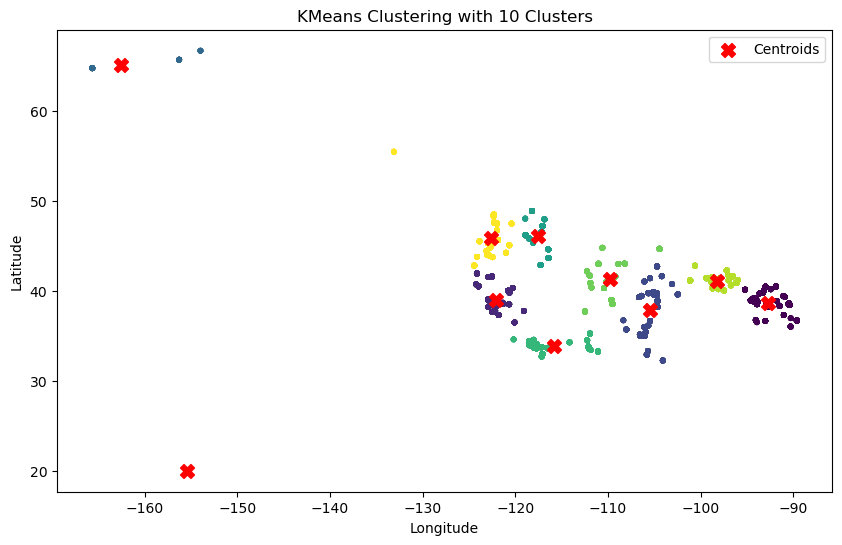

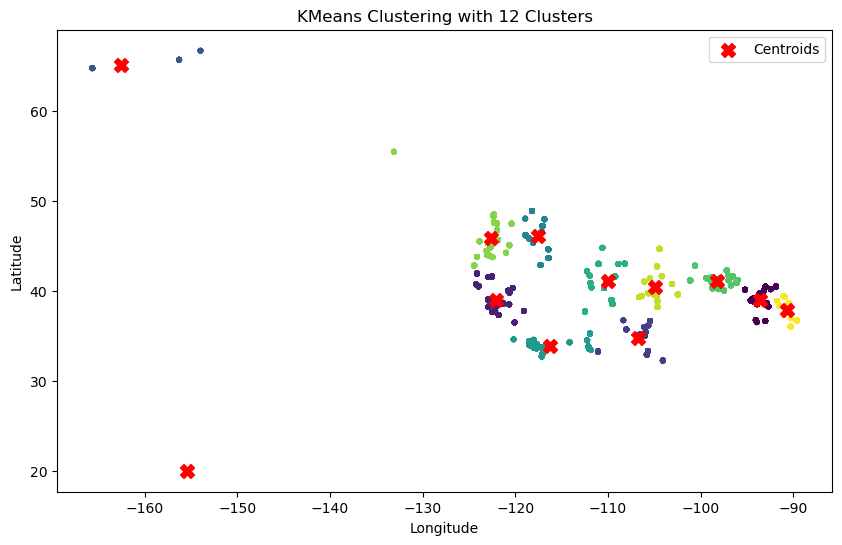

In [ ]:
# Mengambil data latitude (lat) dan longitude (long) dari X_train untuk clustering
data_cluster = X_train[['lat', 'long']]

# Melakukan clustering dengan KMeans menggunakan 10 cluster
kmeans_10 = KMeans(n_clusters=10, random_state=0)
labels_10 = kmeans_10.fit_predict(data_cluster)

# Memvisualisasikan hasil clustering dengan 10 cluster
plt.figure(figsize=(10, 6))
plt.scatter(data_cluster.iloc[:, 1], data_cluster.iloc[:, 0], c=labels_10, cmap='viridis', s=10)  # Plot data berdasarkan kluster
plt.scatter(kmeans_10.cluster_centers_[:, 1], kmeans_10.cluster_centers_[:, 0], color='red', marker='X', s=100, label='Centroids')  # Plot centroid
plt.title('KMeans Clustering with 10 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Melakukan clustering dengan KMeans menggunakan 12 cluster
kmeans_12 = KMeans(n_clusters=12, random_state=0)
labels_12 = kmeans_12.fit_predict(data_cluster)

# Memvisualisasikan hasil clustering dengan 12 cluster
plt.figure(figsize=(10, 6))
plt.scatter(data_cluster.iloc[:, 1], data_cluster.iloc[:, 0], c=labels_12, cmap='viridis', s=10)  # Plot data berdasarkan kluster
plt.scatter(kmeans_12.cluster_centers_[:, 1], kmeans_12.cluster_centers_[:, 0], color='red', marker='X', s=100, label='Centroids')  # Plot centroid
plt.title('KMeans Clustering with 12 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


##### Pemisahan Data dan Penentuan Fitur untuk Model Prediksi

Kode berikut ini digunakan untuk menyiapkan data latih dan data uji untuk model prediksi, dengan tahapan sebagai berikut:

1. **Memisahkan Variabel Independen (`X`) dan Target (`y`)**  
   - `X`: Variabel independen diperoleh dengan menghapus kolom `amt` (target) dan `is_fraud`, sehingga hanya menyisakan fitur-fitur yang relevan untuk prediksi.
   - `y`: Variabel target diatur sebagai kolom `amt`, yang akan diprediksi oleh model.

2. **Menentukan Fitur yang Akan Digunakan dalam Model**  
   Fitur-fitur yang relevan untuk model disimpan dalam variabel `feature_used`. Fitur ini mencakup informasi transaksi, kategori, dan data temporal.

3. **Pembagian Data Latih dan Uji**  
   Dataset dibagi menjadi dua bagian:
   - **Data latih** (80%) untuk melatih model,
   - **Data uji** (20%) untuk mengevaluasi kinerja model setelah pelatihan.
   
   Nilai `RANDOM_STATE` digunakan untuk menjaga konsistensi pembagian data pada setiap pengulangan kode.

4. **Menampilkan Informasi `X_train`**  
   Kode ini menampilkan informasi terkait `X_train`, termasuk tipe data, jumlah kolom, dan entri non-null pada setiap kolom, untuk memastikan bahwa data siap untuk tahap pelatihan model.

Langkah-langkah ini memastikan bahwa data yang digunakan terstruktur dengan baik dan hanya mencakup fitur-fitur yang relevan, sehingga mendukung prediksi yang lebih akurat.


In [ ]:
# Memisahkan data untuk variabel independen (X) dengan menghapus kolom 'amt' dan 'is_fraud',
# sehingga hanya menyisakan fitur yang relevan untuk prediksi.
X = data.drop(columns=['amt', 'is_fraud'])

# Menetapkan variabel target (y) sebagai kolom 'amt' untuk prediksi
y = data['amt']

# Menentukan fitur-fitur yang akan digunakan dalam model
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 
                'trans_month', 'trans_dayofweek', 'trans_dayofmonth', 'trans_dayofyear']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# RANDOM_STATE digunakan untuk menjaga konsistensi hasil pembagian data.
X_train, X_test, y_train, y_test = train_test_split(X[feature_used], y, test_size=0.2, random_state=RANDOM_STATE)

# Menampilkan informasi terkait X_train, seperti tipe data, jumlah kolom, dan data non-null pada setiap kolom.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   merchant          11506 non-null  category
 1   category          11506 non-null  category
 2   city              11506 non-null  category
 3   state             11506 non-null  category
 4   city_pop          11506 non-null  int64   
 5   job               11506 non-null  category
 6   trans_month       11506 non-null  category
 7   trans_dayofweek   11506 non-null  category
 8   trans_dayofmonth  11506 non-null  category
 9   trans_dayofyear   11506 non-null  category
dtypes: category(9), int64(1)
memory usage: 368.0 KB


##### Menambahkan Fitur Cluster Berdasarkan Clustering Geografis untuk Model

Kode berikut ini digunakan untuk melakukan clustering pada data latitude (`lat`) dan longitude (`long`), menambah hasil clustering sebagai fitur baru, dan mempersiapkan fitur yang akan digunakan dalam model pembelajaran mesin:

1. **Clustering Data Geografis (Latitude dan Longitude) dengan KMeans**  
   - Data latitude dan longitude diambil dari `X_train` untuk keperluan clustering.
   - Algoritma KMeans digunakan untuk membentuk 12 cluster, dengan hasil clustering disimpan dalam `labels_12`.

2. **Menambahkan Kolom `cluster_pembeli` ke `X_train` dan `X_test`**  
   - Hasil cluster dari data latih (`X_train`) disimpan sebagai kolom baru bernama `cluster_pembeli`.
   - Tipe data `cluster_pembeli` dikonversi menjadi kategori untuk menghemat memori dan memudahkan analisis.
   - Data uji (`X_test`) juga diprediksi clusternya menggunakan model KMeans yang sama, dan ditambahkan ke `X_test` sebagai kolom `cluster_pembeli` dengan tipe kategori.

3. **Menentukan Fitur yang Akan Digunakan dalam Model**  
   - `feature_used` mencakup fitur-fitur awal ditambah `cluster_pembeli` sebagai fitur baru, yang mewakili cluster geografis pembeli.

4. **Menampilkan Informasi `X_train` yang Telah Dimodifikasi**  
   - `X_train[feature_used].info()` digunakan untuk menampilkan informasi kolom dan tipe data pada `X_train`, termasuk kolom `cluster_pembeli` yang baru ditambahkan.

Proses ini mempersiapkan data latih dan data uji dengan fitur clustering tambahan, yang dapat membantu meningkatkan kinerja model dengan informasi geografis tambahan.


In [ ]:
# Mengambil data latitude (lat) dan longitude (long) dari X_train untuk keperluan clustering
data_cluster = X_train[['lat', 'long']]

# Melakukan clustering menggunakan KMeans dengan jumlah 12 cluster
kmeans_12 = KMeans(n_clusters=12, random_state=RANDOM_STATE)
labels_12 = kmeans_12.fit_predict(data_cluster)

# Menambahkan hasil cluster sebagai kolom baru 'cluster_pembeli' pada X_train
X_train['cluster_pembeli'] = labels_12
# Mengubah tipe data kolom 'cluster_pembeli' menjadi kategori
X_train['cluster_pembeli'] = X_train['cluster_pembeli'].astype('category')

# Melakukan prediksi cluster untuk data uji (X_test) berdasarkan model KMeans yang telah dilatih
X_test['cluster_pembeli'] = kmeans_12.predict(X_test[['lat', 'long']])
# Mengubah tipe data kolom 'cluster_pembeli' pada X_test menjadi kategori
X_test['cluster_pembeli'] = X_test['cluster_pembeli'].astype('category')

# Menentukan fitur yang akan digunakan dalam model, termasuk fitur cluster yang baru ditambahkan
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 
                'trans_month', 'trans_dayofweek', 'trans_dayofmonth', 'trans_dayofyear', 'cluster_pembeli']

# Menampilkan informasi terkait X_train, termasuk kolom baru 'cluster_pembeli'
X_train[feature_used].info()


<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   merchant          11506 non-null  category
 1   category          11506 non-null  category
 2   city              11506 non-null  category
 3   state             11506 non-null  category
 4   city_pop          11506 non-null  int64   
 5   job               11506 non-null  category
 6   trans_month       11506 non-null  category
 7   trans_dayofweek   11506 non-null  category
 8   trans_dayofmonth  11506 non-null  category
 9   trans_dayofyear   11506 non-null  category
 10  cluster_pembeli   11506 non-null  category
dtypes: category(10), int64(1)
memory usage: 379.5 KB


##### Pelatihan Model XGBoost dengan Penambahan Fitur Cluster

Kode berikut ini digunakan untuk melatih model XGBoost menggunakan parameter yang ditentukan dan fitur yang telah dipilih, termasuk fitur cluster geografis (`cluster_pembeli`). Langkah-langkah pelatihan meliputi:

1. **Menetapkan Parameter Model XGBoost**  
   - Parameter disimpan dalam variabel `params` dengan spesifikasi:
     - `objective`: Menggunakan `reg:absoluteerror` untuk regresi dengan error absolut sebagai fungsi objektif.
     - `learning_rate`: Mengatur kecepatan pembelajaran sebesar 0.01.
     - `random_state`: Menetapkan random state untuk menjaga konsistensi hasil.

2. **Membuat DMatrix untuk Data Latih dan Data Uji**  
   - `train_dm`: Data latih (`X_train` dan `y_train`) dikonversi menjadi format DMatrix, dengan `enable_categorical=True` agar mendukung fitur-fitur kategorikal.
   - `test_dm`: Data uji (`X_test` dan `y_test`) dikonversi ke format yang sama agar dapat digunakan dalam evaluasi model.

3. **Pelatihan Model XGBoost**  
   - Model dilatih dengan parameter yang telah ditentukan, dengan pengaturan tambahan:
     - `num_boost_round=10000`: Menetapkan jumlah maksimal iterasi boosting.
     - `evals`: Menggunakan data latih (`train`) dan data uji (`test`) untuk memantau kinerja model pada setiap iterasi.
     - `early_stopping_rounds=10`: Pelatihan berhenti lebih awal jika tidak ada peningkatan MAPE selama 10 iterasi berturut-turut.
     - `custom_metric=feval_mape`: Menggunakan MAPE sebagai metrik evaluasi khusus.
     - `maximize=False`: Optimisasi diatur untuk meminimalkan nilai MAPE.
     - `verbose_eval=100`: Hasil evaluasi dicetak setiap 100 iterasi untuk pemantauan kinerja model.

Tahap ini melatih model untuk menghasilkan prediksi dengan akurasi yang lebih baik melalui optimisasi nilai MAPE, menggunakan fitur-fitur prediksi yang mencakup informasi geografis.

###### Fitur yang Digunakan:
Pada eksperimen ini, fitur yang digunakan meliputi:
- `merchant`
- `category`
- `city`
- `state`
- `city_pop`
- `job`
- `trans_month`
- `trans_dayofweek`
- `trans_dayofmonth`
- `trans_dayofyear`
- `cluster_pembeli` (hasil clustering pembeli berdasarkan latitude dan longitude)

###### Hasil Pelatihan Model
Pada iterasi ke-152, model mencapai hasil sebagai berikut:
- **Data Latih**:
  - MAE: 58.08559
  - MAPE: 183.34041
- **Data Uji**:
  - MAE: 68.24170
  - MAPE: 238.09709

###### Kesimpulan Hasil Pemodelan dan Perbandingan dengan Eksperimen Sebelumnya
Penambahan fitur `cluster_pembeli` membantu meningkatkan akurasi model dengan memberikan informasi tambahan mengenai pola geografis dari data pembeli. Jika dibandingkan dengan **Eksperimen 2** (yang menggunakan fitur temporal dan kategori tanpa fitur cluster pembeli), berikut perbedaannya:
- **Eksperimen 2** menghasilkan MAE sebesar 70.38117 dan MAPE sebesar 248.71962 pada data uji.
- Pada eksperimen ini, dengan menambahkan fitur `cluster_pembeli`, MAE pada data uji berkurang menjadi 68.24170 dan MAPE menjadi 238.09709.

Penurunan nilai MAE dan MAPE ini menunjukkan bahwa penambahan fitur cluster memberikan kontribusi positif terhadap performa model. Penggunaan informasi geografis ini memungkinkan model untuk menangkap pola distribusi data pembeli, sehingga model menjadi lebih akurat dalam melakukan prediksi terhadap nilai target.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai fungsi objektif
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk menjaga konsistensi hasil
}

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost
# dengan enable_categorical=True untuk mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[feature_used], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[feature_used], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan parameter yang sudah ditentukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menyertakan data latih ('train') dan data uji ('test') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)


[0]	train-mae:102.86279	train-mape:345.44342	test-mae:106.73389	test-mape:347.39204
[100]	train-mae:68.71561	train-mape:218.63522	test-mae:76.34274	test-mape:255.35886
[152]	train-mae:58.08559	train-mape:183.34041	test-mae:68.24170	test-mape:238.09709


#### Eksperimen 4: Pelatihan Model XGBoost dengan Penambahan Fitur Cluster Lokasi Pembeli dan Penjual

Pada eksperimen ini, model XGBoost dilatih dengan fitur tambahan berupa informasi cluster lokasi merchant (`cluster_penjual`) di samping fitur `cluster_pembeli` yang telah digunakan dalam eksperimen sebelumnya. Tujuan dari eksperimen ini adalah untuk menguji apakah penambahan fitur `cluster_penjual` dapat memberikan informasi tambahan yang bermanfaat untuk meningkatkan akurasi model dalam mendeteksi transaksi fraud.

##### Perbedaan dan Improvisasi dari Eksperimen Sebelumnya
- **Penambahan Fitur `cluster_penjual`**: Selain `cluster_pembeli` yang mengelompokkan pembeli berdasarkan lokasi mereka, fitur baru `cluster_penjual` ditambahkan untuk mengelompokkan merchant atau penjual berdasarkan distribusi geografis. Ini bertujuan untuk menangkap pola transaksi yang mungkin dipengaruhi oleh lokasi merchant.
- **Tujuan**: Dengan menggunakan kedua fitur cluster lokasi (`cluster_pembeli` dan `cluster_penjual`), diharapkan model dapat memahami pola distribusi transaksi baik dari sisi pembeli maupun penjual, yang mungkin relevan dalam mendeteksi aktivitas yang mencurigakan atau fraud.

##### Hasil Eksperimen
- **Hasil Pelatihan Model**:
  - Pada iterasi ke-144, model mencapai hasil berikut:
    - **Data Latih**:
      - MAE: 59.46764
      - MAPE: 187.68169
    - **Data Uji**:
      - MAE: 69.43661
      - MAPE: 242.39683

##### Interpretasi Hasil Pemodelan
- **Efek Penambahan Fitur `cluster_penjual`**: 
  Hasil pada data uji menunjukkan bahwa penambahan `cluster_penjual` tidak memberikan perbaikan yang diharapkan dalam akurasi prediksi. MAE dan MAPE pada data uji justru sedikit meningkat dibandingkan dengan hasil dari **Eksperimen 3**, di mana hanya `cluster_pembeli` yang digunakan sebagai fitur tambahan:
  - **Eksperimen 3** mencapai MAE sebesar 68.24170 dan MAPE sebesar 238.09709 pada data uji.
  - Dalam eksperimen ini, dengan menambahkan `cluster_penjual`, MAE pada data uji meningkat menjadi 69.43661 dan MAPE menjadi 242.39683.

##### Kesimpulan
Penambahan fitur `cluster_penjual` tidak memberikan dampak positif yang signifikan terhadap performa model dalam mendeteksi transaksi fraud. Peningkatan nilai MAE dan MAPE pada data uji menunjukkan bahwa informasi tambahan dari lokasi penjual mungkin tidak relevan atau tidak memberikan kontribusi yang cukup signifikan untuk meningkatkan akurasi model. Hasil ini mengindikasikan bahwa dalam konteks deteksi fraud ini, informasi lokasi pembeli (`cluster_pembeli`) memiliki dampak yang lebih kuat dalam membantu model dibandingkan dengan informasi lokasi penjual. 

Eksperimen ini memberikan insight bahwa tidak semua informasi tambahan akan selalu meningkatkan performa model, terutama jika informasi tersebut kurang relevan dalam konteks analisis atau target yang diinginkan.


##### Pemrosesan Data Transaksi untuk Deteksi Fraud

Kode berikut bertujuan untuk memuat, membersihkan, dan mengonversi data transaksi sehingga siap untuk analisis deteksi fraud. Tahapan pemrosesan mencakup:

1. **Membaca Data dan Menghapus Duplikat**  
   - Data transaksi dibaca dari `FRAUD_DATA_PATH`.
   - Entri duplikat pada kolom `trans_num` dihapus untuk memastikan setiap transaksi memiliki nomor unik.

2. **Mengonversi Kolom Waktu ke Format `datetime`**  
   - Kolom `trans_date_trans_time` dan `dob` dikonversi ke tipe `datetime`, mempermudah analisis berbasis waktu dan ekstraksi informasi temporal.
   - Data kemudian diurutkan berdasarkan `trans_date_trans_time` untuk memastikan urutan waktu.

3. **Pembersihan dan Konversi Kolom `is_fraud` ke Tipe Kategori**  
   - Kolom `is_fraud` dibersihkan dari entri yang tidak sesuai dan dikonversi menjadi kategori, yang menghemat memori dan mempercepat analisis.

4. **Pembersihan dan Konversi Kolom Kategorikal Lainnya**  
   - Kolom `merchant` dan `job` dibersihkan dari tanda kutip, kemudian dikonversi menjadi tipe kategori bersama kolom lainnya, seperti `category`, `city`, `state`, dan `trans_num`, untuk optimasi memori.

5. **Ekstraksi Fitur Temporal untuk Analisis Waktu**  
   - Fitur-fitur tambahan diekstraksi dari `trans_date_trans_time`, yaitu:
     - `trans_month`: Bulan transaksi,
     - `trans_dayofweek`: Hari dalam minggu,
     - `trans_dayofmonth`: Hari dalam bulan,
     - `trans_dayofyear`: Hari dalam tahun.
   - Fitur-fitur ini dikonversi menjadi kategori untuk mengoptimalkan memori.

6. **Menampilkan Informasi Dataset**  
   - Setelah semua pemrosesan, `data.info()` digunakan untuk menampilkan ringkasan dataset, termasuk jumlah entri, tipe data, dan kolom-kolom yang telah dikonversi.

Langkah ini mempersiapkan data sehingga siap digunakan untuk analisis lanjutan atau untuk pelatihan model deteksi fraud.


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')            # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofmonth'] = data['trans_date_trans_time'].dt.day.astype('category')         # Hari dalam bulan
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menampilkan informasi dataset setelah semua pemrosesan tipe data selesai
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Memisahkan Variabel Independen dan Target serta Membagi Dataset

Kode berikut ini digunakan untuk mempersiapkan data untuk pelatihan model prediksi, dengan memisahkan variabel independen (`X`) dan variabel target (`y`), serta membagi dataset menjadi data latih dan uji:

1. **Memisahkan Variabel Independen (`X`) dan Target (`y`)**  
   - Variabel independen (`X`) disiapkan dengan menghapus kolom `amt` dan `is_fraud` dari dataset untuk menyisakan fitur-fitur yang relevan untuk prediksi.
   - Variabel target (`y`) ditetapkan sebagai kolom `amt`, yang merupakan nilai yang akan diprediksi oleh model.

2. **Pembagian Data Latih dan Uji**  
   - Dataset dibagi menjadi dua bagian: data latih (80%) untuk melatih model dan data uji (20%) untuk mengevaluasi kinerja model setelah pelatihan.
   - Parameter `RANDOM_STATE` digunakan untuk memastikan konsistensi hasil pembagian data, sehingga pembagian tetap sama di setiap pengulangan kode.

Langkah ini memastikan bahwa data siap digunakan untuk pelatihan model, dengan fitur-fitur prediktif yang terpisah dari target dan dengan pembagian yang seimbang antara data latih dan data uji.


In [ ]:
# Memisahkan variabel independen (X) dengan menghapus kolom 'amt' dan 'is_fraud'
# sehingga hanya menyisakan fitur-fitur yang akan digunakan untuk prediksi.
X = data.drop(columns=['amt', 'is_fraud'])

# Menetapkan variabel target (y) sebagai kolom 'amt' yang akan diprediksi
y = data['amt']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# RANDOM_STATE digunakan untuk menjaga konsistensi hasil pembagian data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

##### Clustering Lokasi Merchant Berdasarkan Latitude dan Longitude

Kode ini bertujuan untuk melakukan clustering pada data lokasi merchant (latitude dan longitude) dalam `X_train` menggunakan algoritma KMeans. Clustering ini membantu mengidentifikasi pola geografis distribusi merchant, yang nantinya dapat menjadi fitur tambahan dalam pemodelan.

###### Tahapan Clustering:
1. **Mempersiapkan Data untuk Clustering**  
   - Kolom `merch_lat` dan `merch_long` dari `X_train` diambil dan disimpan dalam `data_cluster` sebagai basis data untuk proses clustering.

2. **Melakukan Clustering dengan KMeans (14 Cluster)**  
   - Algoritma KMeans diterapkan pada `data_cluster` dengan `n_clusters=14`, sehingga menghasilkan 14 cluster untuk membagi lokasi merchant berdasarkan distribusi geografis.
   - Hasil clustering disimpan dalam `labels_14`, yang berisi label cluster untuk setiap titik data.

3. **Visualisasi Hasil Clustering**  
   - Visualisasi menampilkan distribusi geografis merchant berdasarkan cluster yang dihasilkan.
   - Setiap titik warna menunjukkan cluster yang berbeda, dan tanda 'X' merah menandai titik centroid masing-masing cluster.

###### Interpretasi Output:
Pada visualisasi di atas, setiap warna mewakili cluster yang berbeda, menunjukkan bagaimana lokasi merchant dikelompokkan berdasarkan kedekatan geografis. Dengan menggunakan 14 cluster, kita dapat melihat variasi distribusi merchant di berbagai area geografis dengan lebih detail. Cluster di area yang lebih padat memiliki variasi yang lebih tinggi, sementara cluster di lokasi lebih terpencil memiliki kepadatan yang lebih rendah.

###### Alasan Pemilihan 14 Cluster:
Pemilihan jumlah cluster ini bertujuan untuk menjaga variasi dalam data dan meminimalkan hilangnya informasi penting. Dengan menggunakan 14 cluster, model diharapkan mampu menangkap pola distribusi geografis yang lebih akurat, terutama di area dengan kepadatan tinggi. Penggunaan jumlah cluster yang lebih sedikit mungkin akan menyederhanakan pola, tetapi juga berisiko menghilangkan informasi penting dalam distribusi merchant.

Cluster geografis ini nantinya dapat digunakan sebagai fitur tambahan untuk meningkatkan akurasi model dalam menganalisis data berbasis lokasi.


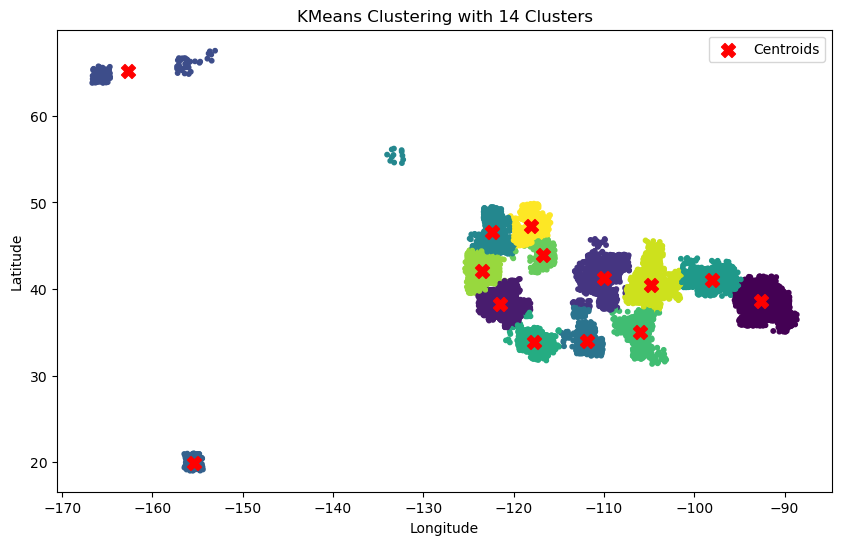

In [ ]:
# Mengambil data latitude dan longitude dari lokasi merchant pada X_train untuk proses clustering
data_cluster = X_train[['merch_lat', 'merch_long']]

# Melakukan clustering menggunakan KMeans dengan jumlah 14 cluster
kmeans_14 = KMeans(n_clusters=14, random_state=0)
labels_14 = kmeans_14.fit_predict(data_cluster)

# Memvisualisasikan hasil clustering dengan 14 cluster
plt.figure(figsize=(10, 6))
plt.scatter(data_cluster.iloc[:, 1], data_cluster.iloc[:, 0], c=labels_14, cmap='viridis', s=10)  # Plot data berdasarkan kluster
plt.scatter(kmeans_14.cluster_centers_[:, 1], kmeans_14.cluster_centers_[:, 0], color='red', marker='X', s=100, label='Centroids')  # Plot centroid
plt.title('KMeans Clustering with 14 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


##### Clustering Lokasi Pembeli dan Penjual serta Penambahan Fitur Cluster ke Dataset

Kode berikut ini digunakan untuk melakukan clustering pada data lokasi pembeli dan penjual, menambah hasil clustering sebagai fitur baru pada `X_train` dan `X_test`, serta mempersiapkan fitur yang akan digunakan dalam model pembelajaran mesin:

1. **Clustering Lokasi Pembeli**  
   - Data latitude (`lat`) dan longitude (`long`) dari `X_train` digunakan untuk membuat 12 cluster pembeli menggunakan KMeans.
   - Hasil clustering disimpan sebagai kolom baru bernama `cluster_pembeli` di `X_train`, dan dikonversi ke tipe kategori untuk efisiensi memori.
   - Data uji (`X_test`) juga mendapatkan prediksi cluster pembeli berdasarkan model KMeans yang dilatih pada data latih, dengan hasilnya disimpan di kolom `cluster_pembeli` pada `X_test`.

2. **Clustering Lokasi Penjual**  
   - Data latitude dan longitude penjual (`merch_lat` dan `merch_long`) digunakan untuk membuat 14 cluster penjual menggunakan KMeans.
   - Hasil clustering disimpan dalam kolom baru bernama `cluster_penjual` di `X_train` dan dikonversi ke tipe kategori.
   - Data uji (`X_test`) juga mendapatkan prediksi cluster penjual, yang kemudian disimpan dalam kolom `cluster_penjual` pada `X_test`.

3. **Menentukan Fitur yang Digunakan dalam Model**  
   - Variabel `feature_used` menyimpan daftar fitur yang akan digunakan dalam model, termasuk fitur-fitur awal dan fitur cluster `cluster_pembeli` dan `cluster_penjual`.

4. **Menampilkan Informasi `X_train`**  
   - Informasi lengkap mengenai `X_train` ditampilkan, termasuk kolom baru `cluster_pembeli` dan `cluster_penjual`.

Penambahan fitur cluster ini bertujuan untuk memberikan informasi lokasi tambahan dalam model, yang mungkin membantu meningkatkan kinerja prediksi.


In [ ]:
# Melakukan clustering untuk lokasi pembeli berdasarkan latitude (lat) dan longitude (long)
data_cluster = X_train[['lat', 'long']]
kmeans_12 = KMeans(n_clusters=12, random_state=RANDOM_STATE)
labels_12 = kmeans_12.fit_predict(data_cluster)

# Melakukan clustering untuk lokasi penjual berdasarkan latitude dan longitude penjual (merch_lat, merch_long)
data_cluster = X_train[['merch_lat', 'merch_long']]
kmeans_14 = KMeans(n_clusters=14, random_state=0)
labels_14 = kmeans_14.fit_predict(data_cluster)

# Menambahkan hasil clustering pembeli sebagai kolom baru 'cluster_pembeli' pada X_train
X_train['cluster_pembeli'] = labels_12
# Mengubah tipe data kolom 'cluster_pembeli' menjadi kategori
X_train['cluster_pembeli'] = X_train['cluster_pembeli'].astype('category')

# Melakukan prediksi cluster pembeli untuk data uji (X_test) dan menambahkan hasilnya sebagai kolom 'cluster_pembeli'
X_test['cluster_pembeli'] = kmeans_12.predict(X_test[['lat', 'long']])
X_test['cluster_pembeli'] = X_test['cluster_pembeli'].astype('category')

# Menambahkan hasil clustering penjual sebagai kolom baru 'cluster_penjual' pada X_train
X_train['cluster_penjual'] = labels_14
# Mengubah tipe data kolom 'cluster_penjual' menjadi kategori
X_train['cluster_penjual'] = X_train['cluster_penjual'].astype('category')

# Melakukan prediksi cluster penjual untuk data uji (X_test) dan menambahkan hasilnya sebagai kolom 'cluster_penjual'
X_test['cluster_penjual'] = kmeans_14.predict(X_test[['merch_lat', 'merch_long']])
X_test['cluster_penjual'] = X_test['cluster_penjual'].astype('category')

# Menentukan fitur yang akan digunakan dalam model, termasuk fitur cluster untuk pembeli dan penjual
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 
                'trans_month', 'trans_dayofweek', 'trans_dayofmonth', 'trans_dayofyear', 
                'cluster_pembeli', 'cluster_penjual']

# Menampilkan informasi terkait X_train, termasuk kolom 'cluster_pembeli' dan 'cluster_penjual' yang baru
X_train[feature_used].info()


<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   merchant          11506 non-null  category
 1   category          11506 non-null  category
 2   city              11506 non-null  category
 3   state             11506 non-null  category
 4   city_pop          11506 non-null  int64   
 5   job               11506 non-null  category
 6   trans_month       11506 non-null  category
 7   trans_dayofweek   11506 non-null  category
 8   trans_dayofmonth  11506 non-null  category
 9   trans_dayofyear   11506 non-null  category
 10  cluster_pembeli   11506 non-null  category
 11  cluster_penjual   11506 non-null  category
dtypes: category(11), int64(1)
memory usage: 391.3 KB


##### Pelatihan Model XGBoost dengan Fitur Cluster Lokasi

Kode berikut ini digunakan untuk melatih model XGBoost menggunakan fitur yang telah dipilih, termasuk fitur cluster untuk lokasi pembeli (`cluster_pembeli`) dan penjual (`cluster_penjual`). Langkah-langkah utama dalam pelatihan model adalah sebagai berikut:

1. **Menetapkan Parameter Model XGBoost**  
   - Parameter yang digunakan dalam model meliputi:
     - `objective`: `reg:absoluteerror`, yang menggunakan regresi dengan error absolut sebagai fungsi objektif.
     - `learning_rate`: Diatur pada 0.01 untuk mengontrol kecepatan pembelajaran.
     - `random_state`: Menjaga konsistensi hasil pada setiap pengulangan kode.

2. **Mengonversi Data Latih dan Data Uji ke Format DMatrix**  
   - Data latih (`X_train` dan `y_train`) dan data uji (`X_test` dan `y_test`) dikonversi ke format DMatrix, yang merupakan format khusus untuk XGBoost.
   - Parameter `enable_categorical=True` digunakan untuk mendukung data kategorikal dalam pemodelan.

3. **Pelatihan Model XGBoost**  
   - Model dilatih menggunakan parameter yang ditentukan dengan pengaturan tambahan:
     - `num_boost_round=10000`: Jumlah maksimal iterasi boosting.
     - `evals`: Data latih (`train`) dan data uji (`test`) digunakan untuk memantau kinerja model selama pelatihan.
     - `early_stopping_rounds=10`: Menghentikan pelatihan lebih awal jika MAPE tidak meningkat selama 10 iterasi berturut-turut.
     - `custom_metric=feval_mape`: Menggunakan Mean Absolute Percentage Error (MAPE) sebagai metrik evaluasi khusus.
     - `maximize=False`: Menetapkan optimisasi untuk meminimalkan nilai MAPE.
     - `verbose_eval=100`: Hasil evaluasi dicetak setiap 100 iterasi untuk pemantauan.

Langkah ini bertujuan untuk melatih model agar menghasilkan prediksi yang optimal berdasarkan fitur-fitur yang relevan, termasuk informasi cluster geografis dari pembeli dan penjual.

###### Fitur yang Digunakan:
Pada eksperimen ini, fitur yang digunakan dalam model meliputi:
- `merchant`, `category`, `city`, `state`, `city_pop`, `job`  
- Fitur temporal: `trans_month`, `trans_dayofweek`, `trans_dayofmonth`, `trans_dayofyear`
- Fitur cluster geografis: `cluster_pembeli` dan `cluster_penjual`

###### Hasil Pelatihan Model:
Pada iterasi ke-144, model mencapai hasil sebagai berikut:
- **Data Latih**:
  - MAE: 59.46764
  - MAPE: 187.68169
- **Data Uji**:
  - MAE: 69.43661
  - MAPE: 242.39683

###### Interpretasi Hasil Pemodelan:
Menambahkan fitur `cluster_penjual` untuk lokasi merchant tidak memberikan perbaikan yang diharapkan. Jika dibandingkan dengan **Eksperimen 3** yang hanya menggunakan `cluster_pembeli`, hasil pada data uji menunjukkan bahwa MAE dan MAPE justru mengalami sedikit peningkatan:
- **Eksperimen 3** menghasilkan MAE sebesar 68.24170 dan MAPE sebesar 238.09709 pada data uji.
- Pada eksperimen ini, dengan penambahan `cluster_penjual`, MAE pada data uji meningkat menjadi 69.43661 dan MAPE menjadi 242.39683.

Peningkatan nilai MAE dan MAPE ini menunjukkan bahwa penambahan fitur `cluster_penjual` tidak memberikan dampak yang positif pada kinerja model untuk prediksi target dalam eksperimen ini. Hal ini mengindikasikan bahwa informasi tambahan dari `cluster_penjual` mungkin tidak memberikan kontribusi yang signifikan dalam membantu model memahami pola transaksi lebih baik dibandingkan dengan hanya menggunakan `cluster_pembeli`.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai fungsi objektif
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk menjaga konsistensi hasil
}

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost,
# dengan enable_categorical=True untuk mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[feature_used], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[feature_used], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan parameter yang sudah ditentukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menyertakan data latih ('train') dan data uji ('test') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)


[0]	train-mae:102.86279	train-mape:345.44342	test-mae:106.73389	test-mape:347.39204
[100]	train-mae:68.87470	train-mape:218.94529	test-mae:76.76793	test-mape:258.20952
[144]	train-mae:59.46764	train-mape:187.68169	test-mae:69.43661	test-mape:242.39683


#### Eksperimen 5: Pelatihan Model XGBoost dengan Penambahan Fitur Cluster dan Jarak Geografis

Pada eksperimen ini, model XGBoost dilatih menggunakan fitur-fitur yang mencakup informasi cluster lokasi pembeli (`cluster_pembeli`), cluster lokasi penjual (`cluster_penjual`), serta jarak geografis antara pembeli dan penjual (`distance_km`). Penambahan fitur `distance_km` bertujuan untuk melihat apakah jarak antar lokasi mempengaruhi pola transaksi yang dapat digunakan untuk mendeteksi aktivitas fraud.

##### Perbedaan dan Improvisasi dari Eksperimen Sebelumnya
- **Penambahan Fitur `distance_km`**: Selain dua fitur cluster lokasi yang telah digunakan pada Eksperimen 4, fitur `distance_km` ditambahkan sebagai informasi jarak antara pembeli dan penjual. Hal ini diharapkan dapat memberikan informasi tambahan terkait seberapa jauh jarak antar lokasi memengaruhi pola prediksi target.
- **Tujuan**: Dengan menambahkan `distance_km`, diharapkan model mampu menangkap pola hubungan jarak antar lokasi dan aktivitas transaksi yang lebih baik.

##### Hasil Eksperimen
- **Hasil Pelatihan Model**:
  - Pada iterasi ke-141, model mencapai hasil berikut:
    - **Data Latih**:
      - MAE: 60.15538
      - MAPE: 191.56785
    - **Data Uji**:
      - MAE: 70.84117
      - MAPE: 255.20275

##### Interpretasi Hasil Pemodelan
- **Efek Penambahan Fitur `distance_km`**: 
  Hasil pada data uji menunjukkan bahwa penambahan `distance_km` tidak memberikan peningkatan akurasi yang diharapkan. Bahkan, nilai MAE dan MAPE pada data uji mengalami sedikit peningkatan dibandingkan dengan hasil dari **Eksperimen 4** yang hanya menggunakan `cluster_pembeli` dan `cluster_penjual` sebagai fitur tambahan:
  - **Eksperimen 4** mencapai MAE sebesar 69.43661 dan MAPE sebesar 242.39683 pada data uji.
  - Pada eksperimen ini, dengan penambahan `distance_km`, MAE pada data uji meningkat menjadi 70.84117 dan MAPE menjadi 255.20275.

##### Kesimpulan
Penambahan fitur `distance_km` tidak memberikan kontribusi positif terhadap kinerja model dalam mendeteksi pola transaksi untuk prediksi target. Peningkatan nilai MAE dan MAPE pada data uji menunjukkan bahwa jarak geografis antara pembeli dan penjual mungkin tidak memiliki pengaruh signifikan dalam konteks deteksi transaksi fraud di dataset ini. 

Hasil ini mengindikasikan bahwa, meskipun `distance_km` memberikan informasi tambahan, fitur ini tidak relevan atau cukup signifikan untuk meningkatkan performa model dalam prediksi target. Eksperimen ini menunjukkan pentingnya mengevaluasi setiap fitur tambahan, karena tidak semua fitur geografis atau jarak memberikan kontribusi yang bermanfaat bagi model.


##### Fungsi Haversine untuk Menghitung Jarak Geografis Antara Dua Titik

Fungsi `haversine` berikut ini digunakan untuk menghitung jarak antara dua titik di permukaan bumi berdasarkan koordinat latitude dan longitude menggunakan rumus Haversine. Jarak ini diukur dalam kilometer.

###### Parameter:
- `row`: Objek `Series` atau dictionary-like yang berisi koordinat dua titik (misalnya, lokasi pembeli dan lokasi penjual), dengan nama kolom `lat`, `long` untuk titik pertama dan `merch_lat`, `merch_long` untuk titik kedua.

###### Proses Penghitungan:
1. **Konstanta Jari-jari Bumi**  
   - `R` ditetapkan sebagai 6371.0 km, yang merupakan rata-rata jari-jari bumi.

2. **Konversi Koordinat ke Radian**  
   - Latitude dan longitude dari kedua titik dikonversi dari derajat ke radian, yang diperlukan dalam penghitungan trigonometri Haversine.

3. **Menghitung Perbedaan Latitude dan Longitude**  
   - Menghitung perbedaan koordinat (`dlat` dan `dlon`) antara kedua titik.

4. **Mengaplikasikan Rumus Haversine**  
   - Rumus Haversine diterapkan untuk menghitung jarak sudut antara dua titik di permukaan bola.

5. **Menghitung Jarak Akhir dalam Kilometer**  
   - Jarak sudut kemudian dikalikan dengan jari-jari bumi untuk mendapatkan jarak linear dalam kilometer.

###### Return:
- `distance`: Mengembalikan jarak antara dua titik dalam kilometer.

Fungsi ini cocok untuk menghitung jarak lintas permukaan bumi, misalnya untuk menentukan jarak antara lokasi pembeli dan penjual dalam analisis geografis.


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(row):
    """
    Menghitung jarak Haversine antara dua titik di permukaan bumi.

    Parameter
    ---------
    row : Series atau dictionary-like
        Baris data yang berisi koordinat latitude dan longitude
        untuk dua titik (misalnya lokasi pembeli dan penjual).

    Returns
    -------
    distance : float
        Jarak antara dua titik dalam kilometer.
    """
    R = 6371.0  # Jari-jari bumi dalam kilometer
    
    # Mengonversi latitude dan longitude dari derajat ke radian untuk titik pertama (lat1, lon1)
    lat1, lon1 = radians(row['lat']), radians(row['long'])
    # Mengonversi latitude dan longitude dari derajat ke radian untuk titik kedua (lat2, lon2)
    lat2, lon2 = radians(row['merch_lat']), radians(row['merch_long'])
    
    # Menghitung perbedaan latitude dan longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Menghitung rumus Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Menghitung jarak akhir dalam kilometer
    distance = R * c
    return distance


##### Pemrosesan Data Transaksi dan Perhitungan Jarak Geografis Menggunakan Fungsi Haversine

Kode berikut digunakan untuk memuat, membersihkan, dan memproses data transaksi, serta menghitung jarak geografis antara pembeli dan penjual dengan fungsi Haversine. Berikut adalah langkah-langkah utamanya:

1. **Membaca Data dan Menghapus Duplikat**  
   - Data dibaca dari `FRAUD_DATA_PATH`, dan entri duplikat dihapus berdasarkan kolom `trans_num` untuk menjaga setiap transaksi bersifat unik.

2. **Mengonversi Kolom Waktu ke Format `datetime`**  
   - Kolom `trans_date_trans_time` dan `dob` dikonversi ke tipe `datetime` untuk mempermudah analisis waktu. Data kemudian diurutkan berdasarkan `trans_date_trans_time`.

3. **Pembersihan dan Konversi Kolom `is_fraud`**  
   - Kolom `is_fraud` dibersihkan dari data yang tidak sesuai dan dikonversi menjadi tipe kategori untuk optimasi memori.

4. **Pembersihan dan Konversi Kolom Kategorikal Lainnya**  
   - Kolom `merchant` dan `job` dibersihkan dari karakter yang tidak perlu (tanda kutip) dan dikonversi ke tipe kategori.
   - Kolom lainnya, seperti `category`, `city`, `state`, dan `trans_num`, juga dikonversi menjadi tipe kategori.

5. **Ekstraksi Fitur Temporal**  
   - Dari `trans_date_trans_time`, beberapa kolom waktu tambahan dibuat:
     - `trans_month`: Bulan transaksi.
     - `trans_dayofweek`: Hari dalam minggu.
     - `trans_dayofmonth`: Hari dalam bulan.
     - `trans_dayofyear`: Hari dalam tahun.

6. **Menghitung Jarak Geografis Menggunakan Fungsi Haversine**  
   - Menggunakan fungsi `haversine`, jarak antara dua titik geografis (lokasi pembeli dan penjual) dihitung dalam kilometer dan disimpan sebagai kolom `distance_km`.

7. **Menampilkan Informasi Dataset**  
   - Setelah semua pemrosesan selesai, `data.info()` digunakan untuk menampilkan tipe data, jumlah entri, dan status setiap kolom.

Langkah-langkah ini memastikan dataset lengkap dan siap digunakan dalam analisis lanjutan atau pemodelan deteksi fraud dengan informasi tambahan berupa jarak geografis antara pembeli dan penjual.


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')            # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofmonth'] = data['trans_date_trans_time'].dt.day.astype('category')         # Hari dalam bulan
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menghitung jarak antara dua titik geografis menggunakan fungsi Haversine dan menambahkannya sebagai kolom 'distance_km'
data['distance_km'] = data.apply(haversine, axis=1)

# Menampilkan informasi dataset setelah semua pemrosesan tipe data selesai
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Memisahkan Variabel Independen dan Target serta Membagi Dataset untuk Pelatihan

Kode berikut ini digunakan untuk mempersiapkan data untuk pelatihan model prediksi dengan memisahkan variabel independen (`X`) dan variabel target (`y`), serta membagi dataset menjadi data latih dan data uji:

1. **Memisahkan Variabel Independen (`X`) dan Target (`y`)**  
   - `X`: Variabel independen disiapkan dengan menghapus kolom `amt` dan `is_fraud` dari dataset, sehingga hanya menyisakan fitur-fitur yang akan digunakan untuk prediksi.
   - `y`: Variabel target ditetapkan sebagai kolom `amt`, yang merupakan nilai transaksi yang akan diprediksi oleh model.

2. **Pembagian Data Latih dan Uji**  
   - Dataset dibagi menjadi dua bagian:
     - Data latih (80%) digunakan untuk melatih model.
     - Data uji (20%) digunakan untuk mengevaluasi kinerja model setelah pelatihan.
   - `RANDOM_STATE` digunakan untuk memastikan hasil pembagian data tetap konsisten pada setiap pengulangan, sehingga memudahkan reproduksi hasil.

Tahapan ini memastikan bahwa data siap digunakan untuk pelatihan model dengan fitur-fitur prediktif yang terpisah dari target, serta pembagian yang proporsional antara data latih dan uji.


In [ ]:
# Memisahkan variabel independen (X) dengan menghapus kolom 'amt' dan 'is_fraud'
# sehingga hanya menyisakan fitur-fitur yang akan digunakan untuk prediksi.
X = data.drop(columns=['amt', 'is_fraud'])

# Menetapkan variabel target (y) sebagai kolom 'amt' yang akan diprediksi
y = data['amt']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# RANDOM_STATE digunakan untuk menjaga konsistensi hasil pembagian data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

##### Clustering Lokasi Pembeli dan Penjual serta Penambahan Fitur Cluster dan Jarak ke Dataset

Kode berikut ini digunakan untuk melakukan clustering pada data lokasi pembeli dan penjual, menambah hasil clustering sebagai fitur baru pada `X_train` dan `X_test`, serta menambahkan kolom jarak geografis (`distance_km`). Langkah-langkah utama yang dilakukan adalah:

1. **Clustering Lokasi Pembeli**  
   - Data latitude (`lat`) dan longitude (`long`) dari `X_train` digunakan untuk membuat 12 cluster pembeli menggunakan KMeans.
   - Hasil clustering disimpan sebagai kolom baru bernama `cluster_pembeli` di `X_train`, dan dikonversi ke tipe kategori.
   - Data uji (`X_test`) juga mendapatkan prediksi cluster pembeli dari model KMeans yang sama, dengan hasilnya disimpan di kolom `cluster_pembeli` pada `X_test`.

2. **Clustering Lokasi Penjual**  
   - Data latitude dan longitude penjual (`merch_lat` dan `merch_long`) digunakan untuk membuat 14 cluster penjual.
   - Hasil clustering disimpan sebagai kolom `cluster_penjual` di `X_train` dan dikonversi ke tipe kategori.
   - Data uji (`X_test`) juga mendapatkan prediksi cluster penjual, yang disimpan di kolom `cluster_penjual`.

3. **Menambahkan Fitur yang Akan Digunakan dalam Model**  
   - Variabel `feature_used` menentukan fitur yang akan digunakan dalam model, termasuk fitur awal, `cluster_pembeli`, `cluster_penjual`, dan `distance_km` (jarak antara lokasi pembeli dan penjual).

4. **Menampilkan Informasi `X_train` dengan Fitur Baru**  
   - Informasi mengenai `X_train`, termasuk kolom `cluster_pembeli` dan `cluster_penjual`, ditampilkan untuk memastikan tipe data sudah benar dan data siap untuk model pembelajaran mesin.

Penambahan fitur cluster dan jarak geografis ini diharapkan dapat memberikan informasi tambahan dalam model, yang dapat membantu meningkatkan kinerja prediksi.


In [ ]:
# Melakukan clustering untuk lokasi pembeli berdasarkan latitude (lat) dan longitude (long)
data_cluster = X_train[['lat', 'long']]
kmeans_12 = KMeans(n_clusters=12, random_state=RANDOM_STATE)
labels_12 = kmeans_12.fit_predict(data_cluster)

# Melakukan clustering untuk lokasi penjual berdasarkan latitude dan longitude penjual (merch_lat, merch_long)
data_cluster = X_train[['merch_lat', 'merch_long']]
kmeans_14 = KMeans(n_clusters=14, random_state=0)
labels_14 = kmeans_14.fit_predict(data_cluster)

# Menambahkan hasil clustering pembeli sebagai kolom baru 'cluster_pembeli' pada X_train
X_train['cluster_pembeli'] = labels_12
# Mengubah tipe data kolom 'cluster_pembeli' menjadi kategori
X_train['cluster_pembeli'] = X_train['cluster_pembeli'].astype('category')

# Melakukan prediksi cluster pembeli untuk data uji (X_test) dan menambahkan hasilnya sebagai kolom 'cluster_pembeli'
X_test['cluster_pembeli'] = kmeans_12.predict(X_test[['lat', 'long']])
X_test['cluster_pembeli'] = X_test['cluster_pembeli'].astype('category')

# Menambahkan hasil clustering penjual sebagai kolom baru 'cluster_penjual' pada X_train
X_train['cluster_penjual'] = labels_14
# Mengubah tipe data kolom 'cluster_penjual' menjadi kategori
X_train['cluster_penjual'] = X_train['cluster_penjual'].astype('category')

# Melakukan prediksi cluster penjual untuk data uji (X_test) dan menambahkan hasilnya sebagai kolom 'cluster_penjual'
X_test['cluster_penjual'] = kmeans_14.predict(X_test[['merch_lat', 'merch_long']])
X_test['cluster_penjual'] = X_test['cluster_penjual'].astype('category')

# Menentukan fitur yang akan digunakan dalam model, termasuk fitur cluster dan jarak antar lokasi
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 
                'trans_month', 'trans_dayofweek', 'trans_dayofmonth', 'trans_dayofyear', 
                'cluster_pembeli', 'cluster_penjual', 'distance_km']


# Menampilkan informasi terkait X_train, termasuk kolom 'cluster_pembeli' dan 'cluster_penjual' yang baru
X_train[feature_used].info()


<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   merchant          11506 non-null  category
 1   category          11506 non-null  category
 2   city              11506 non-null  category
 3   state             11506 non-null  category
 4   city_pop          11506 non-null  int64   
 5   job               11506 non-null  category
 6   trans_month       11506 non-null  category
 7   trans_dayofweek   11506 non-null  category
 8   trans_dayofmonth  11506 non-null  category
 9   trans_dayofyear   11506 non-null  category
 10  cluster_pembeli   11506 non-null  category
 11  cluster_penjual   11506 non-null  category
 12  distance_km       11506 non-null  float64 
dtypes: category(11), float64(1), int64(1)
memory usage: 481.1 KB


##### Pelatihan Model XGBoost dengan Fitur Cluster dan Jarak Geografis

Kode berikut ini digunakan untuk melatih model XGBoost dengan fitur yang mencakup informasi cluster lokasi pembeli (`cluster_pembeli`), cluster lokasi penjual (`cluster_penjual`), serta jarak geografis (`distance_km`) antara pembeli dan penjual. Langkah-langkah utama yang dilakukan adalah sebagai berikut:

1. **Menetapkan Parameter Model XGBoost**  
   - Parameter yang digunakan dalam model meliputi:
     - `objective`: `reg:absoluteerror`, menggunakan regresi dengan error absolut sebagai fungsi objektif.
     - `learning_rate`: Diatur sebesar 0.01 untuk mengontrol kecepatan pembelajaran.
     - `random_state`: Menetapkan nilai acak agar hasil konsisten pada setiap pengulangan.

2. **Mengonversi Data Latih dan Data Uji ke Format DMatrix**  
   - Data latih (`X_train` dan `y_train`) dan data uji (`X_test` dan `y_test`) dikonversi ke format DMatrix khusus untuk XGBoost.
   - Parameter `enable_categorical=True` diterapkan untuk mendukung pemodelan dengan data kategorikal.

3. **Pelatihan Model XGBoost**  
   - Model dilatih menggunakan parameter yang telah ditentukan dengan pengaturan tambahan:
     - `num_boost_round=10000`: Jumlah maksimal iterasi boosting.
     - `evals`: Memantau kinerja model selama pelatihan dengan data latih (`train`) dan data uji (`test`).
     - `early_stopping_rounds=10`: Menghentikan pelatihan lebih awal jika MAPE tidak meningkat dalam 10 iterasi berturut-turut.
     - `custom_metric=feval_mape`: Menggunakan Mean Absolute Percentage Error (MAPE) sebagai metrik evaluasi khusus.
     - `maximize=False`: Optimisasi diatur untuk meminimalkan nilai MAPE.
     - `verbose_eval=100`: Menampilkan hasil evaluasi setiap 100 iterasi untuk pemantauan.

Langkah ini dilakukan untuk menghasilkan model yang optimal dalam prediksi target, dengan penambahan fitur jarak geografis antara lokasi pembeli dan penjual sebagai informasi tambahan.

###### Fitur yang Digunakan
Pada eksperimen ini, fitur-fitur yang digunakan dalam model adalah:
- **Informasi transaksi**: `merchant`, `category`, `city`, `state`, `city_pop`, `job`
- **Fitur temporal**: `trans_month`, `trans_dayofweek`, `trans_dayofmonth`, `trans_dayofyear`
- **Fitur tambahan**: `cluster_pembeli`, `cluster_penjual`, dan `distance_km`

###### Hasil Pelatihan Model
Pada iterasi ke-141, model mencapai hasil berikut:
- **Data Latih**:
  - MAE: 60.15538
  - MAPE: 191.56785
- **Data Uji**:
  - MAE: 70.84117
  - MAPE: 255.20275

###### Interpretasi Hasil Pemodelan
Menambahkan fitur `distance_km` sebagai jarak antara lokasi pembeli dan penjual tidak memberikan perbaikan kinerja yang diharapkan. Hasil data uji menunjukkan bahwa MAE dan MAPE justru mengalami peningkatan dibandingkan dengan **Eksperimen 4**, yang hanya menggunakan `cluster_pembeli` dan `cluster_penjual` sebagai fitur tambahan:
- **Eksperimen 4** menghasilkan MAE sebesar 69.43661 dan MAPE sebesar 242.39683 pada data uji.
- Pada eksperimen ini, dengan penambahan `distance_km`, MAE meningkat menjadi 70.84117 dan MAPE menjadi 255.20275.

Peningkatan nilai MAE dan MAPE pada data uji ini menunjukkan bahwa penambahan fitur `distance_km` tidak memberikan kontribusi yang signifikan pada kinerja model. Hal ini mengindikasikan bahwa jarak geografis mungkin tidak memengaruhi pola transaksi secara signifikan dalam konteks dataset ini, dan fitur `distance_km` tidak relevan untuk meningkatkan akurasi model dalam mendeteksi transaksi.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai fungsi objektif
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk menjaga konsistensi hasil
}

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost
# dengan enable_categorical=True untuk mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[feature_used], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[feature_used], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan parameter yang sudah ditentukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menyertakan data latih ('train') dan data uji ('test') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)


[0]	train-mae:102.86225	train-mape:345.44520	test-mae:106.73451	test-mape:347.39156
[100]	train-mae:69.84626	train-mape:222.39049	test-mae:78.74625	test-mape:271.57576
[141]	train-mae:60.15538	train-mape:191.56785	test-mae:70.84117	test-mape:255.20275


#### Eksperimen 6: Optimasi Model XGBoost dengan Hyperparameter Tuning Menggunakan Optuna

Pada eksperimen ini, model XGBoost dilatih dengan menggunakan hyperparameter terbaik yang diperoleh melalui proses tuning menggunakan Optuna. Tujuan dari eksperimen ini adalah untuk meningkatkan akurasi prediksi model dengan meminimalkan nilai Mean Absolute Percentage Error (MAPE) pada data uji, dibandingkan dengan eksperimen sebelumnya.

##### Perbedaan dan Improvisasi dari Eksperimen Sebelumnya
- **Hyperparameter Tuning dengan Optuna**: 
  Berbeda dari eksperimen sebelumnya yang menggunakan parameter default atau parameter dasar, eksperimen ini memanfaatkan Optuna untuk menemukan kombinasi hyperparameter optimal. Parameter yang dioptimasi meliputi `max_depth`, `min_child_weight`, `gamma`, `subsample`, `colsample_bytree`, `reg_alpha`, dan `reg_lambda`.
- **Pemilihan Fitur Terbaik**:
  Eksperimen ini menggunakan lima fitur terpenting yang telah diidentifikasi pada analisis SHAP sebelumnya, yaitu `trans_dayofyear`, `category`, `merchant`, `city`, dan `job`. Pemilihan fitur ini bertujuan untuk fokus pada variabel yang paling berkontribusi dalam prediksi dan untuk mengurangi kompleksitas model.

##### Hasil Eksperimen
- **Hasil Optimasi Hyperparameter dengan Optuna**: 
  Hyperparameter tuning berhasil menurunkan nilai MAPE dari 239% menjadi 183.59% pada data uji, memberikan peningkatan akurasi sebesar 55.41%. 
- **Hasil Pelatihan Model dengan Hyperparameter Terbaik**:
  - Pada iterasi ke-387, model mencapai MAE sebesar 52.82790 dan MAPE sebesar 185.28% pada data uji.
  - Penurunan MAPE secara signifikan menunjukkan bahwa tuning hyperparameter memberikan dampak positif pada kinerja model dalam hal akurasi.

##### Kesimpulan
Eksperimen ini menunjukkan bahwa proses optimasi hyperparameter menggunakan Optuna dapat secara signifikan meningkatkan kinerja model XGBoost dalam memprediksi target. Dengan kombinasi hyperparameter optimal, model lebih mampu menangkap pola dalam data dan menghasilkan prediksi yang lebih akurat. Ini menegaskan pentingnya tuning hyperparameter dalam memaksimalkan performa model, khususnya untuk model XGBoost yang sensitif terhadap konfigurasi hyperparameter.

Eksperimen ini juga menyoroti bahwa fokus pada fitur-fitur utama yang telah diidentifikasi melalui analisis SHAP mampu meningkatkan efisiensi model tanpa mengorbankan akurasi. Hasil ini menunjukkan bahwa pendekatan ini dapat diandalkan untuk tugas deteksi fraud yang memerlukan akurasi tinggi.


##### Pembersihan dan Pemrosesan Data Transaksi untuk Analisis Lanjutan

Kode berikut ini digunakan untuk membaca, membersihkan, dan memproses data transaksi dari `FRAUD_DATA_PATH` sehingga data siap untuk analisis dan model prediksi. Langkah-langkah utama yang dilakukan adalah sebagai berikut:

1. **Membaca Data dan Menghapus Duplikat**  
   - Data transaksi dibaca dari `FRAUD_DATA_PATH`, dan duplikat dihapus berdasarkan kolom `trans_num` untuk memastikan setiap transaksi unik.

2. **Konversi Kolom Waktu ke Format `datetime`**  
   - Kolom `trans_date_trans_time` dan `dob` dikonversi ke tipe `datetime`, yang mempermudah analisis berbasis waktu.
   - Data kemudian diurutkan berdasarkan `trans_date_trans_time` untuk menjaga urutan transaksi.

3. **Pembersihan dan Konversi Kolom `is_fraud` ke Tipe Kategori**  
   - Kolom `is_fraud` dibersihkan dari nilai yang tidak sesuai dan diubah menjadi tipe kategori untuk optimasi memori dan analisis kategorikal.

4. **Pembersihan dan Konversi Kolom Kategorikal Lainnya**  
   - Kolom `merchant` dan `job` dibersihkan dari karakter yang tidak diinginkan (seperti tanda kutip) dan diubah menjadi tipe kategori.
   - Kolom lainnya, seperti `category`, `city`, `state`, dan `trans_num`, juga dikonversi menjadi kategori untuk mengoptimalkan memori dan memperjelas tipe data.

5. **Ekstraksi Fitur Temporal untuk Analisis Waktu**  
   - Beberapa fitur tambahan diekstraksi dari `trans_date_trans_time`:
     - `trans_month`: Menunjukkan bulan transaksi.
     - `trans_dayofweek`: Menunjukkan hari dalam minggu.
     - `trans_dayofmonth`: Menunjukkan hari dalam bulan.
     - `trans_dayofyear`: Menunjukkan hari dalam tahun.
   - Setiap kolom dikonversi menjadi tipe kategori untuk efisiensi memori.

6. **Menampilkan Informasi Dataset**  
   - Setelah semua pemrosesan selesai, `data.info()` digunakan untuk memberikan ringkasan dataset, termasuk jumlah entri, tipe data, dan kolom-kolom yang baru ditambahkan.

Proses ini memastikan bahwa dataset telah melalui pembersihan dan pemrosesan yang sesuai sehingga siap digunakan dalam analisis lanjutan atau pelatihan model prediksi.


In [ ]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan kolom 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya entri pertama

# Mengonversi kolom waktu transaksi dan tanggal lahir menjadi tipe datetime untuk mempermudah analisis waktu
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah 'trans_date_trans_time' ke tipe datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah 'dob' ke datetime, 'coerce' menangani kesalahan konversi
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Membersihkan dan mengonversi kolom 'is_fraud' menjadi kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan data dan ubah tipe ke kategori

# Membersihkan data di kolom 'merchant' dan 'job' dari tanda kutip, kemudian mengonversinya ke tipe kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi beberapa kolom lainnya menjadi tipe kategori untuk mengoptimalkan memori dan memperjelas tipe data
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')

# Menambahkan kolom waktu transaksi baru untuk analisis temporal, dengan tipe kategori
data['trans_month'] = data['trans_date_trans_time'].dt.month.astype('category')            # Bulan transaksi
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
data['trans_dayofmonth'] = data['trans_date_trans_time'].dt.day.astype('category')         # Hari dalam bulan
data['trans_dayofyear'] = data['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun

# Menampilkan informasi dataset setelah semua pemrosesan tipe data selesai
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

##### Memisahkan Variabel Independen dan Target serta Membagi Dataset untuk Pelatihan

Kode berikut digunakan untuk menyiapkan data untuk model prediksi dengan cara memisahkan variabel independen (`X`) dan variabel target (`y`), serta membagi dataset menjadi data latih dan data uji:

1. **Memisahkan Variabel Independen (`X`) dan Target (`y`)**  
   - `X`: Variabel independen diperoleh dengan menghapus kolom `amt` dan `is_fraud` dari dataset sehingga hanya menyisakan fitur-fitur yang relevan untuk prediksi.
   - `y`: Variabel target ditetapkan sebagai kolom `amt`, yang akan diprediksi oleh model.

2. **Pembagian Dataset Menjadi Data Latih dan Data Uji**  
   - Dataset dibagi menjadi dua bagian:
     - Data latih (80%) digunakan untuk melatih model.
     - Data uji (20%) digunakan untuk mengevaluasi kinerja model setelah pelatihan.
   - `RANDOM_STATE` digunakan untuk memastikan pembagian data konsisten di setiap pengulangan kode, sehingga hasil dapat direproduksi.

Tahap ini mempersiapkan data untuk pelatihan model dengan pembagian proporsional antara data latih dan data uji serta pemisahan fitur prediktif dari target.


In [ ]:
# Memisahkan variabel independen (X) dengan menghapus kolom 'amt' dan 'is_fraud'
# sehingga hanya menyisakan fitur-fitur yang akan digunakan untuk prediksi.
X = data.drop(columns=['amt', 'is_fraud'])

# Menetapkan variabel target (y) sebagai kolom 'amt' yang akan diprediksi
y = data['amt']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# dengan proporsi 80% untuk data latih dan 20% untuk data uji.
# RANDOM_STATE digunakan untuk menjaga konsistensi hasil pembagian data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)


##### Clustering Lokasi Pembeli dan Penjual serta Penambahan Fitur Cluster ke Dataset

Kode berikut ini digunakan untuk melakukan clustering pada data lokasi pembeli dan penjual, serta menambahkan hasil clustering sebagai fitur baru di dataset `X_train` dan `X_test`:

1. **Clustering Lokasi Pembeli**  
   - Data latitude (`lat`) dan longitude (`long`) dari `X_train` digunakan untuk membuat 12 cluster pembeli menggunakan KMeans.
   - Hasil clustering disimpan sebagai kolom baru `cluster_pembeli` pada `X_train`, dan dikonversi ke tipe kategori.
   - Untuk data uji (`X_test`), prediksi cluster dilakukan berdasarkan model KMeans yang sama, dan hasilnya disimpan di kolom `cluster_pembeli` pada `X_test`.

2. **Clustering Lokasi Penjual**  
   - Data latitude (`merch_lat`) dan longitude (`merch_long`) dari `X_train` digunakan untuk membuat 14 cluster penjual menggunakan KMeans.
   - Hasil clustering disimpan sebagai kolom `cluster_penjual` di `X_train` dan dikonversi ke tipe kategori.
   - Untuk data uji (`X_test`), prediksi cluster penjual dilakukan dengan model yang sama, dan hasilnya disimpan di kolom `cluster_penjual`.

3. **Menampilkan Informasi Dataset**  
   - `X_train.info()` digunakan untuk menampilkan ringkasan `X_train`, termasuk kolom baru `cluster_pembeli` dan `cluster_penjual`.

Penambahan fitur cluster ini bertujuan untuk memberikan informasi lokasi tambahan dalam model, yang dapat membantu dalam meningkatkan kinerja prediksi dengan menambahkan konteks geografis pembeli dan penjual.


In [ ]:
# Melakukan clustering untuk lokasi pembeli berdasarkan latitude (lat) dan longitude (long)
data_cluster = X_train[['lat', 'long']]
kmeans_12 = KMeans(n_clusters=12, random_state=RANDOM_STATE)
labels_12 = kmeans_12.fit_predict(data_cluster)

# Melakukan clustering untuk lokasi penjual berdasarkan latitude dan longitude penjual (merch_lat, merch_long)
data_cluster = X_train[['merch_lat', 'merch_long']]
kmeans_14 = KMeans(n_clusters=14, random_state=0)
labels_14 = kmeans_14.fit_predict(data_cluster)

# Menambahkan hasil clustering pembeli sebagai kolom baru 'cluster_pembeli' pada X_train
X_train['cluster_pembeli'] = labels_12
X_train['cluster_pembeli'] = X_train['cluster_pembeli'].astype('category')

# Melakukan prediksi cluster pembeli untuk data uji (X_test) dan menambahkan hasilnya sebagai kolom 'cluster_pembeli'
X_test['cluster_pembeli'] = kmeans_12.predict(X_test[['lat', 'long']])
X_test['cluster_pembeli'] = X_test['cluster_pembeli'].astype('category')

# Menambahkan hasil clustering penjual sebagai kolom baru 'cluster_penjual' pada X_train
X_train['cluster_penjual'] = labels_14
X_train['cluster_penjual'] = X_train['cluster_penjual'].astype('category')

# Melakukan prediksi cluster penjual untuk data uji (X_test) dan menambahkan hasilnya sebagai kolom 'cluster_penjual'
X_test['cluster_penjual'] = kmeans_14.predict(X_test[['merch_lat', 'merch_long']])
X_test['cluster_penjual'] = X_test['cluster_penjual'].astype('category')

# Menampilkan informasi terkait X_train, termasuk kolom 'cluster_pembeli' dan 'cluster_penjual' yang baru
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11506 entries, 13943 to 11274
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  11506 non-null  datetime64[ns]
 1   merchant               11506 non-null  category      
 2   category               11506 non-null  category      
 3   city                   11506 non-null  category      
 4   state                  11506 non-null  category      
 5   lat                    11506 non-null  float64       
 6   long                   11506 non-null  float64       
 7   city_pop               11506 non-null  int64         
 8   job                    11506 non-null  category      
 9   dob                    11506 non-null  datetime64[ns]
 10  trans_num              11506 non-null  category      
 11  merch_lat              11506 non-null  float64       
 12  merch_long             11506 non-null  float64       
 13  tr

##### Pelatihan Model XGBoost dengan Fitur Cluster Lokasi Pembeli dan Penjual

Kode berikut ini digunakan untuk melatih model XGBoost dengan fitur-fitur prediktif yang dipilih, termasuk fitur cluster lokasi pembeli (`cluster_pembeli`) dan penjual (`cluster_penjual`). Berikut adalah rincian langkah-langkahnya:

1. **Menetapkan Parameter Model XGBoost**  
   - Parameter disimpan dalam variabel `params` dengan spesifikasi:
     - `objective`: Menggunakan `reg:absoluteerror` sebagai fungsi objektif untuk regresi dengan error absolut.
     - `learning_rate`: Diatur pada 0.01 untuk mengatur kecepatan pembelajaran model.
     - `random_state`: Menetapkan random state untuk menjaga konsistensi hasil model pada setiap pengulangan.

2. **Menentukan Fitur yang Akan Digunakan dalam Model**  
   - Fitur-fitur yang digunakan dalam model disimpan dalam variabel `feature_used`, yang meliputi:
     - Fitur kategori seperti `merchant`, `category`, `city`, dan `state`.
     - Fitur waktu (`trans_month`, `trans_dayofweek`, dll.).
     - Fitur tambahan `cluster_pembeli` dan `cluster_penjual`.

3. **Mengonversi Data Latih dan Uji ke Format DMatrix untuk XGBoost**  
   - Data latih dan data uji dikonversi ke format DMatrix dengan `enable_categorical=True` untuk mendukung fitur kategorikal.

4. **Pelatihan Model XGBoost**  
   - Model dilatih dengan parameter dan pengaturan tambahan berikut:
     - `num_boost_round=10000`: Menetapkan jumlah maksimum iterasi boosting.
     - `evals`: Menyertakan data latih (`train`) dan data uji (`test`) untuk memantau kinerja model.
     - `early_stopping_rounds=10`: Menghentikan pelatihan lebih awal jika MAPE tidak mengalami peningkatan selama 10 iterasi berturut-turut.
     - `custom_metric=feval_mape`: Menggunakan MAPE sebagai custom metric untuk memantau error absolut dalam bentuk persentase.
     - `maximize=False`: Menetapkan optimisasi untuk meminimalkan nilai MAPE.
     - `verbose_eval=100`: Menampilkan hasil evaluasi setiap 100 iterasi untuk memantau perkembangan model.

Proses ini melatih model dengan menggunakan informasi tambahan dari cluster lokasi, yang dapat membantu meningkatkan akurasi prediksi melalui pemanfaatan pola geografis dalam data.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai fungsi objektif
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk menjaga konsistensi hasil
}

# Menentukan fitur yang akan digunakan dalam model, termasuk fitur cluster untuk pembeli dan penjual
feature_used = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 
                'trans_month', 'trans_dayofweek', 'trans_dayofmonth', 'trans_dayofyear', 
                'cluster_pembeli', 'cluster_penjual']

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost
# dengan enable_categorical=True untuk mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[feature_used], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[feature_used], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan parameter yang sudah ditentukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menyertakan data latih ('train') dan data uji ('test') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)


[0]	train-mae:102.86279	train-mape:345.44342	test-mae:106.73389	test-mape:347.39204


[100]	train-mae:68.87470	train-mape:218.94529	test-mae:76.76793	test-mape:258.20952
[145]	train-mae:59.25835	train-mape:187.18758	test-mae:69.27292	test-mape:242.40263


##### Interpretasi Model XGBoost dengan SHAP (SHapley Additive exPlanations)

Kode berikut ini digunakan untuk menganalisis kontribusi setiap fitur dalam model XGBoost yang telah dilatih dengan menggunakan SHAP, yang memberikan interpretasi lokal maupun global mengenai pengaruh setiap fitur:

1. **Membuat Objek `TreeExplainer` untuk Model XGBoost**  
   - Objek `TreeExplainer` dibuat menggunakan model XGBoost yang telah dilatih (`bst`). `TreeExplainer` berfungsi untuk menghitung nilai SHAP, yang mengukur dampak setiap fitur pada prediksi model.

2. **Menghitung Nilai SHAP untuk Data Uji (`test_dm`)**  
   - Nilai SHAP dihitung untuk data uji (`test_dm`) untuk memahami kontribusi fitur pada prediksi di data tersebut. Setiap nilai SHAP menunjukkan seberapa besar pengaruh setiap fitur dalam meningkatkan atau menurunkan prediksi.

3. **Membuat Summary Plot Nilai SHAP**  
   - Summary plot digunakan untuk menggambarkan pentingnya setiap fitur dalam model secara keseluruhan:
     - `plot_type='bar'` menampilkan fitur dalam urutan berdasarkan dampak kumulatifnya, dengan fitur yang paling penting ditempatkan di bagian atas.
     - Plot ini memberikan pandangan global tentang fitur mana yang memiliki pengaruh terbesar pada prediksi model.

###### Interpretasi Output
Berdasarkan summary plot di atas, lima fitur dengan dampak terbesar pada prediksi model adalah sebagai berikut:
- `trans_dayofyear`
- `category`
- `merchant`
- `city`
- `job`

Fitur `trans_dayofyear` memiliki dampak terbesar, menunjukkan bahwa waktu dalam setahun saat transaksi dilakukan adalah variabel yang sangat signifikan dalam mempengaruhi hasil prediksi. Fitur `category` dan `merchant` juga memberikan kontribusi besar, yang menunjukkan bahwa tipe transaksi dan identitas merchant penting dalam memprediksi target. Fitur `city` dan `job` menambahkan informasi kontekstual tambahan, namun dengan dampak yang lebih kecil.

###### Fitur yang Digunakan untuk Pemodelan Final dan Hyperparameter Tuning
Berdasarkan hasil analisis ini, lima fitur terpenting (`trans_dayofyear`, `category`, `merchant`, `city`, dan `job`) akan digunakan dalam pemodelan final dan hyperparameter tuning. Pemilihan fitur ini bertujuan untuk meningkatkan efisiensi model dengan fokus pada variabel yang paling berkontribusi, sehingga diharapkan menghasilkan model yang lebih akurat dan optimal.


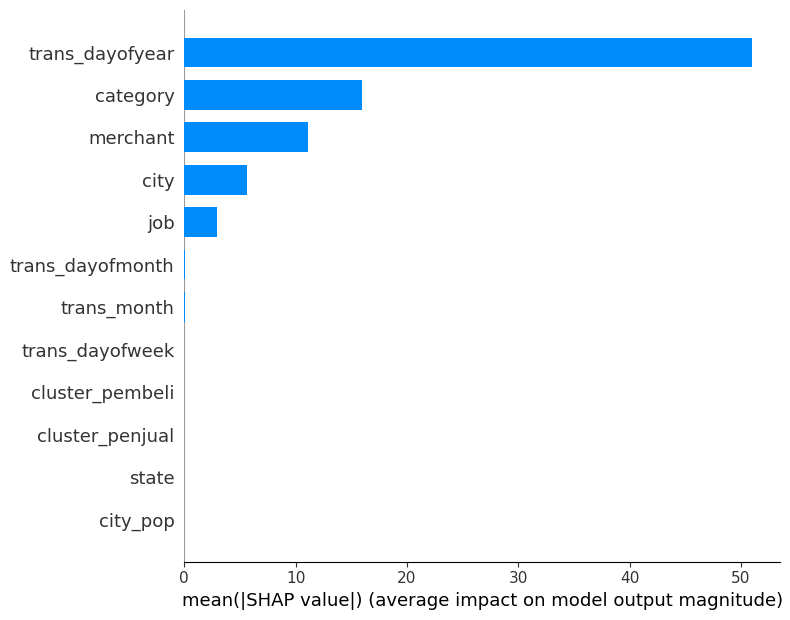

In [ ]:
# Membuat objek TreeExplainer untuk model XGBoost yang telah dilatih (bst)
explainer = shap.TreeExplainer(bst)

# Menghitung nilai SHAP untuk data uji (test_dm) untuk mendapatkan interpretasi setiap fitur
shap_values = explainer(test_dm)

# Membuat plot ringkasan (summary plot) dari nilai SHAP untuk menggambarkan pentingnya setiap fitur
# plot_type='bar' digunakan untuk menunjukkan fitur mana yang memiliki dampak terbesar dalam model secara keseluruhan
shap.summary_plot(shap_values, X_test[feature_used], plot_type='bar')


##### Pelatihan Model XGBoost dengan Subset Fitur Terpilih

Kode berikut digunakan untuk melatih model XGBoost dengan subset fitur yang dipilih untuk meningkatkan efisiensi model dan fokus pada fitur yang paling relevan. Berikut adalah langkah-langkahnya:

1. **Menetapkan Parameter Model XGBoost**  
   - Parameter untuk model XGBoost ditetapkan dalam `params` dengan rincian sebagai berikut:
     - `objective`: Menggunakan `reg:absoluteerror` untuk regresi dengan error absolut sebagai fungsi objektif.
     - `learning_rate`: Diatur pada 0.01 untuk mengontrol kecepatan pembelajaran model.
     - `random_state`: Menetapkan random state untuk menjaga konsistensi hasil.

2. **Memilih Fitur untuk Model**  
   - Fitur yang dipilih (`selected_features`) untuk pelatihan dan evaluasi meliputi: `trans_dayofyear`, `category`, `merchant`, `city`, dan `job`. Fitur ini dipilih karena dianggap memiliki relevansi yang lebih tinggi.

3. **Mengonversi Data Latih dan Data Uji ke Format DMatrix**  
   - Data latih (`X_train`) dan data uji (`X_test`) dengan fitur yang dipilih dikonversi ke format DMatrix untuk XGBoost dengan `enable_categorical=True` untuk mendukung fitur kategorikal.

4. **Pelatihan Model XGBoost**  
   - Model dilatih dengan parameter yang telah ditetapkan dan pengaturan berikut:
     - `num_boost_round=10000`: Menetapkan jumlah maksimal iterasi boosting.
     - `evals`: Menyertakan data latih (`train`) dan data uji (`test`) untuk memantau kinerja model selama pelatihan.
     - `early_stopping_rounds=10`: Menghentikan pelatihan lebih awal jika MAPE tidak meningkat dalam 10 iterasi berturut-turut.
     - `custom_metric=feval_mape`: Menggunakan Mean Absolute Percentage Error (MAPE) sebagai metrik khusus.
     - `maximize=False`: Menetapkan tujuan untuk meminimalkan MAPE.
     - `verbose_eval=100`: Menampilkan hasil evaluasi setiap 100 iterasi untuk memantau kinerja.

Dengan menggunakan subset fitur ini, model diharapkan dapat mempertahankan atau meningkatkan kinerja dengan menggunakan informasi yang lebih terfokus, yang dapat mengurangi kompleksitas dan waktu pelatihan.


In [ ]:
# Menetapkan parameter untuk model XGBoost
params = {
    'objective': 'reg:absoluteerror',  # Menggunakan regresi dengan error absolut sebagai fungsi objektif
    'learning_rate': 0.01,             # Menentukan learning rate sebesar 0.01
    'random_state': RANDOM_STATE       # Menetapkan random state untuk menjaga konsistensi hasil
}

# Memilih fitur yang akan digunakan dalam model untuk pelatihan dan evaluasi
selected_features = ['trans_dayofyear', 'category', 'merchant', 'city', 'job']

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost
# dengan enable_categorical=True untuk mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[selected_features], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[selected_features], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan parameter yang sudah ditentukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menyertakan data latih ('train') dan data uji ('test') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(params, train_dm, num_boost_round=10000, evals=[(train_dm, 'train'), (test_dm, 'test')],
                early_stopping_rounds=10, custom_metric=feval_mape, maximize=False, verbose_eval=100)

[0]	train-mae:102.86279	train-MAPE:345.44342	test-mae:106.73125	test-MAPE:347.38686


[100]	train-mae:68.52835	train-MAPE:217.69319	test-mae:76.33069	test-MAPE:254.45743
[140]	train-mae:59.97595	train-MAPE:189.03579	test-mae:69.68628	test-MAPE:239.37182


##### Optimasi Hyperparameter Model XGBoost Menggunakan Optuna untuk Metrik MAPE

Kode berikut ini menggunakan pustaka Optuna untuk mengoptimalkan hyperparameter model XGBoost dengan tujuan meminimalkan Mean Absolute Percentage Error (MAPE). Berikut adalah langkah-langkah utamanya:

1. **Menetapkan Nilai `RANDOM_STATE` dan Fungsi Evaluasi MAPE**  
   - `RANDOM_STATE` ditetapkan untuk menjaga konsistensi hasil.
   - Fungsi `feval_mape` didefinisikan untuk menghitung MAPE pada setiap iterasi, yang digunakan sebagai metrik kustom dalam pelatihan model.

2. **Fungsi `objective` untuk Optuna**  
   - Fungsi `objective` digunakan untuk menentukan parameter hyperparameter yang akan dioptimalkan oleh Optuna:
     - `max_depth`, `min_child_weight`, `gamma`, `subsample`, `colsample_bytree`, `reg_alpha`, dan `reg_lambda` merupakan hyperparameter yang dicari oleh Optuna dengan bantuan `trial.suggest_*`.
   - Data latih (`train_dm`) dan data uji (`test_dm`) dikonversi ke format DMatrix.
   - Model dilatih dengan parameter yang dioptimalkan untuk 10,000 iterasi atau berhenti lebih awal jika MAPE tidak meningkat dalam 10 iterasi.
   - Nilai MAPE terbaik disimpan dalam variabel `best_mape`.

3. **Menjalankan Proses Optimasi dengan Optuna**  
   - Sampler `TPESampler` dibuat untuk menjaga konsistensi hasil.
   - `study.optimize` menjalankan optimasi hyperparameter pada `objective` dengan 100 percobaan (`n_trials=100`).

4. **Menampilkan Hasil Trial Terbaik**  
   - Setelah proses optimasi selesai, trial terbaik ditampilkan dengan nilai MAPE terbaik dan daftar hyperparameter yang menghasilkan kinerja optimal.

Proses optimasi ini bertujuan untuk menemukan kombinasi hyperparameter yang meminimalkan MAPE pada data uji, sehingga model dapat menghasilkan prediksi dengan error yang lebih rendah.

###### Interpretasi Output
Hasil optimasi menunjukkan bahwa hyperparameter tuning berhasil menurunkan nilai MAPE dari 239% menjadi 183.59% pada data uji. Ini merupakan peningkatan akurasi sebesar 55.41% (dihitung sebagai ((239 - 183.59) / 239) * 100%). Hyperparameter terbaik yang ditemukan melalui proses tuning adalah sebagai berikut:

- **max_depth**: 4
- **min_child_weight**: 6
- **gamma**: 2.134
- **subsample**: 0.992
- **colsample_bytree**: 0.887
- **reg_alpha**: 0.042
- **reg_lambda**: 6.73e-5

Penurunan MAPE ini menunjukkan bahwa dengan menggunakan kombinasi hyperparameter yang optimal, model XGBoost dapat memberikan prediksi yang lebih akurat. Proses tuning hyperparameter ini memberikan kontribusi signifikan dalam meningkatkan performa model, sehingga dapat diimplementasikan dalam aplikasi deteksi fraud yang lebih handal.


In [ ]:
# Tetapkan nilai RANDOM_STATE
RANDOM_STATE = 42

# Definisikan fungsi evaluasi MAPE untuk model XGBoost
def feval_mape(preds, dtrain):
    labels = dtrain.get_label()
    mape = np.mean(np.abs((labels - preds) / labels)) * 100
    return 'MAPE', mape

# Definisikan fungsi objektif untuk Optuna
def objective(trial):
    # Set parameter hyperparameter yang akan dioptimasi oleh Optuna
    params = {
        'objective': 'reg:absoluteerror',
        'learning_rate': 0.01,
        'random_state': RANDOM_STATE,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
    }

    # Memilih fitur yang akan digunakan dalam model untuk pelatihan dan evaluasi
    selected_features = ['trans_dayofyear', 'category', 'merchant', 'city', 'job']

    # Siapkan DMatrix untuk data latih dan uji
    train_dm = xgb.DMatrix(X_train[selected_features], label=y_train, enable_categorical=True)
    test_dm = xgb.DMatrix(X_test[selected_features], label=y_test, enable_categorical=True)

    # Latih model dengan hyperparameter yang dioptimasi
    evals_result = {}
    bst = xgb.train(
        params,
        train_dm,
        num_boost_round=10000,
        evals=[(test_dm, 'validation')],
        early_stopping_rounds=10,
        custom_metric=feval_mape,
        maximize=False,
        evals_result=evals_result,
        verbose_eval=False
    )

    # Ambil nilai MAPE terbaik dari hasil evaluasi
    best_mape = bst.best_score

    return best_mape

# Buat sampler dengan RANDOM_STATE untuk menjaga konsistensi hasil
sampler = optuna.samplers.TPESampler(seed=RANDOM_STATE)

# Buat studi Optuna dengan sampler yang telah ditentukan dan jalankan optimisasi
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=100)

# Tampilkan hasil terbaik
print('Best trial:')
trial = study.best_trial

print('  MAPE Terbaik: {}'.format(trial.value))
print('  Hyperparameter Terbaik:')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2024-11-13 23:07:38,852] A new study created in memory with name: no-name-f318403e-5543-4629-8e0e-3bf4d5c74b8b
[I 2024-11-13 23:07:41,480] Trial 0 finished with value: 204.193878 and parameters: {'max_depth': 5, 'min_child_weight': 10, 'gamma': 3.6599697090570253, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05}. Best is trial 0 with value: 204.193878.
[I 2024-11-13 23:07:44,003] Trial 1 finished with value: 234.780145 and parameters: {'max_depth': 9, 'min_child_weight': 7, 'gamma': 3.540362888980227, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'reg_alpha': 0.9877700294007907, 'reg_lambda': 0.00018794668241638458}. Best is trial 0 with value: 204.193878.
[I 2024-11-13 23:07:46,287] Trial 2 finished with value: 217.317748 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'gamma': 1.5212112147976886, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7

Best trial:
  MAPE Terbaik: 183.589542
  Hyperparameter Terbaik:
    max_depth: 4
    min_child_weight: 6
    gamma: 2.1343501360955686
    subsample: 0.9918094552619318
    colsample_bytree: 0.8869254822613658
    reg_alpha: 0.04203243584422819
    reg_lambda: 6.733994454410114e-05


##### Melatih Model XGBoost dengan Hyperparameter Terbaik dari Hasil Optimasi Optuna

Kode berikut ini menggunakan hyperparameter terbaik yang telah ditemukan melalui proses optimasi Optuna untuk melatih model XGBoost. Berikut adalah langkah-langkah yang dilakukan:

1. **Menetapkan Hyperparameter Terbaik**  
   - Hyperparameter terbaik disimpan dalam `best_params`, yang mencakup parameter seperti `max_depth`, `min_child_weight`, `gamma`, `subsample`, `colsample_bytree`, `reg_alpha`, dan `reg_lambda`. Parameter ini dipilih untuk meminimalkan nilai MAPE berdasarkan hasil optimasi.

2. **Memilih Fitur yang Akan Digunakan dalam Model**  
   - `selected_features` menetapkan fitur yang akan digunakan dalam pelatihan dan evaluasi, yaitu `trans_dayofyear`, `category`, `merchant`, `city`, dan `job`.

3. **Mengonversi Data Latih dan Uji ke Format DMatrix**  
   - Data latih (`X_train`) dan data uji (`X_test`) dengan fitur yang dipilih dikonversi ke dalam format DMatrix, yang merupakan format khusus untuk XGBoost dan mendukung penggunaan fitur kategorikal (`enable_categorical=True`).

4. **Melatih Model XGBoost dengan Hyperparameter Terbaik**  
   - Model dilatih menggunakan parameter yang telah dioptimalkan dan pengaturan berikut:
     - `num_boost_round=10000`: Menetapkan jumlah maksimal iterasi boosting.
     - `evals`: Menggunakan data uji (`validation`) untuk memantau kinerja model pada setiap iterasi.
     - `early_stopping_rounds=10`: Menghentikan pelatihan lebih awal jika MAPE tidak mengalami peningkatan dalam 10 iterasi berturut-turut.
     - `custom_metric=feval_mape`: Menggunakan MAPE sebagai metrik kustom untuk memantau akurasi model.
     - `maximize=False`: Menetapkan optimisasi untuk meminimalkan nilai MAPE.
     - `verbose_eval=100`: Menampilkan hasil evaluasi setiap 100 iterasi untuk memantau perkembangan kinerja model.

Pelatihan model ini diharapkan menghasilkan prediksi yang lebih akurat dengan error yang lebih rendah, karena menggunakan hyperparameter yang telah dioptimalkan untuk MAPE.

###### Hasil Pelatihan Model
Setelah diterapkan hyperparameter terbaik, hasil model menunjukkan penurunan nilai MAPE secara bertahap selama pelatihan. Berikut adalah beberapa poin utama dari hasil pelatihan:

- **Iterasi Awal**:
  - Pada iterasi ke-0, model memiliki MAE sebesar 106.96199 dan MAPE sebesar 348.20287 pada data uji.
  
- **Progres Selama Pelatihan**:
  - Setelah 100 iterasi, MAPE pada data uji menurun menjadi 265.08682, menunjukkan peningkatan kinerja.
  - Pada iterasi ke-200, MAPE mencapai 208.91979, menunjukkan penurunan error yang signifikan.

- **Iterasi Akhir**:
  - Model mencapai hasil optimal pada iterasi ke-387 dengan nilai MAE sebesar 52.82790 dan MAPE sebesar 185.28476 pada data uji.

###### Interpretasi Hasil dan Dampak dari Hyperparameter Tuning dengan Optuna
Proses tuning hyperparameter yang dilakukan dengan Optuna berhasil menurunkan MAPE dari nilai sebelumnya yang lebih tinggi (sekitar 239%) menjadi 185.28% pada data uji setelah pelatihan final ini. Penurunan ini menunjukkan bahwa kombinasi hyperparameter terbaik yang diperoleh dari Optuna memberikan dampak positif pada akurasi model dalam memprediksi target. Dengan menggunakan pengaturan ini, model menjadi lebih sensitif terhadap pola data dan dapat memberikan prediksi dengan error yang lebih rendah, menjadikannya lebih andal untuk tugas deteksi fraud yang berbasis data.

Penerapan hyperparameter terbaik ini juga menunjukkan pentingnya proses tuning dalam meningkatkan performa model, terutama dalam kasus model XGBoost yang sangat bergantung pada konfigurasi hyperparameter untuk mencapai performa optimal.


In [ ]:
# Menetapkan hyperparameter terbaik dari hasil optimasi Optuna untuk model XGBoost
best_params = {
    'objective': 'reg:absoluteerror',
    'learning_rate': 0.01,
    'random_state': RANDOM_STATE,
    'max_depth': 4,
    'min_child_weight': 6,
    'gamma': 2.1343501360955686,
    'subsample': 0.9918094552619318,
    'colsample_bytree': 0.8869254822613658,
    'reg_alpha': 0.04203243584422819,
    'reg_lambda': 6.733994454410114e-05
}

# Memilih fitur yang akan digunakan dalam model
selected_features = ['trans_dayofyear', 'category', 'merchant', 'city', 'job']

# Mengonversi data latih (X_train) dengan fitur yang dipilih menjadi DMatrix untuk XGBoost
# dengan enable_categorical=True untuk mendukung data kategorikal.
train_dm = xgb.DMatrix(X_train[selected_features], label=y_train, enable_categorical=True)

# Mengonversi data uji (X_test) dengan fitur yang sama menjadi DMatrix untuk XGBoost
# agar bisa digunakan dalam proses evaluasi.
test_dm = xgb.DMatrix(X_test[selected_features], label=y_test, enable_categorical=True)

# Melatih model XGBoost dengan hyperparameter terbaik yang telah ditemukan:
# - num_boost_round=10000: jumlah maksimal iterasi boosting
# - evals: menggunakan data uji ('validation') untuk mengevaluasi kinerja model pada setiap iterasi
# - early_stopping_rounds=10: menghentikan pelatihan lebih awal jika kinerja model tidak meningkat dalam 10 iterasi berturut-turut
# - custom_metric=feval_mape: menggunakan MAPE sebagai custom metric
# - maximize=False: menetapkan optimisasi untuk meminimalkan nilai MAPE
# - verbose_eval=100: mencetak hasil evaluasi setiap 100 iterasi
bst = xgb.train(
    best_params,
    train_dm,
    num_boost_round=10000,
    evals=[(test_dm, 'validation')],
    early_stopping_rounds=10,
    custom_metric=feval_mape,
    maximize=False,
    verbose_eval=100
)

[0]	validation-mae:106.96199	validation-MAPE:348.20287


[100]	validation-mae:84.54114	validation-MAPE:265.08682
[200]	validation-mae:63.33050	validation-MAPE:208.91979
[300]	validation-mae:54.11634	validation-MAPE:187.49404
[387]	validation-mae:52.82790	validation-MAPE:185.28476


## 2.2. Task 2: Clustering

## 2.3. Task 3: Klasifikasi is_fraud

### Import Library and Data

In [ ]:
RANDOM_STATE = 42
FRAUD_DATA_PATH = 'https://github.com/evanhfw/competition/raw/refs/heads/main/gelarrasa2024/fraud.xlsx'

#### Summary of Library Used
- **Pandas**: Digunakan untuk manipulasi dan analisis data.
- **NumPy**: Digunakan untuk operasi numerik.
- **XGBoost**: Digunakan untuk membangun model machine learning.
- **Scikit-learn**: Digunakan untuk membagi data latih dan uji, serta evaluasi model
- **Geopy**: Digunakan untuk menghitung jarak antara lokasi penjual dan pembeli berdasarkan fitur spasial.
- **SHAP**: Digunakan untuk interpretasi model XGBoost dan pemilihan fitur.


In [6]:
# Mengimpor library yang dibutuhkan untuk analisis data, pemodelan, dan interpretasi

import pandas as pd  # Library untuk manipulasi dan analisis data
from geopy.distance import geodesic  # Menghitung jarak geografis antara dua titik
import numpy as np  # Library untuk operasi numerik

from sklearn.model_selection import train_test_split  # Membagi dataset menjadi data latih dan uji
from sklearn.metrics import classification_report, confusion_matrix # Evaluasi Model

import xgboost as xgb  # Library XGBoost untuk pemodelan machine learning
import shap  # Library untuk interpretasi model dan analisis pentingnya fitur


### Data Cleaning and Preprocessing

#### Summary of Data Cleaning Step
1. Merubah variabel **trans_date_trans_time** ke bentuk datetime
2. Merubah variabel **dob** ke bentuk datetime
3. Memodifikasi variabel **is_fraud** karena ada yang bercampur dengan tanggal lalu merubah tipenya menjadi pd.categorical
4. Membersihkan variabel **merchant** karena ada yang terkontaminasi karakter string (") dengan regex lalu merubah tipenya menjadi pd.categorical
5. Membersihkan variabel **job** karena ada yang terkontaminasi karakter string (") dengan regex lalu merubah tipenya menjadi pd.categorical
6. Merubah variabel **category** menjadi pd.categorical
7. Merubah variabel **city** menjadi pd.categorical
8. Merubah variabel **state** menjadi pd.categorical
9. Merubah variabel **trans_num** menjadi pd.categorical

In [7]:
# Membaca data dari FRAUD_DATA_PATH dan menghapus data duplikat berdasarkan 'trans_num'
data = pd.read_excel(FRAUD_DATA_PATH)
data = data.drop_duplicates(subset='trans_num', keep='first')  # Hapus duplikat, simpan hanya yang pertama

# Mengubah kolom waktu transaksi dan tanggal lahir menjadi tipe datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # Ubah tipe data 'trans_date_trans_time' ke datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')  # Ubah tipe data 'dob' ke datetime, gunakan 'coerce' untuk menangani kesalahan
data = data.sort_values(by='trans_date_trans_time')  # Urutkan data berdasarkan waktu transaksi

# Mengubah beberapa kolom menjadi tipe kategori untuk optimasi memori dan analisis kategorikal
data['is_fraud'] = data['is_fraud'].astype(str) \
                   .str.replace('1"2020-12-24 16:56:24"', '1') \
                   .replace('0"2019-01-01 00:00:44"', '0') \
                   .astype('category')  # Bersihkan dan ubah tipe data 'is_fraud' ke kategori

data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')  # Hapus tanda kutip dan ubah ke kategori
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')  # Hapus tanda kutip dan ubah ke kategori
data['category'] = data['category'].astype('category')  # Ubah ke tipe kategori
data['city'] = data['city'].astype('category')  # Ubah ke tipe kategori
data['state'] = data['state'].astype('category')  # Ubah ke tipe kategori
data['trans_num'] = data['trans_num'].astype('category')  # Ubah ke tipe kategori

# Menampilkan informasi dataset setelah pemrosesan tipe data
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

### Feature Engineering

#### Summary of Feature Engineering

1. **Menghapus Kolom yang Tidak Diperlukan**  
   - Kolom `trans_num` dihapus dari dataset karena tidak relevan untuk pemodelan.
   - Kolom target `is_fraud` dipisahkan ke dalam variabel `y` sebagai label data.

2. **Ekstraksi Fitur dari Tanggal dan Waktu Transaksi**
   - Beberapa fitur kategorikal diturunkan dari kolom `trans_date_trans_time`:
     - `trans_year`: Tahun transaksi (kategori).
     - `trans_month`: Bulan transaksi (kategori).
     - `trans_day_of_month`: Hari dalam bulan dari transaksi (kategori).
     - `trans_day_of_week`: Hari dalam minggu dari transaksi (kategori).
     - `trans_day_of_year`: Hari dalam tahun dari transaksi (kategori).
     - `trans_hour`: Jam transaksi (kategori).

3. **Konversi Waktu Transaksi ke Detik**
   - `trans_time_to_second`: Jumlah total detik dari waktu transaksi (jam, menit, detik) untuk memfasilitasi transformasi sirkular.

4. **Perhitungan Usia Pelanggan**
   - `cust_age`: Usia pelanggan dalam tahun pada saat transaksi, dihitung dari selisih antara tanggal transaksi dengan tanggal lahir (`dob`).

5. **Transformasi Sirkular untuk Waktu Transaksi**
   - Fitur sirkular `trans_time_sin` dan `trans_time_cos` dibuat untuk menangkap pola siklus pada waktu transaksi (misalnya, untuk membedakan pagi dan malam hari).

6. **Perhitungan Jarak Geografis**
   - `distance`: Jarak geografis (dalam meter) antara lokasi pelanggan (`lat`, `long`) dan lokasi merchant (`merch_lat`, `merch_long`) menggunakan formula jarak geodesik.

7. **Menghapus Kolom yang Tidak Dibutuhkan**
   - Kolom-kolom yang telah digunakan dalam rekayasa fitur atau yang tidak relevan untuk pemodelan, seperti lokasi dan tanggal (`merch_lat`, `merch_long`, `lat`, `long`, `trans_date_trans_time`, `dob`), dihapus untuk mengurangi dimensi data dan memastikan input yang lebih bersih bagi model.

8. **Pemeriksaan Informasi Dataset**
   - `X.info()` menampilkan ringkasan dari dataset akhir, termasuk tipe data dan jumlah kolom, untuk tinjauan akhir sebelum pemodelan.


In [8]:
# Drop kolom 'trans_num' dan pisahkan kolom target 'is_fraud' ke dalam variabel y
X = data.drop(columns=['trans_num'])
y = data['is_fraud']

# Ekstraksi fitur dari kolom waktu transaksi menjadi kategori
X['trans_year'] = X['trans_date_trans_time'].dt.year.astype('category')            # Tahun transaksi
X['trans_month'] = X['trans_date_trans_time'].dt.month.astype('category')          # Bulan transaksi
X['trans_day_of_month'] = X['trans_date_trans_time'].dt.day.astype('category')     # Hari dalam bulan
X['trans_day_of_week'] = X['trans_date_trans_time'].dt.day_of_week.astype('category')  # Hari dalam minggu
X['trans_day_of_year'] = X['trans_date_trans_time'].dt.day_of_year.astype('category')  # Hari dalam tahun
X['trans_hour'] = X['trans_date_trans_time'].dt.hour.astype('category')            # Jam transaksi

# Menghitung waktu transaksi dalam detik (untuk fitur sirkular)
X['trans_time_to_second'] = (
    X['trans_date_trans_time'].dt.hour*3600 + 
    X['trans_date_trans_time'].dt.minute*60 + 
    X['trans_date_trans_time'].dt.second
)

# Menghitung usia pelanggan saat transaksi
X['cust_age'] = (X['trans_date_trans_time'] - data['dob']).dt.days // 365

# Menggunakan transformasi sinus dan kosinus pada waktu transaksi untuk fitur sirkular
X['trans_time_sin'] = np.sin(2 * np.pi * X['trans_time_to_second'] / 86400)
X['trans_time_cos'] = np.cos(2 * np.pi * X['trans_time_to_second'] / 86400)

# Menghitung jarak antara lokasi pelanggan dan merchant menggunakan geodesic
X['distance'] = X.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).meters, axis=1)

# Hapus kolom yang tidak lagi dibutuhkan dalam model
X.drop(columns=['merch_lat', 'merch_long', 'lat', 'long', 'trans_date_trans_time', 'dob', 'is_fraud'], inplace=True)

# Menampilkan informasi tentang dataset akhir setelah pemrosesan fitur
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   merchant              14383 non-null  category
 1   category              14383 non-null  category
 2   amt                   14383 non-null  float64 
 3   city                  14383 non-null  category
 4   state                 14383 non-null  category
 5   city_pop              14383 non-null  int64   
 6   job                   14383 non-null  category
 7   trans_year            14383 non-null  category
 8   trans_month           14383 non-null  category
 9   trans_day_of_month    14383 non-null  category
 10  trans_day_of_week     14383 non-null  category
 11  trans_day_of_year     14383 non-null  category
 12  trans_hour            14383 non-null  category
 13  trans_time_to_second  14383 non-null  int32   
 14  cust_age              14383 non-null  int64   
 15  trans

### Data Splitting

#### Summary of Data Splitting and DMatrix Conversion

1. **Data Splitting**: Dataset dibagi menjadi data latih (train) dan data uji (test) dengan proporsi 80:20, menggunakan stratifikasi berdasarkan target `y`. Stratifikasi memastikan distribusi kelas target yang seimbang pada data latih dan data uji.
  
2. **DMatrix Conversion**:
   - **train_DM**: DMatrix yang dibuat dari data latih (`X_train`, `y_train`) digunakan untuk proses cross-validation dan pelatihan model XGBoost.
   - **test_DM**: DMatrix yang dibuat dari data uji (`X_test`, `y_test`) digunakan untuk evaluasi akhir model serta interpretasi menggunakan SHAP value.


In [9]:
# Membagi dataset menjadi data latih dan data uji dengan proporsi 80:20, menggunakan stratifikasi pada kolom target 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Mengonversi data latih menjadi DMatrix (train_DM) untuk digunakan dalam cross-validation dan pelatihan model
train_DM = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

# Mengonversi data uji menjadi DMatrix (test_DM) untuk evaluasi akhir dan interpretasi SHAP value
test_DM = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

### Experiment Modelling

#### Experiment 1: Model XGBoost dengan Semua Fitur

Pada eksperimen ini, model XGBoost dilatih menggunakan seluruh fitur yang tersedia dengan tujuan untuk mengevaluasi performa dan pentingnya setiap fitur dalam mendeteksi transaksi fraud.

**Parameter Model XGBoost**     
Model ini dikonfigurasi untuk klasifikasi biner dengan output probabilitas, menggunakan `aucpr` (Area Under Precision-Recall Curve) sebagai metrik evaluasi. Pengaturan `eta` (learning rate) ditetapkan sebesar 0.01 untuk menghindari overfitting, dan nilai `RANDOM_STATE` digunakan untuk menjaga konsistensi hasil.

**Hasil Cross-Validation**     
Cross-validation dilakukan dengan 5 fold untuk mengevaluasi stabilitas dan kemampuan generalisasi model. Pada iterasi awal, `train_aucpr` mencapai 0.9921 sementara `test_aucpr` berada di 0.98395, menunjukkan performa yang baik. Setelah 500 iterasi, `train_aucpr` mencapai 1.0000, yang menunjukkan model sangat baik dalam menyesuaikan data latih. Pada iterasi terakhir (2339), `test_aucpr` mencapai 0.99954, menunjukkan performa tinggi pada data uji. Namun, nilai `train_aucpr` yang stabil di 1.0000 mengindikasikan potensi overfitting.

**Training Model (Best Model)**     
Model dilatih dengan 100,000 iterasi maksimum dan pemantauan performa pada data uji, dengan `early_stopping_rounds` diatur pada 100. Model berhenti lebih awal jika tidak ada peningkatan signifikan, menghindari pelatihan berlebihan. Model yang dihasilkan (`bst`) akan digunakan untuk evaluasi akhir dan interpretasi pentingnya fitur menggunakan SHAP.

**Analisis SHAP dan Plot Pentingnya Fitur**     
SHAP digunakan untuk mengukur pentingnya setiap fitur dalam mempengaruhi prediksi model. Berikut adalah hasil interpretasi dari plot SHAP summary:

- **Fitur Utama**: Fitur **`trans_day_of_year`** memiliki nilai SHAP tertinggi, menunjukkan bahwa waktu transaksi dalam setahun sangat mempengaruhi prediksi fraud.
- **Fitur Penting Lainnya**: Fitur **`amt`** (jumlah transaksi) dan **`trans_day_of_month`** juga memiliki kontribusi besar, diikuti oleh **`trans_hour`** dan **`trans_month`**, yang menunjukkan bahwa pola waktu dan jumlah transaksi adalah indikator utama dalam model ini.
- **Fitur Tambahan**: Fitur seperti **`job`**, **`category`**, dan **`city`** memiliki pengaruh yang lebih rendah tetapi tetap berkontribusi dalam model.

Dari interpretasi ini, dapat disimpulkan bahwa fitur terkait **waktu transaksi** dan **jumlah transaksi** memiliki peran paling signifikan dalam mendeteksi fraud, sementara fitur lain berperan sebagai pelengkap.

**Kesimpulan**     
Model XGBoost dengan semua fitur menunjukkan performa yang sangat baik pada data uji, namun terdapat indikasi overfitting pada data latih. Analisis SHAP menunjukkan bahwa beberapa fitur memiliki pengaruh yang jauh lebih besar dibandingkan yang lain, yang bisa menjadi pertimbangan untuk penyederhanaan model di eksperimen berikutnya.


##### Parameter Model XGBoost

- **objective**: Menetapkan tujuan model sebagai `binary:logistic`, yang sesuai untuk klasifikasi biner dan mengembalikan probabilitas hasil kelas positif.
- **seed**: Menetapkan nilai `RANDOM_STATE` untuk menjaga konsistensi hasil dan memastikan eksperimen dapat diulang.
- **eval_metric**: Metrik evaluasi yang digunakan adalah `aucpr` (Area Under Precision-Recall Curve), metrik yang cocok digunakan pada data yang tidak seimbang untuk menilai trade-off antara presisi dan sensitivitas.
- **eta**: Learning rate yang diatur sebesar `0.01`, yang memperlambat laju pembelajaran guna menghindari overfitting dan memungkinkan model belajar pola secara bertahap.


In [ ]:
# Parameter untuk model XGBoost
params = {
    'objective': 'binary:logistic',  # Menetapkan jenis model untuk klasifikasi biner dengan output probabilitas
    'seed': RANDOM_STATE,            # Menyediakan nilai random seed untuk reproduktifitas hasil
    'eval_metric': 'aucpr',          # Menggunakan AUC-PR (Area Under Precision-Recall Curve) sebagai metrik evaluasi, yang cocok untuk data tidak seimbang
    'eta': 0.01,                     # Learning rate untuk memperlambat proses pembelajaran model dan menghindari overfitting
}

##### Cross-Validation with XGBoost

Melakukan cross-validation (CV) menggunakan model XGBoost untuk mengukur performa model dengan parameter yang telah ditetapkan. Cross-validation dilakukan dengan tujuan untuk mengevaluasi stabilitas dan generalisasi model. Berikut beberapa pengaturan yang digunakan dalam proses ini:

- **nfold=5**: Membagi data menjadi 5 lipatan (fold) untuk melakukan validasi silang.
- **num_boost_round=10000**: Menetapkan jumlah maksimum iterasi (boosting rounds) hingga 10,000 putaran.
- **early_stopping_rounds=100**: Menghentikan pelatihan secara otomatis jika selama 100 putaran tidak ada peningkatan signifikan pada metrik evaluasi.
- **verbose_eval=500**: Menampilkan hasil evaluasi setiap 500 putaran.
- **stratified=True**: Membagi data secara terstratifikasi berdasarkan kelas target untuk menjaga distribusi kelas yang seimbang dalam setiap lipatan.

**Penjelasan Output**:
- Output menampilkan metrik `train_aucpr` dan `test_aucpr` pada berbagai titik evaluasi. Metrik `train_aucpr` menunjukkan performa model pada data latih, sementara `test_aucpr` menunjukkan performa pada data uji.
- Pada iterasi awal (`[0]`), `train_aucpr` mencapai 0.9921, sementara `test_aucpr` berada di 0.98395, menunjukkan performa yang cukup baik sejak awal pelatihan.
- Setelah 500 iterasi, `train_aucpr` mencapai 1.0000, yang menunjukkan bahwa model telah sangat baik menyesuaikan data latih.
- `test_aucpr` terus meningkat hingga mencapai nilai tinggi pada iterasi terakhir (`[2339]`) sebesar `0.99954`. Nilai ini menunjukkan performa model yang sangat baik pada data uji.
- Namun, perlu dicatat bahwa `train_aucpr` yang konstan di 1.0000 setelah beberapa iterasi menunjukkan kemungkinan overfitting, karena model telah menyesuaikan data latih dengan sempurna.

Output ini memberikan indikasi bahwa model memiliki performa yang sangat baik pada data uji, namun potensi overfitting tetap perlu diperhatikan karena model sepenuhnya menyesuaikan data latih.



In [ ]:
# Melakukan cross-validation (CV) dengan model XGBoost dan menampilkan metrik AUC-PR setiap 500 iterasi
score = xgb.cv(
    params,                  # Parameter model XGBoost
    train_DM,                # Data latih dalam format DMatrix
    nfold=5,                 # Cross-validation dengan 5 lipatan
    num_boost_round=10000,   # Jumlah maksimum boosting rounds adalah 10,000
    early_stopping_rounds=100,  # Penghentian awal jika tidak ada peningkatan selama 100 iterasi
    verbose_eval=500,        # Menampilkan hasil setiap 500 iterasi
    stratified=True          # Menggunakan stratifikasi untuk menjaga distribusi kelas di tiap lipatan
)

[0]	train-aucpr:0.99210+0.00164	test-aucpr:0.98395+0.01047
[500]	train-aucpr:1.00000+0.00000	test-aucpr:0.99865+0.00119
[1000]	train-aucpr:1.00000+0.00000	test-aucpr:0.99933+0.00058
[1500]	train-aucpr:1.00000+0.00000	test-aucpr:0.99946+0.00042
[2000]	train-aucpr:1.00000+0.00000	test-aucpr:0.99952+0.00037
[2338]	train-aucpr:1.00000+0.00000	test-aucpr:0.99954+0.00036


##### Training Model XGBoost

Kode ini melakukan pelatihan model XGBoost menggunakan data latih (`train_DM`) dengan parameter dan pengaturan yang telah ditetapkan. Model ini disebut **best model** karena akan digunakan untuk evaluasi di data uji dan interpretasi menggunakan SHAP untuk melihat pentingnya fitur. Beberapa pengaturan yang digunakan:

- **num_boost_round=100000**: Menetapkan jumlah maksimum boosting rounds hingga 100,000 putaran. 
- **evals=[(test_DM, 'test')]**: Menetapkan data uji (`test_DM`) sebagai dataset yang dievaluasi selama pelatihan, yang membantu dalam pemantauan performa model.
- **early_stopping_rounds=100**: Menghentikan pelatihan secara otomatis jika tidak ada peningkatan dalam 100 iterasi pada metrik evaluasi.
- **verbose_eval=500**: Menampilkan hasil evaluasi setiap 500 iterasi untuk memantau performa model selama pelatihan.

In [ ]:
# Melatih model XGBoost dengan parameter yang telah ditentukan dan data latih dalam format DMatrix
bst = xgb.train(
    params,                  # Parameter model XGBoost
    train_DM,                # Data latih dalam format DMatrix
    num_boost_round=100000,  # Jumlah maksimum boosting rounds adalah 100,000
    evals=[(test_DM, 'test')],  # Menggunakan data uji sebagai evaluasi selama pelatihan
    early_stopping_rounds=100,  # Penghentian otomatis jika tidak ada peningkatan selama 100 iterasi
    verbose_eval=500          # Menampilkan hasil evaluasi setiap 500 iterasi
)


[0]	test-aucpr:0.98625


[500]	test-aucpr:0.99841
[1000]	test-aucpr:0.99954
[1294]	test-aucpr:0.99966


##### SHAP Value Calculation and Feature Importance Plot

Kode ini menggunakan SHAP (SHapley Additive exPlanations) untuk menghitung nilai SHAP pada model yang telah dilatih (`bst`). Nilai SHAP digunakan untuk menginterpretasi pentingnya fitur dalam mempengaruhi prediksi model. 

Langkah-langkah dalam kode ini adalah sebagai berikut:
- **explainer = shap.TreeExplainer(bst)**: Membuat objek TreeExplainer untuk model `bst`, yang bertujuan untuk menghitung nilai SHAP pada model XGBoost.
- **shap_values = explainer(test_DM)**: Menghitung nilai SHAP untuk data uji (`test_DM`), menghasilkan matriks nilai yang menunjukkan kontribusi masing-masing fitur pada setiap prediksi.
- **shap.summary_plot(shap_values, X_test, plot_type='bar')**: Membuat plot ringkasan berupa bar plot untuk menampilkan rata-rata pentingnya setiap fitur. Plot ini menunjukkan fitur mana yang paling berpengaruh terhadap hasil prediksi model.

**Interpretasi Plot**:
- Plot di atas adalah **bar plot SHAP summary**, yang menunjukkan rata-rata nilai absolut SHAP untuk setiap fitur. Nilai ini mencerminkan seberapa besar kontribusi rata-rata fitur tersebut terhadap hasil prediksi.
- Fitur yang paling berpengaruh adalah **`trans_day_of_year`**, yang memiliki rata-rata nilai SHAP tertinggi. Ini menunjukkan bahwa hari dalam tahun transaksi memiliki dampak signifikan pada model dalam mendeteksi apakah transaksi adalah fraud atau bukan.
- Fitur **`amt`** (jumlah transaksi) juga sangat penting, menunjukkan bahwa besaran transaksi adalah indikator kuat dalam model ini.
- Fitur **`trans_day_of_month`** dan **`trans_hour`** mengikuti sebagai fitur yang juga memberikan kontribusi besar terhadap prediksi.
- Fitur lainnya seperti **`job`**, **`category`**, dan **`city`** memiliki pengaruh yang lebih rendah tetapi tetap memberikan kontribusi pada model.

Dari interpretasi ini, kita dapat menyimpulkan bahwa fitur yang terkait dengan **waktu transaksi** dan **jumlah transaksi** adalah yang paling menentukan dalam model deteksi fraud ini, sementara atribut lain memberikan pengaruh yang lebih rendah.


In [ ]:
# Membuat objek TreeExplainer untuk model XGBoost yang telah dilatih
explainer = shap.TreeExplainer(bst)

# Menghitung nilai SHAP untuk data uji, untuk melihat kontribusi setiap fitur terhadap prediksi
shap_values = explainer(test_DM)

# Membuat plot summary berupa bar plot untuk menunjukkan rata-rata pentingnya fitur dalam model
shap.summary_plot(shap_values, X_test, plot_type='bar')


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

#### Experiment 2 (Best): Model XGBoost dengan Feature Selection SHAP Values

Pada eksperimen kedua ini, model XGBoost dilatih dengan fitur-fitur yang telah diseleksi berdasarkan nilai pentingnya (SHAP values) untuk menyederhanakan model sambil mempertahankan performa deteksi fraud yang optimal.

**Pemilihan Fitur Berdasarkan SHAP Values**  
Fitur-fitur yang digunakan dipilih berdasarkan kontribusi tertinggi dalam prediksi model. Dengan demikian, hanya fitur-fitur paling relevan yang digunakan, yaitu `trans_day_of_year`, `amt`, `trans_day_of_month`, `trans_hour`, `trans_month`, `job`, `category`, dan `city`. Model ini diharapkan dapat bekerja lebih efisien dengan mengabaikan fitur yang kurang penting.

**Parameter Model XGBoost**  
Model dikonfigurasi untuk klasifikasi biner, dengan `aucpr` sebagai metrik evaluasi utama untuk mengatasi ketidakseimbangan data. Pengaturan `eta` sebesar 0.01 tetap dipertahankan untuk menjaga stabilitas pembelajaran dan mencegah overfitting, serta `RANDOM_STATE` untuk konsistensi hasil.

**Hasil Cross-Validation**  
Cross-validation dilakukan dengan 5 fold untuk menilai performa model yang menggunakan fitur terbatas ini. Pada iterasi awal, `train_aucpr` mencapai 0.99106 dan `test_aucpr` berada di 0.98364, menunjukkan performa yang baik sejak awal. Setelah 500 iterasi, `train_aucpr` mencapai 1.0000, sedangkan `test_aucpr` mencapai 0.99940 pada iterasi terakhir (1549), yang sangat mendekati performa model full feature di eksperimen pertama.

**Training Model (Best Model)**  
Model dilatih dengan maksimum 100,000 iterasi, dan early stopping pada 100 iterasi tanpa peningkatan signifikan. Pada iterasi awal, `test_aucpr` mencapai 0.98552, sedikit lebih baik daripada model full feature (0.98364). Setelah 500 iterasi, `test_aucpr` mencapai 0.99883, yang hampir setara dengan performa model sebelumnya (0.99954), menunjukkan bahwa penyederhanaan fitur tidak berdampak besar pada performa akhir.

**Kesimpulan**  
Eksperimen ini menunjukkan bahwa model XGBoost dengan fitur terbatas yang dipilih berdasarkan nilai SHAP dapat mencapai performa yang hampir setara dengan model full feature. Meskipun terdapat sedikit penurunan pada nilai `test_aucpr` akhir (0.99883 vs. 0.99954), perbedaan ini tidak signifikan. Hal ini menunjukkan bahwa fitur tambahan tidak memberikan peningkatan performa yang berarti, dan penggunaan fitur yang terpilih melalui SHAP bisa menjadi alternatif yang lebih efisien, baik dalam hal waktu pemrosesan maupun kompleksitas model.


##### Pemilihan Fitur Berdasarkan SHAP Value Importances

Dalam kode ini, beberapa fitur dipilih berdasarkan **nilai pentingnya SHAP** yang telah dihitung sebelumnya. Fitur-fitur yang dipilih adalah fitur-fitur dengan kontribusi tertinggi terhadap prediksi model, seperti yang ditunjukkan dalam SHAP summary plot sebelumnya. Dengan menggunakan fitur-fitur terpilih ini, kita dapat menyederhanakan model tanpa mengurangi performa secara signifikan.

Langkah-langkah yang dilakukan:
- **selected_feature**: Daftar fitur yang dipilih, yang terdiri dari fitur-fitur dengan nilai SHAP tertinggi, yaitu `trans_day_of_year`, `amt`, `trans_day_of_month`, `trans_hour`, `trans_month`, `job`, `category`, dan `city`.
- **train_DM**: Mengonversi data latih menggunakan fitur terpilih menjadi DMatrix (`train_DM`), yang digunakan untuk cross-validation dan pelatihan model.
- **test_DM**: Mengonversi data uji menggunakan fitur terpilih menjadi DMatrix (`test_DM`), yang akan digunakan untuk evaluasi akhir model dan interpretasi nilai SHAP.

Dengan pemilihan fitur ini, diharapkan model dapat bekerja lebih efisien tanpa kehilangan akurasi, karena hanya menggunakan fitur yang paling relevan dalam mendeteksi fraud.


In [10]:
# Memilih fitur berdasarkan pentingnya SHAP value
selected_feature = ['trans_day_of_year', 'amt', 'trans_day_of_month', 'trans_hour', 'trans_month', 'job', 'category', 'city']

# Mengonversi data latih menjadi DMatrix (train_DM) dengan hanya fitur terpilih, untuk digunakan dalam cross-validation dan pelatihan model
train_DM = xgb.DMatrix(X_train[selected_feature], label=y_train, enable_categorical=True)

# Mengonversi data uji menjadi DMatrix (test_DM) dengan hanya fitur terpilih, untuk evaluasi akhir dan interpretasi SHAP value
test_DM = xgb.DMatrix(X_test[selected_feature], label=y_test, enable_categorical=True)

##### Parameter Model XGBoost

- **objective**: Menetapkan tujuan model sebagai `binary:logistic`, yang sesuai untuk klasifikasi biner dan mengembalikan probabilitas hasil kelas positif.
- **seed**: Menetapkan nilai `RANDOM_STATE` untuk menjaga konsistensi hasil dan memastikan eksperimen dapat diulang.
- **eval_metric**: Metrik evaluasi yang digunakan adalah `aucpr` (Area Under Precision-Recall Curve), metrik yang cocok digunakan pada data yang tidak seimbang untuk menilai trade-off antara presisi dan sensitivitas.
- **eta**: Learning rate yang diatur sebesar `0.01`, yang memperlambat laju pembelajaran guna menghindari overfitting dan memungkinkan model belajar pola secara bertahap.


In [11]:
# Parameter untuk model XGBoost
params = {
    'objective': 'binary:logistic',  # Menetapkan jenis model untuk klasifikasi biner dengan output probabilitas
    'seed': RANDOM_STATE,            # Menyediakan nilai random seed untuk reproduktifitas hasil
    'eval_metric': 'aucpr',          # Menggunakan AUC-PR (Area Under Precision-Recall Curve) sebagai metrik evaluasi, yang cocok untuk data tidak seimbang
    'eta': 0.01,                     # Learning rate untuk memperlambat proses pembelajaran model dan menghindari overfitting
}

##### Cross-Validation with XGBoost (Selected Features)

Pada eksperimen ini, dilakukan cross-validation (CV) menggunakan model XGBoost dengan **selected features** yang diperoleh dari analisis SHAP sebelumnya. Fitur yang digunakan merupakan fitur yang memiliki pengaruh terbesar terhadap prediksi, sehingga dapat menyederhanakan model tanpa mengurangi performa signifikan. Cross-validation digunakan untuk mengevaluasi stabilitas dan generalisasi model, dengan pengaturan berikut:

- **nfold=5**: Membagi data menjadi 5 lipatan (fold) untuk melakukan validasi silang.
- **num_boost_round=10,000**: Menetapkan jumlah maksimum iterasi (boosting rounds) hingga 10,000 putaran.
- **early_stopping_rounds=100**: Menghentikan pelatihan otomatis jika selama 100 putaran tidak ada peningkatan signifikan pada metrik evaluasi.
- **verbose_eval=500**: Menampilkan hasil evaluasi setiap 500 putaran.
- **stratified=True**: Membagi data secara terstratifikasi berdasarkan kelas target untuk menjaga distribusi kelas yang seimbang dalam setiap lipatan.

**Penjelasan Output**:
- Output menampilkan metrik `train_aucpr` dan `test_aucpr` pada berbagai titik evaluasi. `train_aucpr` menunjukkan performa model pada data latih, sedangkan `test_aucpr` menunjukkan performa pada data uji.
- Pada iterasi awal (`[0]`), `train_aucpr` mencapai 0.99106 dan `test_aucpr` berada di 0.98364, menunjukkan performa yang baik sejak awal pelatihan.
- Setelah 500 iterasi, `train_aucpr` mencapai 1.0000, menunjukkan model telah menyesuaikan data latih dengan sangat baik.
- `test_aucpr` meningkat hingga mencapai nilai tertinggi pada iterasi terakhir (`[1549]`) sebesar 0.99940, menunjukkan performa yang sangat baik pada data uji.

**Perbandingan dengan Model Sebelumnya**:
- Hasil ini menunjukkan bahwa model dengan fitur terbatas (selected features) mencapai performa yang hampir setara dengan model yang menggunakan semua fitur. `test_aucpr` model ini mencapai 0.99940, sedikit lebih rendah dibandingkan model sebelumnya yang mencapai 0.99954. Penurunan ini sangat kecil dan tidak signifikan, menunjukkan bahwa pengurangan fitur tidak banyak mengurangi performa.
- Bahkan, performa awal (`test_aucpr` di iterasi [0]) sedikit lebih baik di model ini (0.98364 dibandingkan 0.98395 pada model sebelumnya), yang bisa menandakan model yang lebih sederhana ini tetap efektif dalam mendeteksi pola pada data uji.
  
Dengan demikian, penggunaan **selected features** menghasilkan model yang lebih efisien tanpa mengorbankan akurasi signifikan. Hal ini menunjukkan bahwa variabel dengan nilai SHAP rendah dapat diabaikan tanpa kehilangan performa model yang berarti.


In [ ]:
# Melakukan cross-validation (CV) dengan model XGBoost dan menampilkan metrik AUC-PR setiap 500 iterasi
score = xgb.cv(
    params,                  # Parameter model XGBoost
    train_DM,                # Data latih dalam format DMatrix
    nfold=5,                 # Cross-validation dengan 5 lipatan
    num_boost_round=10000,   # Jumlah maksimum boosting rounds adalah 10,000
    early_stopping_rounds=100,  # Penghentian awal jika tidak ada peningkatan selama 100 iterasi
    verbose_eval=500,        # Menampilkan hasil setiap 500 iterasi
    stratified=True          # Menggunakan stratifikasi untuk menjaga distribusi kelas di tiap lipatan
)

[0]	train-aucpr:0.99106+0.00154	test-aucpr:0.98364+0.01092
[500]	train-aucpr:1.00000+0.00000	test-aucpr:0.99853+0.00141
[1000]	train-aucpr:1.00000+0.00000	test-aucpr:0.99926+0.00084
[1500]	train-aucpr:1.00000+0.00000	test-aucpr:0.99939+0.00076
[1549]	train-aucpr:1.00000+0.00000	test-aucpr:0.99940+0.00076


##### Training Model XGBoost (Selected Features)

Model XGBoost dilatih menggunakan **selected features** yang telah dipilih berdasarkan nilai SHAP tertinggi. Model ini disebut sebagai **best model** karena dirancang untuk evaluasi di data uji dan interpretasi menggunakan SHAP untuk melihat pentingnya fitur yang relevan.

Pengaturan yang digunakan:
- **num_boost_round=100000**: Menetapkan jumlah maksimum boosting rounds hingga 100,000 putaran.
- **evals=[(test_DM, 'test')]**: Menetapkan data uji (`test_DM`) sebagai dataset evaluasi selama pelatihan, untuk memantau performa model pada data yang tidak dilatih.
- **early_stopping_rounds=100**: Menghentikan pelatihan secara otomatis jika tidak ada peningkatan dalam 100 iterasi pada metrik evaluasi, mencegah overfitting.
- **verbose_eval=500**: Menampilkan hasil evaluasi setiap 500 iterasi untuk memantau perkembangan performa model.

**Perbandingan dengan Model Full Feature**:
- Pada iterasi awal (`[0]`), `test_aucpr` mencapai 0.98552, sedikit lebih baik dibandingkan model full feature yang mencapai 0.98364, menunjukkan bahwa model dengan selected features memiliki performa awal yang cukup baik.
- Setelah 500 iterasi, `test_aucpr` mencapai 0.99883, yang sangat mendekati performa model full feature (0.99954). Ini menunjukkan bahwa meskipun ada sedikit penurunan performa akhir, model selected features tetap dapat mempertahankan akurasi yang tinggi dengan lebih sedikit fitur.

Kesimpulannya, menggunakan hanya fitur terpilih (selected features) memberikan performa yang hampir setara dengan model full feature, tetapi dengan kompleksitas yang lebih rendah. Ini menunjukkan bahwa fitur-fitur tambahan tidak memberikan peningkatan performa yang signifikan dan model dengan selected features bisa menjadi alternatif yang efisien.


In [12]:
# Melatih model XGBoost dengan hanya menggunakan selected features dan parameter yang telah ditentukan
bst = xgb.train(
    params,                  # Parameter model XGBoost
    train_DM,                # Data latih dalam format DMatrix dengan selected features
    num_boost_round=100000,  # Jumlah maksimum boosting rounds adalah 100,000
    evals=[(test_DM, 'test')],  # Menggunakan data uji sebagai evaluasi selama pelatihan
    early_stopping_rounds=100,  # Penghentian otomatis jika tidak ada peningkatan selama 100 iterasi
    verbose_eval=500          # Menampilkan hasil evaluasi setiap 500 iterasi
)

[0]	test-aucpr:0.98552


[500]	test-aucpr:0.99883


##### Interpretasi Hasil SHAP Dependence Plot

Berdasarkan hasil dari *SHAP dependence plot*, berikut adalah beberapa temuan utama terkait faktor yang mempengaruhi prediksi `is_fraud`:

1. **Pengaruh Variabel `amt` (Jumlah Transaksi)**:
   - Variabel `amt` atau jumlah transaksi memiliki dampak signifikan terhadap nilai SHAP, yang menunjukkan bahwa perubahan dalam nilai `amt` sangat memengaruhi prediksi apakah suatu transaksi diklasifikasikan sebagai fraud atau tidak.
   - Dari plot, terlihat adanya korelasi antara nilai `amt` yang tinggi dengan peningkatan kemungkinan transaksi tersebut dikategorikan sebagai `fraud`. Hal ini bisa disebabkan oleh pola bahwa transaksi dengan jumlah yang lebih besar lebih rentan atau mencurigakan dalam konteks fraud detection.
   
2. **Interaksi dengan Variabel Lain**:
   - Beberapa plot menampilkan interaksi antara `amt` dan variabel lain, seperti `trans_hour` atau `trans_day_of_year`. Misalnya, pada jam-jam tertentu atau hari-hari tertentu dalam setahun, pengaruh `amt` terhadap probabilitas `is_fraud` mungkin lebih tinggi.
   - Variabel interaksi ini ditampilkan melalui warna pada plot, yang memungkinkan untuk melihat bagaimana variabel tambahan (seperti jam transaksi atau hari dalam setahun) dapat mempengaruhi tingkat risiko fraud dari transaksi dengan jumlah tertentu.

3. **Kesimpulan**:
   - Variabel `amt` dapat dianggap sebagai faktor penentu utama dalam model ini untuk memprediksi fraud, dengan interaksi bersama variabel waktu yang memperkuat atau mengurangi risiko yang diasosiasikan dengan jumlah transaksi tersebut.
   - Untuk meningkatkan akurasi model dalam mendeteksi fraud, fokus dapat diberikan pada transaksi dengan jumlah tinggi yang terjadi pada waktu atau hari tertentu.

Interpretasi ini membantu kita memahami bahwa peningkatan pada variabel `amt` berkorelasi kuat dengan peningkatan nilai SHAP, yang berarti semakin besar transaksi, semakin tinggi kemungkinan model menganggapnya sebagai fraud.


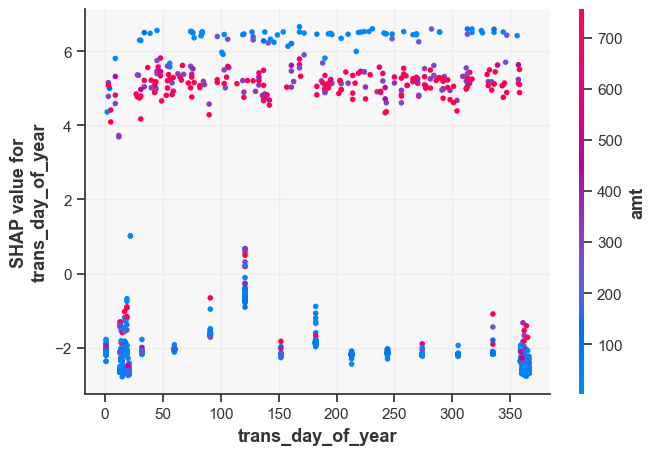

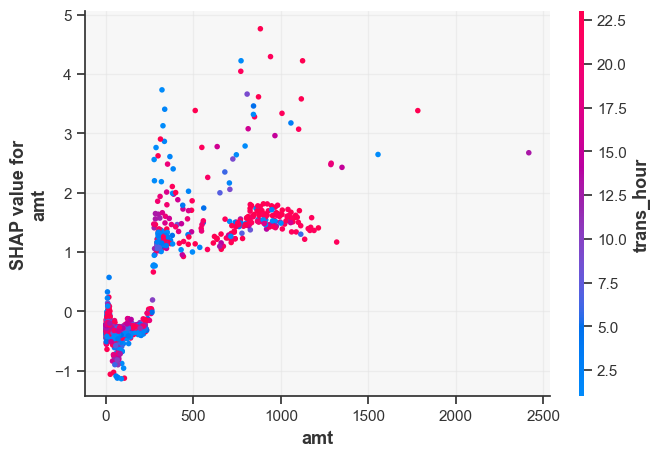

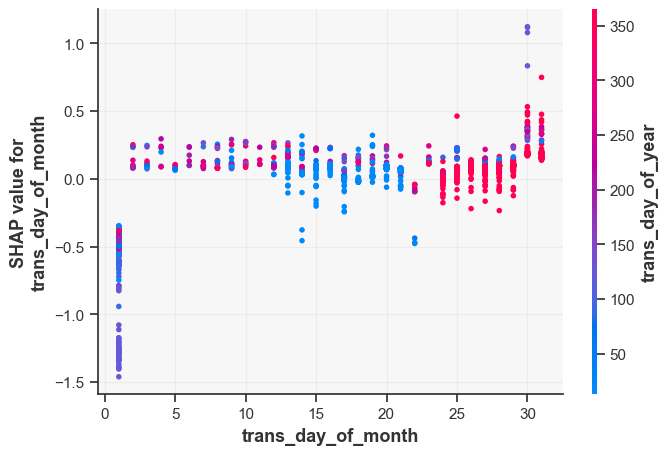

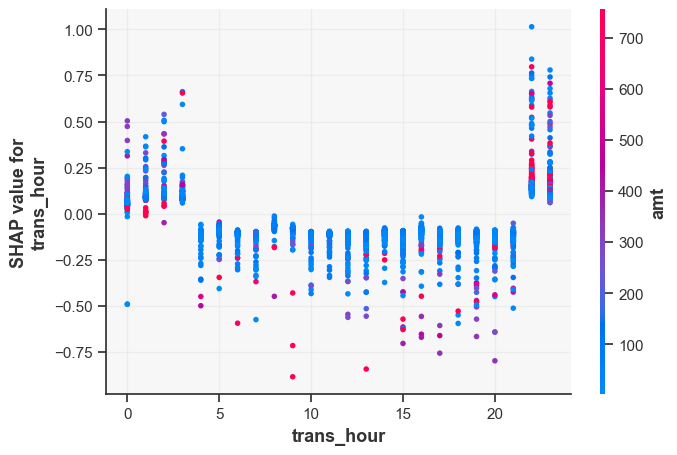

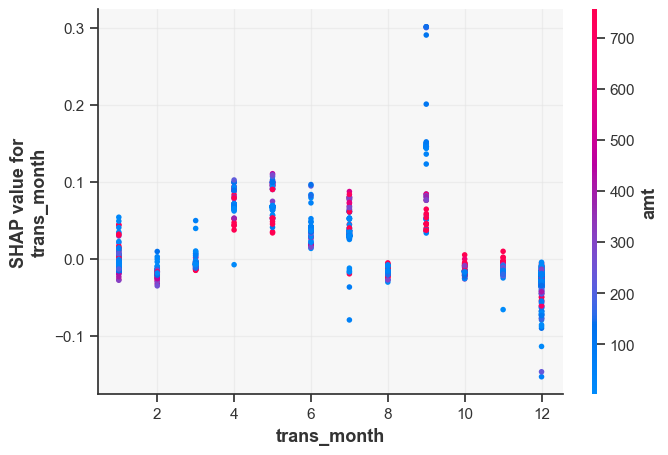

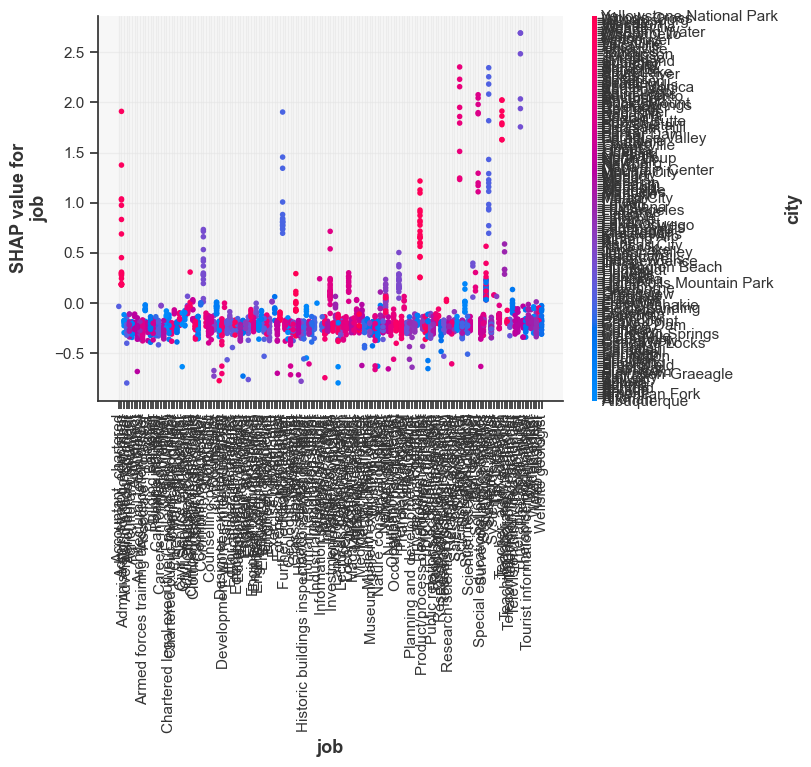

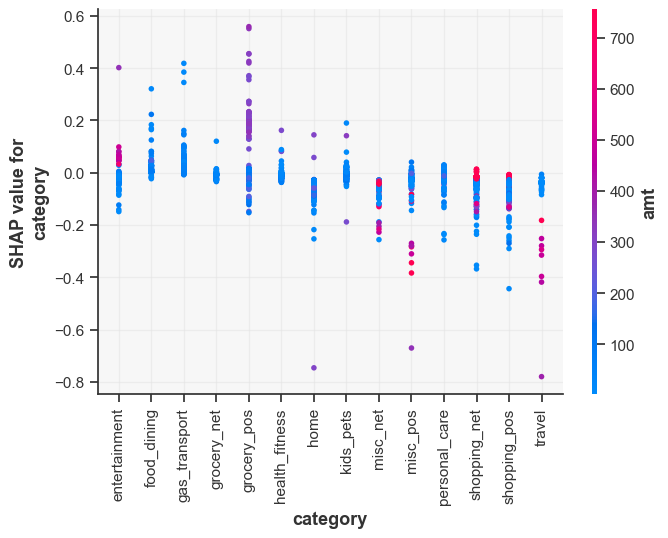

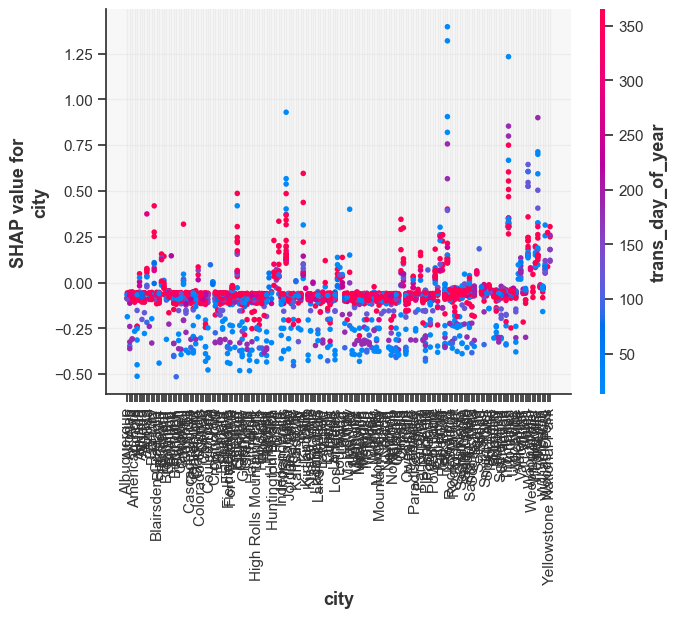

In [ ]:
# Membuat objek TreeExplainer berdasarkan model XGBoost yang telah dilatih (bst)
explainer = shap.TreeExplainer(bst)

# Menghitung nilai SHAP pada data uji (test_DM) untuk menganalisis kontribusi setiap fitur terhadap prediksi
shap_values = explainer(test_DM)

# Untuk setiap fitur yang dipilih, buat plot ketergantungan SHAP untuk melihat hubungan antara nilai fitur dan nilai SHAP
for feature in X_test[selected_feature].columns:
    shap.dependence_plot(feature, shap_values.values, X_test[selected_feature], show=False)
    plt.show()


### Kesimpulan tentang Model Klasifikasi untuk Deteksi Penipuan Kartu Kredit

Dalam rangka membantu pekerja *frontline* dalam menilai penipuan kartu kredit, saya telah merancang model klasifikasi yang bertujuan untuk membedakan transaksi yang tergolong penipuan dan yang bukan penipuan. Model ini dirancang berdasarkan beberapa variabel kunci dan menggunakan metode klasifikasi yang andal. Berikut adalah poin-poin penting dari hasil analisis dan pengembangan model ini dalam menjawab pertanyaan terkait.

#### 1. Variabel dan Metode Klasifikasi yang Digunakan
Pada model ini, digunakan 8 variabel dengan nilai SHAP value tertinggi dari keseluruhan variabel hasil fitur engineering. Variabel-variabel ini dipilih karena kontribusinya yang signifikan dalam mempengaruhi prediksi dan terdiri dari:
- **trans_day_of_year**: Hari dalam tahun transaksi.
- **amt**: Jumlah uang dalam transaksi.
- **trans_day_of_month**: Hari dalam bulan transaksi.
- **trans_hour**: Jam dalam hari transaksi.
- **trans_month**: Bulan transaksi.
- **job**: Pekerjaan pelanggan.
- **category**: Kategori merchant.
- **city**: Kota pelanggan.

Metode klasifikasi yang digunakan adalah *XGBoost*, yang dikenal memiliki performa tinggi dalam masalah klasifikasi terutama pada data yang tidak seimbang. Model ini dilatih dengan membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian terstratifikasi variabel y, memastikan kemampuan generalisasi pada data baru.

#### 2. Evaluasi Kinerja Model Klasifikasi
Kinerja model dievaluasi menggunakan **confusion matrix** dan **classification report** untuk memberikan gambaran lengkap mengenai hasil prediksi:

##### Confusion Matrix:
\[
\begin{bmatrix}
2519 & 2 \\
9 & 347 \\
\end{bmatrix}
\]

- **True Negatives (TN)**: 2519 transaksi yang benar-benar bukan penipuan berhasil diklasifikasikan sebagai bukan penipuan.
- **False Positives (FP)**: 2 transaksi yang sebenarnya bukan penipuan diklasifikasikan sebagai penipuan.
- **False Negatives (FN)**: 9 transaksi yang sebenarnya adalah penipuan diklasifikasikan sebagai bukan penipuan.
- **True Positives (TP)**: 347 transaksi yang benar-benar penipuan berhasil diklasifikasikan sebagai penipuan.

##### Classification Report:
|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| **Class 0** (Bukan Penipuan) | 1.00      | 1.00   | 1.00     | 2521    |
| **Class 1** (Penipuan)       | 0.99      | 0.97   | 0.98     | 356     |
| **Accuracy**                 | -         | -      | 1.00     | 2877    |
| **Macro Average**            | 1.00      | 0.99   | 0.99     | 2877    |
| **Weighted Average**         | 1.00      | 1.00   | 1.00     | 2877    |

Dari hasil classification report:
- **Precision** untuk kelas penipuan (0.99) menunjukkan bahwa model jarang salah dalam mendeteksi transaksi yang benar-benar penipuan.
- **Recall** untuk kelas penipuan (0.97) mengindikasikan bahwa model berhasil mendeteksi sebagian besar kasus penipuan, meskipun ada beberapa kasus yang terlewat.
- **F1-Score** mendekati nilai sempurna untuk kedua kelas, menunjukkan keseimbangan yang baik antara precision dan recall.
- **Accuracy** keseluruhan mendekati 1.00, menunjukkan kinerja model yang sangat baik.

#### 3. Aplikasi Model untuk Pekerja Frontline
Model klasifikasi ini dapat diterapkan untuk membantu pekerja *frontline* dalam membuat keputusan yang lebih cepat dan akurat. Dengan adanya prediksi dari model ini, pekerja dapat:
- Menandai transaksi yang berisiko tinggi untuk diperiksa lebih lanjut.
- Mengurangi waktu analisis manual, karena model dapat mengelompokkan transaksi yang aman dan yang mencurigakan.

Model ini direncanakan untuk di-*deploy* di web, memungkinkan pekerja *frontline* untuk mengakses prediksi secara mudah dan real-time. Dengan implementasi berbasis web, pekerja dapat memeriksa prediksi model kapan pun diperlukan tanpa harus mengakses sistem yang kompleks, sehingga mendukung kemudahan penggunaan dan efisiensi waktu.

Secara keseluruhan, model ini dapat menjadi alat bantu yang sangat bermanfaat bagi pekerja *frontline* untuk melakukan penilaian penipuan dengan lebih terukur, konsisten, dan berdasarkan data, sehingga pengambilan keputusan dapat dilakukan dengan lebih baik dan cepat.

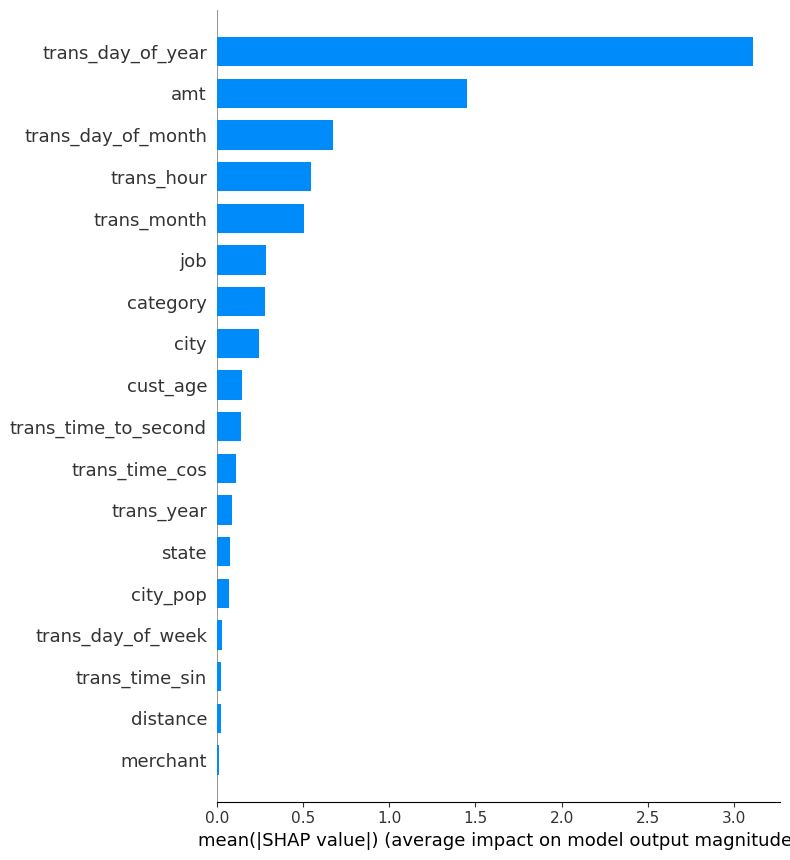

In [ ]:
# Membuat plot summary berupa bar plot untuk menunjukkan rata-rata pentingnya fitur dalam model
shap.summary_plot(shap_values, X_test, plot_type='bar')